In [143]:
import os
import subprocess
# os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

# VDX_dir = '/home/alexi/Documents/ValDX'

VDX_dir = "/home/alexi/Documents/ValDX/"

import sys
sys.path.append(VDX_dir)

from ValDX.VDX_dataclasses import merge_AnalysisData_classes

In [144]:
def transform_naming(df):
    """
    Transform complex naming patterns in DataFrame to standardized ensemble categories.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing 'name' column with patterns like
                      'HOIP_10Start_RW_bench_R3_k_sequence'
    
    Returns:
    pd.DataFrame: DataFrame with transformed naming columns
    """
    df = df.copy()
    
    # Extract method and fit from name
    df["protein"] = df["name"].apply(lambda x: x.split("_")[0])
    df["method"] = df["name"].apply(lambda x: x.split("_")[2])

    df["fit"] = df["name"].apply(lambda x: x.split("_")[3])
    

    # Initialize ensemble based on the core system type from name
    def determine_ensemble(name):
        parts = name.split("_")
        
        # Check for start conditions
        if "10Start" in name:
            return "10Start"
        if "1Start" in name:
            return "1Start"
            
        # Check for shaw_400
        if "shaw_400" in name:
            return "Shaw_400"
            
        # Check for TFES
        if "TFES" in name:
            return "TFES"
            
        # Check for clean/dirty
        if "clean" in name:
            return "af_clean"
        if "dirty" in name:
            return "af_dirty"
            
        # Default to method if no special case
        return parts[2]
    
    df["ensemble"] = df["name"].apply(determine_ensemble)
    
    df["split_type"] = df ["name"].apply(lambda x: x.split("_")[-3])
    df["replicate"] = df["calc_name"].apply(lambda x: x.split("_")[-1])  

    df["analysis"] = df["name"].apply(lambda x: x.split("_")[3])

    return df

In [145]:
results_dir ="/home/alexi/Documents/interpretable-hdxer/data/fig2.5/Benchmark_Ensembles_TFES"

results_dir = '/home/alexi/Documents/ValDX/results/Benchmark_Ensembles/'

# results_dir = "/home/alexi/Documents/ValDX/results/Find-Clusters2"
csvs = glob.glob(results_dir + '/**/*.csv', recursive=True)

# only include csvs that include HOIP

csvs = [csv for csv in csvs if 'HOIP' in csv]

print(len(csvs))


32


In [146]:
pkls = glob.glob(results_dir + '/**/*.pkl', recursive=True)


pkls = [pkl for pkl in pkls if 'HOIP' in pkl]

print(len(pkls))

print(len(pkls))

from ValDX.VDX_dataclasses import merge_AnalysisData_classes

import pickle

# load all the pkls
pkl_list = []
for pkl in pkls:
    with open(pkl, 'rb') as f:
        pkl_list.append(pickle.load(f))


# merge all the pkls
pkl_list = merge_AnalysisData_classes(pkl_list)



32
32
Merging AnalysisData classes
['train_dfs', 'val_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'HDX_data', 'weights', 'features', 'BV_constants', 'LogPfs', 'analysis_df']


In [147]:
def extract_protein_name(pkl_list:dict, protein_names: list):
    """
    Extracts the protein name from the name in the dictionary of pandas dataframes
    """

    for key, df in pkl_list.items():
        # iterate through the rows
        for i, row in df.iterrows():
            # print(row["name"])
            # iterate through the protein names
            for protein_name in protein_names:
                # check if the protein name is in the row name
                if protein_name in row["name"]:
                    print(i, protein_name)
                    # if it is, set the protein name to the protein name
                    row["protein"] = protein_name
            df.loc[i] = row
        
        pkl_list[key] = df

                    
    return pkl_list

protein_names = ["HOIP", "HOIP", "BRD4", "LXRa", "MBP"]

pkl_list = extract_protein_name(pkl_list, protein_names)
        
pkl_list["analysis_df"]



0 HOIP
0 HOIP
1 HOIP
1 HOIP
2 HOIP
2 HOIP
3 HOIP
3 HOIP
4 HOIP
4 HOIP
5 HOIP
5 HOIP
6 HOIP
6 HOIP
7 HOIP
7 HOIP
8 HOIP
8 HOIP
9 HOIP
9 HOIP
10 HOIP
10 HOIP
11 HOIP
11 HOIP
12 HOIP
12 HOIP
13 HOIP
13 HOIP
14 HOIP
14 HOIP
15 HOIP
15 HOIP
16 HOIP
16 HOIP
17 HOIP
17 HOIP
18 HOIP
18 HOIP
19 HOIP
19 HOIP
20 HOIP
20 HOIP
21 HOIP
21 HOIP
22 HOIP
22 HOIP
23 HOIP
23 HOIP
24 HOIP
24 HOIP
25 HOIP
25 HOIP
26 HOIP
26 HOIP
27 HOIP
27 HOIP
28 HOIP
28 HOIP
29 HOIP
29 HOIP
30 HOIP
30 HOIP
31 HOIP
31 HOIP
32 HOIP
32 HOIP
33 HOIP
33 HOIP
34 HOIP
34 HOIP
35 HOIP
35 HOIP
36 HOIP
36 HOIP
37 HOIP
37 HOIP
38 HOIP
38 HOIP
39 HOIP
39 HOIP
40 HOIP
40 HOIP
41 HOIP
41 HOIP
42 HOIP
42 HOIP
43 HOIP
43 HOIP
44 HOIP
44 HOIP
45 HOIP
45 HOIP
46 HOIP
46 HOIP
47 HOIP
47 HOIP
48 HOIP
48 HOIP
49 HOIP
49 HOIP
50 HOIP
50 HOIP
51 HOIP
51 HOIP
52 HOIP
52 HOIP
53 HOIP
53 HOIP
54 HOIP
54 HOIP
55 HOIP
55 HOIP
56 HOIP
56 HOIP
57 HOIP
57 HOIP
58 HOIP
58 HOIP
59 HOIP
59 HOIP
60 HOIP
60 HOIP
61 HOIP
61 HOIP
62 HOIP
62 HOIP
63 HOIP
63 H

117 HOIP
117 HOIP
118 HOIP
118 HOIP
119 HOIP
119 HOIP
120 HOIP
120 HOIP
121 HOIP
121 HOIP
122 HOIP
122 HOIP
123 HOIP
123 HOIP
124 HOIP
124 HOIP
125 HOIP
125 HOIP
126 HOIP
126 HOIP
127 HOIP
127 HOIP
128 HOIP
128 HOIP
129 HOIP
129 HOIP
130 HOIP
130 HOIP
131 HOIP
131 HOIP
132 HOIP
132 HOIP
133 HOIP
133 HOIP
134 HOIP
134 HOIP
135 HOIP
135 HOIP
136 HOIP
136 HOIP
137 HOIP
137 HOIP
138 HOIP
138 HOIP
139 HOIP
139 HOIP
140 HOIP
140 HOIP
141 HOIP
141 HOIP
142 HOIP
142 HOIP
143 HOIP
143 HOIP
144 HOIP
144 HOIP
145 HOIP
145 HOIP
146 HOIP
146 HOIP
147 HOIP
147 HOIP
148 HOIP
148 HOIP
149 HOIP
149 HOIP
150 HOIP
150 HOIP
151 HOIP
151 HOIP
152 HOIP
152 HOIP
153 HOIP
153 HOIP
154 HOIP
154 HOIP
155 HOIP
155 HOIP
156 HOIP
156 HOIP
157 HOIP
157 HOIP
158 HOIP
158 HOIP
159 HOIP
159 HOIP
160 HOIP
160 HOIP
161 HOIP
161 HOIP
162 HOIP
162 HOIP
163 HOIP
163 HOIP
164 HOIP
164 HOIP
165 HOIP
165 HOIP
166 HOIP
166 HOIP
167 HOIP
167 HOIP
168 HOIP
168 HOIP
169 HOIP
169 HOIP
170 HOIP
170 HOIP
171 HOIP
171 HOIP
172 HOIP
1

time   Type         R             calc_name       mse  \
0     0.5  Train  0.012767  train_HOIP_MD_TFES_1       NaN   
1     0.5    Val  0.405164    val_HOIP_MD_TFES_1       NaN   
2     0.5  Train  0.229037  train_HOIP_MD_TFES_2       NaN   
3     0.5    Val  0.064638    val_HOIP_MD_TFES_2       NaN   
4     0.5  Train -0.124229  train_HOIP_MD_TFES_3       NaN   
..    ...    ...       ...                   ...       ...   
827   5.0  Train       NaN   train_HOIP_1Start_2  0.089496   
828   5.0  Train       NaN   train_HOIP_1Start_3  0.079634   
829   5.0    Val       NaN     val_HOIP_1Start_1  0.198007   
830   5.0    Val       NaN     val_HOIP_1Start_2  0.198332   
831   5.0    Val       NaN     val_HOIP_1Start_3  0.186647   

                                        name  \
0        HOIP_MD_TFES_RW_bench_R3_k_sequence   
1        HOIP_MD_TFES_RW_bench_R3_k_sequence   
2        HOIP_MD_TFES_RW_bench_R3_k_sequence   
3        HOIP_MD_TFES_RW_bench_R3_k_sequence   
4        HOIP_MD_TFES_RW_bench_R3_k_sequence   
..                                       ...   
827  HOIP_1Start_RW_bench_s_naive_sequential   
828  HOIP_1Start_RW_bench_s_naive_sequential   
829  HOIP_1Start_RW_bench_s_naive_sequential   
830  HOIP_1Start_RW_bench_s_naive_sequential   
831  HOIP_1Start_RW_bench_s_naive_sequential   

                                      system  analysis split_type protein  \
0        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
1        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
2        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
3        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
4        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
..                                       ...       ...        ...     ...   
827  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
828  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
829  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
830  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
831  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   

                                             name_name dataset     class  
0    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3  
1    HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val    val_R3  
2    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3  
3    HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val    val_R3  
4    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3  
..                                                 ...     ...       ...  
827  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s  
828  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s  
829  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val     val_s  
830  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val     val_s  
831  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val     val_s  

[832 rows x 13 columns]

In [148]:
print(pkl_list.keys())

dict_keys(['train_dfs', 'val_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'HDX_data', 'weights', 'features', 'BV_constants', 'LogPfs', 'analysis_df'])


In [149]:
features = pkl_list["features"]

In [150]:
merge_df = pkl_list["merge_df"]


In [151]:
merge_df["replicate"] = merge_df["calc_name"].apply(lambda x: x.split("_")[-1])

merge_df.columns



Index([         0.5,          5.0,    'peptide',  'calc_name',     'ResStr',
           'ResEnd',       'path',       'name',     'system',   'analysis',
       'split_type',    'protein',  'name_name',    'dataset',      'class',
        'replicate'],
      dtype='object')

In [152]:

def calc_MSE_difference(merge_df:pd.DataFrame, key='mse', prior_dataset='prior', val_dataset='val', exp_dataset="Experimental"):

    # extract only the values that contain the prior dataset
    prior_df = merge_df[merge_df["dataset"]==prior_dataset]

    val_df = merge_df[merge_df["dataset"]==val_dataset]

    exp_df = merge_df[merge_df["dataset"]==exp_dataset]

    systems = prior_df["system"].unique()

    print(len(systems))
    # iterate through the systems

    # create a new dataframe to store the differences
    dMSE_df = pd.DataFrame()

    mean_dMSE_df = pd.DataFrame()

    columns = val_df.columns.tolist()
    print(columns)
    # find all columns that are numbers
    times = [col for col in columns if col != str(col)]

    string_columns = [col for col in columns if col not in times]

    columns_to_remove = ["peptide"]

    final_string_columns = [col for col in string_columns if col not in columns_to_remove]

    # print(times)
    # break


    for system in systems:


        system_prior_df = prior_df[prior_df["system"]==system]
        system_df = val_df[val_df["system"]==system]
        system_exp_df = exp_df[exp_df["system"]==system]
        # print(system_exp_df)

        # break
    # break
        # for each system remove the times that are NaN values to find the valid times for the system
        system_times = [time for time in times if not np.isnan(system_df[time].values).all()]
        print(system_times)

        system_replicates = system_df["replicate"].unique()
        print(system_replicates)
        # break

        for rep in system_replicates:

            system_calc_df = system_df[system_df["replicate"]==rep]
            system_prior_calc_df = system_prior_df[system_prior_df["replicate"]==rep]

            val_peptides = system_calc_df["peptide"].unique()

            system_prior_calc_df = system_prior_calc_df[system_prior_calc_df["peptide"].isin(val_peptides)]

            # system_exp_calc_df = system_exp_df[system_exp_df["replicate"]==rep]

            system_exp_calc_df = system_exp_df[system_exp_df["peptide"].isin(val_peptides)]

            # print(system_exp_calc_df)




            print("system_prior_calc_df")
            print(system_prior_calc_df.peptide.value_counts())
            print("system_calc_df")
            print(system_calc_df.peptide.value_counts())


            df_to_add = system_calc_df.copy()

            for time in system_times:
                print(time)
                print(system_calc_df[time].values)
                print(system_prior_calc_df[time].values)
                # break
                experimental_values = system_exp_calc_df[time].values
                df_to_add[time] = np.abs(system_calc_df[time].values-experimental_values)**2 - np.abs(system_prior_calc_df[time].values-experimental_values)**2

                print(df_to_add[time].values)
                # break


            dMSE_df = pd.concat([dMSE_df, df_to_add])


            # average the dMSE values for each peptide from df_to_add for each system_time
            mean_dMSE = df_to_add.groupby("calc_name")[system_times].mean().values

            mean_dMSE = pd.DataFrame(mean_dMSE, columns=system_times)

            # add the string columns to the mean_dMSE
            for col in string_columns:
                mean_dMSE[col] = df_to_add[col].values[0]

            print(mean_dMSE)

            # pivot mean_dMSE so that the system_time columns are under Time and the value is the dMSE
            mean_dMSE = pd.melt(mean_dMSE, id_vars=final_string_columns, value_vars=system_times, var_name="time", value_name="dMSE")

            print(mean_dMSE)


            mean_dMSE_df = pd.concat([mean_dMSE_df, mean_dMSE])



        #     break
        # break

    column_order = times + string_columns
    # dMSE_df = dMSE_df[column_order]
    # mean_dMSE_df = mean_dMSE_df[column_order]


    return dMSE_df, mean_dMSE_df

dMSE_df, mean_dMSE_df = calc_MSE_difference(merge_df, key='mse', prior_dataset='prior')

32
[0.5, 5.0, 'peptide', 'calc_name', 'ResStr', 'ResEnd', 'path', 'name', 'system', 'analysis', 'split_type', 'protein', 'name_name', 'dataset', 'class', 'replicate']
[0.5, 5.0]
['1' '2' '3']
system_prior_calc_df
peptide
0     1
45    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
91    1
92    1
93    1
94    1
46    1
44    1
2     1
43    1
4     1
5     1
6     1
7     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
95    1
Name: count, dtype: int64
system_calc_df
peptide
0     1
45    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
91    1
92    1
93    1
94    1
46    1
44    1
2     1
43    1
4     1
5     1
6     1
7 

        0.5       5.0  peptide          calc_name  ResStr  ResEnd  \
0  0.002874 -0.005659       61  val_HOIP_MD_Bad_2   154.0   169.0   

                                                path  \
0  /home/alexi/Documents/ValDX/data/Benchmark_Ens...   

                                     name  \
0  HOIP_MD_Bad_RW_bench_Sp_res_neighbours   

                                   system  analysis split_type protein  \
0  HOIP_MD_Bad_RW_bench_Sp_res_neighbours  RW_bench         Sp    HOIP   

                                           name_name dataset   class replicate  
0  HOIP_MD_Bad_RW_bench_Sp_res_neighbours_val_HOI...     val  val_Sp         2  
           calc_name  ResStr  ResEnd  \
0  val_HOIP_MD_Bad_2   154.0   169.0   
1  val_HOIP_MD_Bad_2   154.0   169.0   

                                                path  \
0  /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
1  /home/alexi/Documents/ValDX/data/Benchmark_Ens...   

                                     name  \
0  HOIP_MD_

In [153]:
mean_dMSE_df

calc_name  ResStr  ResEnd  \
0   val_HOIP_MD_TFES_1     1.0     7.0   
1   val_HOIP_MD_TFES_1     1.0     7.0   
0   val_HOIP_MD_TFES_2    33.0    40.0   
1   val_HOIP_MD_TFES_2    33.0    40.0   
0   val_HOIP_MD_TFES_3     1.0     7.0   
..                 ...     ...     ...   
1    val_HOIP_1Start_1   121.0   131.0   
0    val_HOIP_1Start_2   132.0   149.0   
1    val_HOIP_1Start_2   132.0   149.0   
0    val_HOIP_1Start_3   121.0   132.0   
1    val_HOIP_1Start_3   121.0   132.0   

                                                 path  \
0   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
1   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
0   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
1   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
0   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
..                                                ...   
1   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
0   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
1   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
0   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
1   /home/alexi/Documents/ValDX/data/Benchmark_Ens...   

                                       name  \
0       HOIP_MD_TFES_RW_bench_R3_k_sequence   
1       HOIP_MD_TFES_RW_bench_R3_k_sequence   
0       HOIP_MD_TFES_RW_bench_R3_k_sequence   
1       HOIP_MD_TFES_RW_bench_R3_k_sequence   
0       HOIP_MD_TFES_RW_bench_R3_k_sequence   
..                                      ...   
1   HOIP_1Start_RW_bench_s_naive_sequential   
0   HOIP_1Start_RW_bench_s_naive_sequential   
1   HOIP_1Start_RW_bench_s_naive_sequential   
0   HOIP_1Start_RW_bench_s_naive_sequential   
1   HOIP_1Start_RW_bench_s_naive_sequential   

                                     system  analysis split_type protein  \
0       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
1       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
0       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
1       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
0       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
..                                      ...       ...        ...     ...   
1   HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
0   HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
1   HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
0   HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
1   HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   

                                            name_name dataset   class  \
0   HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
1   HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
0   HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
1   HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
0   HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
..                                                ...     ...     ...   
1   HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s   
0   HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s   
1   HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s   
0   HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s   
1   HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s   

   replicate time      dMSE  
0          1  0.5 -0.000450  
1          1  5.0  0.000032  
0          2  0.5 -0.001328  
1          2  5.0 -0.002473  
0          3  0.5 -0.002200  
..       ...  ...       ...  
1          1  5.0 -0.000602  
0          2  0.5  0.000474  
1          2  5.0  0.000929  
0          3  0.5 -0.000099  
1          3  5.0 -0.000564  

[192 rows x 15 columns]

In [154]:
weights = pkl_list["weights"]
weights = transform_naming(weights)

In [155]:
# mean_fit_mean_dMSE_df

In [156]:
dMSE_df

# for each time point calculate the mean of the dMSE across all the peptides at each calc_name




0.5       5.0  peptide           calc_name  ResStr  ResEnd  \
217   -0.011027  0.001605        0  val_HOIP_MD_TFES_1     1.0     7.0   
218    0.000930  0.004281        2  val_HOIP_MD_TFES_1     6.0    21.0   
219    0.001308  0.004740        4  val_HOIP_MD_TFES_1     7.0    18.0   
220    0.001318  0.004139        5  val_HOIP_MD_TFES_1     7.0    21.0   
221   -0.000063  0.002672        6  val_HOIP_MD_TFES_1     7.0    25.0   
...         ...       ...      ...                 ...     ...     ...   
22078 -0.001133 -0.004095       99   val_HOIP_1Start_3   336.0   356.0   
22079 -0.000970 -0.003763      100   val_HOIP_1Start_3   336.0   357.0   
22080 -0.000570 -0.002524      101   val_HOIP_1Start_3   336.0   360.0   
22081  0.000152 -0.000456      103   val_HOIP_1Start_3   338.0   360.0   
22082  0.000450  0.000375      104   val_HOIP_1Start_3   339.0   360.0   

                                                    path  \
217    /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
218    /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
219    /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
220    /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
221    /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
...                                                  ...   
22078  /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
22079  /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
22080  /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
22081  /home/alexi/Documents/ValDX/data/Benchmark_Ens...   
22082  /home/alexi/Documents/ValDX/data/Benchmark_Ens...   

                                          name  \
217        HOIP_MD_TFES_RW_bench_R3_k_sequence   
218        HOIP_MD_TFES_RW_bench_R3_k_sequence   
219        HOIP_MD_TFES_RW_bench_R3_k_sequence   
220        HOIP_MD_TFES_RW_bench_R3_k_sequence   
221        HOIP_MD_TFES_RW_bench_R3_k_sequence   
...                                        ...   
22078  HOIP_1Start_RW_bench_s_naive_sequential   
22079  HOIP_1Start_RW_bench_s_naive_sequential   
22080  HOIP_1Start_RW_bench_s_naive_sequential   
22081  HOIP_1Start_RW_bench_s_naive_sequential   
22082  HOIP_1Start_RW_bench_s_naive_sequential   

                                        system  analysis split_type protein  \
217        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
218        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
219        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
220        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
221        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
...                                        ...       ...        ...     ...   
22078  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
22079  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
22080  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
22081  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
22082  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   

                                               name_name dataset   class  \
217    HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
218    HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
219    HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
220    HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
221    HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   
...                                                  ...     ...     ...   
22078  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s   
22079  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s   
22080  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s   
22081  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s   
22082  HOIP_1Sta

In [157]:

mean_dMSE_df = transform_naming(mean_dMSE_df)


fit_mean_dMSE_df = mean_dMSE_df

mean_fit_mean_dMSE_df = fit_mean_dMSE_df.groupby(["name", "replicate", "protein", "split_type"])["dMSE"].mean().reset_index()

In [158]:
dMSE_df = transform_naming(dMSE_df)



dMSE_df["ensemble"].unique()

array(['TFES', 'Good', 'af_dirty', 'Bad', 'Good+Bad', 'af_clean',
       '10Start', '1Start'], dtype=object)

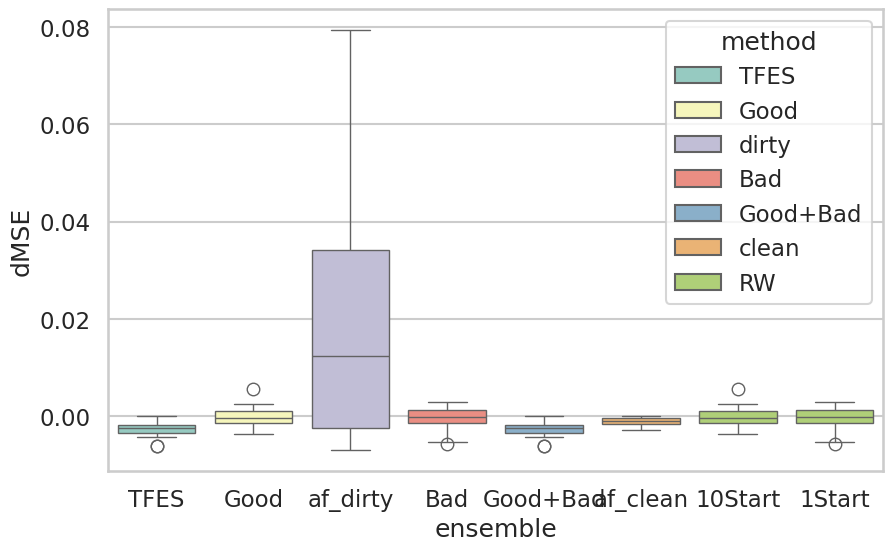

In [159]:
methord_order = ["RW"]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

fit_val_df = mean_dMSE_df[mean_dMSE_df["fit"] == "bench"]


sns.boxplot(data=mean_dMSE_df, x="ensemble", y="dMSE", hue="method", ax=ax, palette="Set3")#,order=method_order)
 
# ax.set_yscale("log")

plt.show()


In [160]:

data_frames = []

for csv in csvs:
    data_frames.append(pd.read_csv(csv))

df = pd.concat(data_frames)
df.head()



time   Type         R             calc_name  mse  \
0   0.5  Train  0.012767  train_HOIP_MD_TFES_1  NaN   
1   0.5    Val  0.405164    val_HOIP_MD_TFES_1  NaN   
2   0.5  Train  0.229037  train_HOIP_MD_TFES_2  NaN   
3   0.5    Val  0.064638    val_HOIP_MD_TFES_2  NaN   
4   0.5  Train -0.124229  train_HOIP_MD_TFES_3  NaN   

                                  name                               system  \
0  HOIP_MD_TFES_RW_bench_R3_k_sequence  HOIP_MD_TFES_RW_bench_R3_k_sequence   
1  HOIP_MD_TFES_RW_bench_R3_k_sequence  HOIP_MD_TFES_RW_bench_R3_k_sequence   
2  HOIP_MD_TFES_RW_bench_R3_k_sequence  HOIP_MD_TFES_RW_bench_R3_k_sequence   
3  HOIP_MD_TFES_RW_bench_R3_k_sequence  HOIP_MD_TFES_RW_bench_R3_k_sequence   
4  HOIP_MD_TFES_RW_bench_R3_k_sequence  HOIP_MD_TFES_RW_bench_R3_k_sequence   

   analysis split_type protein  \
0  RW_bench         R3      RW   
1  RW_bench         R3      RW   
2  RW_bench         R3      RW   
3  RW_bench         R3      RW   
4  RW_bench         R3      RW   

                                           name_name dataset     class  
0  HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3  
1  HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val    val_R3  
2  HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3  
3  HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val    val_R3  
4  HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3

In [161]:
#
df["method"] = df["name"].apply(lambda x: x.split("_")[2])

In [162]:
df["fit"] = df["name"].apply(lambda x: x.split("_")[4])

In [163]:
print(df["fit"].unique())    

['bench' 'Sp' 'r' 's' 'R3']


In [164]:
protein_names = ["HOIP", "HOIP", "BRD4", "LXRa", "MBP"]

df['protein'] = df['name'].apply(lambda x: x.split('_')[0])
df

time   Type         R             calc_name       mse  \
0    0.5  Train  0.012767  train_HOIP_MD_TFES_1       NaN   
1    0.5    Val  0.405164    val_HOIP_MD_TFES_1       NaN   
2    0.5  Train  0.229037  train_HOIP_MD_TFES_2       NaN   
3    0.5    Val  0.064638    val_HOIP_MD_TFES_2       NaN   
4    0.5  Train -0.124229  train_HOIP_MD_TFES_3       NaN   
..   ...    ...       ...                   ...       ...   
21   5.0  Train       NaN   train_HOIP_1Start_2  0.089496   
22   5.0  Train       NaN   train_HOIP_1Start_3  0.079634   
23   5.0    Val       NaN     val_HOIP_1Start_1  0.198007   
24   5.0    Val       NaN     val_HOIP_1Start_2  0.198332   
25   5.0    Val       NaN     val_HOIP_1Start_3  0.186647   

                                       name  \
0       HOIP_MD_TFES_RW_bench_R3_k_sequence   
1       HOIP_MD_TFES_RW_bench_R3_k_sequence   
2       HOIP_MD_TFES_RW_bench_R3_k_sequence   
3       HOIP_MD_TFES_RW_bench_R3_k_sequence   
4       HOIP_MD_TFES_RW_bench_R3_k_sequence   
..                                      ...   
21  HOIP_1Start_RW_bench_s_naive_sequential   
22  HOIP_1Start_RW_bench_s_naive_sequential   
23  HOIP_1Start_RW_bench_s_naive_sequential   
24  HOIP_1Start_RW_bench_s_naive_sequential   
25  HOIP_1Start_RW_bench_s_naive_sequential   

                                     system  analysis split_type protein  \
0       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
1       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
2       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
3       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
4       HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
..                                      ...       ...        ...     ...   
21  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
22  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
23  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
24  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
25  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   

                                            name_name dataset     class  \
0   HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
1   HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val    val_R3   
2   HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
3   HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val    val_R3   
4   HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
..                                                ...     ...       ...   
21  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
22  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
23  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val     val_s   
24  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val     val_s   
25  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val     val_s   

   method    fit  
0    TFES  bench  
1    TFES  bench  
2    TFES  bench  
3    TFES  bench  
4    TFES  bench  
..    ...    ...  
21     RW      s  
22     RW      s  
23     RW      s  
24     RW      s  
25     RW      s  

[832 rows x 15 columns]

In [165]:
# only include df that has non nan mse values
mse_df = df.dropna(subset=["mse"])
val_df = mse_df[mse_df["Type"] == "Val"]

# remove val mse = 0
val_df = val_df[val_df["mse"] != 0]


print(val_df.method.value_counts())

method
RW          48
TFES        24
Good        24
dirty       24
Bad         24
Good+Bad    24
clean       24
Name: count, dtype: int64


In [166]:
val_df



time Type   R           calc_name       mse  \
16   0.5  Val NaN  val_HOIP_MD_TFES_1  0.070744   
17   0.5  Val NaN  val_HOIP_MD_TFES_2  0.082704   
18   0.5  Val NaN  val_HOIP_MD_TFES_3  0.049086   
23   5.0  Val NaN  val_HOIP_MD_TFES_1  0.145281   
24   5.0  Val NaN  val_HOIP_MD_TFES_2  0.168288   
..   ...  ...  ..                 ...       ...   
17   0.5  Val NaN   val_HOIP_1Start_2  0.089150   
18   0.5  Val NaN   val_HOIP_1Start_3  0.081705   
23   5.0  Val NaN   val_HOIP_1Start_1  0.198007   
24   5.0  Val NaN   val_HOIP_1Start_2  0.198332   
25   5.0  Val NaN   val_HOIP_1Start_3  0.186647   

                                       name  \
16      HOIP_MD_TFES_RW_bench_R3_k_sequence   
17      HOIP_MD_TFES_RW_bench_R3_k_sequence   
18      HOIP_MD_TFES_RW_bench_R3_k_sequence   
23      HOIP_MD_TFES_RW_bench_R3_k_sequence   
24      HOIP_MD_TFES_RW_bench_R3_k_sequence   
..                                      ...   
17  HOIP_1Start_RW_bench_s_naive_sequential   
18  HOIP_1Start_RW_bench_s_naive_sequential   
23  HOIP_1Start_RW_bench_s_naive_sequential   
24  HOIP_1Start_RW_bench_s_naive_sequential   
25  HOIP_1Start_RW_bench_s_naive_sequential   

                                     system  analysis split_type protein  \
16      HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
17      HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
18      HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
23      HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
24      HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
..                                      ...       ...        ...     ...   
17  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
18  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
23  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
24  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
25  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   

                                            name_name dataset   class method  \
16  HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   TFES   
17  HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   TFES   
18  HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   TFES   
23  HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   TFES   
24  HOIP_MD_TFES_RW_bench_R3_k_sequence_val_HOIP_M...     val  val_R3   TFES   
..                                                ...     ...     ...    ...   
17  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s     RW   
18  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s     RW   
23  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s     RW   
24  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s     RW   
25  HOIP_1Start_RW_bench_s_naive_sequential_val_HO...     val   val_s     RW   

      fit  
16  bench  
17  bench  
18  bench  
23  bench  
24  bench  
..    ...  
17      s  
18      s  
23      s  
24      s  
25      s  

[192 rows x 15 columns]

In [167]:
val_df.columns

Index(['time', 'Type', 'R', 'calc_name', 'mse', 'name', 'system', 'analysis',
       'split_type', 'protein', 'name_name', 'dataset', 'class', 'method',
       'fit'],
      dtype='object')

In [168]:
val_df = transform_naming(val_df)
print(val_df["method"].unique())

['TFES' 'Good' 'dirty' 'Bad' 'Good+Bad' 'clean' 'RW']


In [169]:
split_order = ["r", "s", "R3", "Sp"]


['TFES' 'Good' 'af_dirty' 'Bad' 'Good+Bad' 'af_clean' '10Start' '1Start']


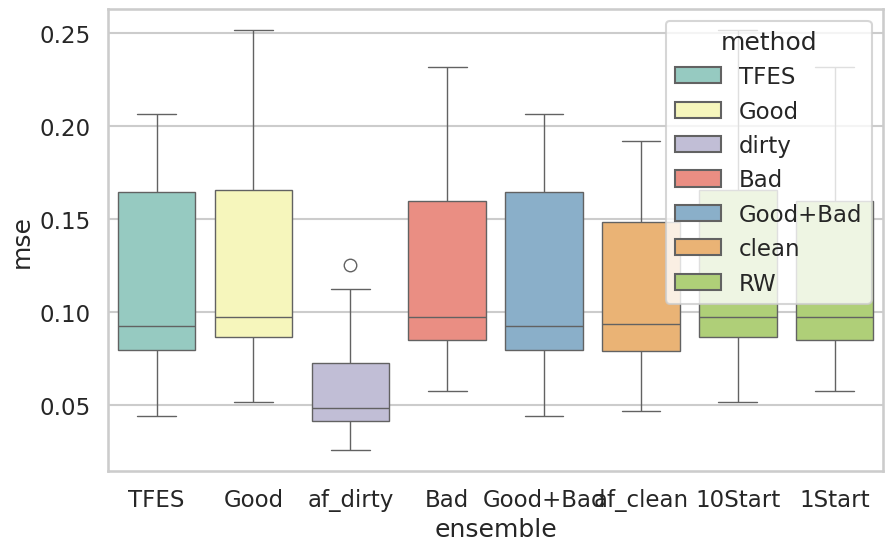

In [170]:
methord_order = ["RW"]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

fit_val_df = val_df[val_df["replicate"] != 0]
print(fit_val_df["ensemble"].unique())

sns.boxplot(data=val_df, x="ensemble", y="mse", hue="method", ax=ax, palette="Set3")#,order=method_order)

# ax.set_yscale("log")

plt.show()


In [171]:
fit_val_df = val_df
fit_val_df["ensemble"].unique()

array(['TFES', 'Good', 'af_dirty', 'Bad', 'Good+Bad', 'af_clean',
       '10Start', '1Start'], dtype=object)

In [172]:

# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # Create a custom palette
# shaw_free_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# shaw_free_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]
# shaw_free_val_df = val_df[val_df["ensemble"].isin(shaw_free_dataset_order)]
# palette = sns.color_palette("Set1", n_colors=len(val_df["replicate"].unique()))
# # Create the FacetGrid
# g = sns.FacetGrid(shaw_free_val_df, row="protein", col="split_type", height=5, aspect=1.5, sharey=False, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="mse", hue="replicate", palette="Set2", order=shaw_free_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Dataset", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.add_legend(title="Replicate", fontsize=12)
# # Show the plot
# plt.show()

In [173]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")

# # protein_names = ["HOIP", "HOIP", "BRD4", "LXRa", "MBP"]
# # method_order = ["NoOpt0", "BV-RW0", "BV-RW1","RW-BV-RW0","RW-BV-RW1","RW-BV-RW2", "RW-SpBV-RW0","RW-SpBV-RW1","RW-SpBV-RW2", "BV+RW0"]
# shaw_free_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# # Create a custom palette
# split_order = ["r", "s", "R3", "Sp"]
# # fit_val_df["method_name"] = fit_val_df["method"].apply(lambda x: x[:-1])
# palette = sns.color_palette("Set1", n_colors=len(val_df["ensemble"].unique()))

# # Create the FacetGrid
# g = sns.FacetGrid(val_df, col="protein", col_wrap=1, height=5, aspect=3, sharey=False, col_order=protein_names)

# # Map the violin plot to the FacetGrid
# g.map_dataframe(sns.violinplot, x="split_type", y="mse", hue="ensemble", palette=palette, hue_order=shaw_free_dataset_order, order=split_order)

# # Customize the plot
# g.set_titles(col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Method", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # g.add_legend(title="Split Type", fontsize=12)

# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# # Adjust subplot spacing
# g.tight_layout()
# g.add_legend(title="ensemble", fontsize=12)

# # Show the plot
# plt.show()

In [174]:
print(val_df.method.value_counts())

method
RW          48
TFES        24
Good        24
dirty       24
Bad         24
Good+Bad    24
clean       24
Name: count, dtype: int64


In [175]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # Create a custom palette
# shaw_free_dataset_order = ["af_dirty", "af_clean", "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean"]# "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# shaw_free_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _free_val_df = val_df[val_df["ensemble"].isin(_dataset_order)]
# palette = sns.color_palette("Set1", n_colors=len(val_df["replicate"].unique()))
# # Create the FacetGrid
# g = sns.FacetGrid(_free_val_df, row="protein", col="split_type", height=5, aspect=1.5, sharey=False, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="mse", hue="replicate", palette="Set2", order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("ensemble", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.add_legend(title="Replicate", fontsize=12)
# # Show the plot
# plt.show()

In [176]:
expt_segs = pkl_list["expt_segs"]
weightslog_PFs = pkl_list["LogPfs"]
print(expt_segs.columns)
# print(log_PFs.columns)

Index(['ResStr', 'ResEnd', 'peptide', 'calc_name', 'Residue', 'name', 'system',
       'analysis', 'split_type', 'protein', 'name_name', 'dataset', 'class'],
      dtype='object')


In [177]:
expt_segs

ResStr  ResEnd  peptide     calc_name  \
0          1       7        0  Experimental   
1          6      18        1  Experimental   
2          6      21        2  Experimental   
3          6      25        3  Experimental   
4          7      18        4  Experimental   
...      ...     ...      ...           ...   
3355     336     357      100  Experimental   
3356     336     360      101  Experimental   
3357     338     357      102  Experimental   
3358     338     360      103  Experimental   
3359     339     360      104  Experimental   

                                                Residue  \
0                                 (1, 2, 3, 4, 5, 6, 7)   
1      (6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18)   
2     (6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...   
3     (6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...   
4         (7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18)   
...                                                 ...   
3355  (336, 337, 338, 339, 340, 341, 342, 343, 344, ...   
3356  (336, 337, 338, 339, 340, 341, 342, 343, 344, ...   
3357  (338, 339, 340, 341, 342, 343, 344, 345, 346, ...   
3358  (338, 339, 340, 341, 342, 343, 344, 345, 346, ...   
3359  (339, 340, 341, 342, 343, 344, 345, 346, 347, ...   

                                         name  \
0         HOIP_MD_TFES_RW_bench_R3_k_sequence   
1         HOIP_MD_TFES_RW_bench_R3_k_sequence   
2         HOIP_MD_TFES_RW_bench_R3_k_sequence   
3         HOIP_MD_TFES_RW_bench_R3_k_sequence   
4         HOIP_MD_TFES_RW_bench_R3_k_sequence   
...                                       ...   
3355  HOIP_1Start_RW_bench_s_naive_sequential   
3356  HOIP_1Start_RW_bench_s_naive_sequential   
3357  HOIP_1Start_RW_bench_s_naive_sequential   
3358  HOIP_1Start_RW_bench_s_naive_sequential   
3359  HOIP_1Start_RW_bench_s_naive_sequential   

                                       system  analysis split_type protein  \
0         HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
1         HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
2         HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
3         HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
4         HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
...                                       ...       ...        ...     ...   
3355  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
3356  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
3357  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
3358  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
3359  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   

                                              name_name       dataset  \
0      HOIP_MD_TFES_RW_bench_R3_k_sequence_Experimental  Experimental   
1      HOIP_MD_TFES_RW_bench_R3_k_sequence_Experimental  Experimental   
2      HOIP_MD_TFES_RW_bench_R3_k_sequence_Experimental  Experimental   
3      HOIP_MD_TFES_RW_bench_R3_k_sequence_Experimental  Experimental   
4      HOIP_MD_TFES_RW_bench_R3_k_sequence_Experimental  Experimental   
...                                                 ...           ...   
3355  HOIP_1Start_RW_bench_s_naive_sequential_Experi...  Experimental   
3356  HOIP_1Start_RW_bench_s_naive_sequential_Experi...  Experimental   
3357  HOIP_1Start_RW_bench_s_naive_sequential_Experi...  Experimental   
3358  HOIP_1Start_RW_bench_s_naive_sequential_Experi...  Experimental   
3359  HOIP_1Start_RW_bench_s_naive_sequential_Experi...  Experimental   

                class  
0     Experimental_R3  
1     Experimental_R3  
2     Experimental_R3  
3     Experimental_R3  
4     Experimental_R3  
...               ...  
3355   Experimental_s  
3356   Experimental_s  
3357   Experimental_s  
3358   Experimental_s  
3359   Experimental_s  

[3360 rows x 13 columns]

In [178]:
log_PFs = pkl_list["LogPfs"]
log_PFs = transform_naming(log_PFs)
print(log_PFs.ensemble.unique())
print(len(log_PFs.ensemble.unique()))
print(log_PFs.ensemble.value_counts())

['TFES' 'Good' 'af_dirty' 'Bad' 'Good+Bad' 'af_clean' '10Start' '1Start']
8
ensemble
af_dirty    8790
af_clean    8790
TFES        8741
Good+Bad    8741
Good        8694
10Start     8694
Bad         8687
1Start      8687
Name: count, dtype: int64


In [179]:
log_PFs

Residues      LogPf             calc_name  \
0             2   6.039500  prior_HOIP_MD_TFES_1   
1             3  11.811000  prior_HOIP_MD_TFES_1   
2             4   6.458000  prior_HOIP_MD_TFES_1   
3             5   3.868500  prior_HOIP_MD_TFES_1   
4             6   4.016000  prior_HOIP_MD_TFES_1   
...         ...        ...                   ...   
69819       356   9.561803    test_HOIP_1Start_3   
69820       357  10.717792    test_HOIP_1Start_3   
69821       358  11.167036    test_HOIP_1Start_3   
69822       359   8.790611    test_HOIP_1Start_3   
69823       360   8.852385    test_HOIP_1Start_3   

                                          name  \
0          HOIP_MD_TFES_RW_bench_R3_k_sequence   
1          HOIP_MD_TFES_RW_bench_R3_k_sequence   
2          HOIP_MD_TFES_RW_bench_R3_k_sequence   
3          HOIP_MD_TFES_RW_bench_R3_k_sequence   
4          HOIP_MD_TFES_RW_bench_R3_k_sequence   
...                                        ...   
69819  HOIP_1Start_RW_bench_s_naive_sequential   
69820  HOIP_1Start_RW_bench_s_naive_sequential   
69821  HOIP_1Start_RW_bench_s_naive_sequential   
69822  HOIP_1Start_RW_bench_s_naive_sequential   
69823  HOIP_1Start_RW_bench_s_naive_sequential   

                                        system analysis split_type protein  \
0          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
1          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
2          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
3          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
4          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
...                                        ...      ...        ...     ...   
69819  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
69820  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
69821  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
69822  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
69823  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   

                                               name_name dataset     class  \
0      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
1      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
2      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
3      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
4      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
...                                                  ...     ...       ...   
69819  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   
69820  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   
69821  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   
69822  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   
69823  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   

      method    fit ensemble replicate  
0       TFES     RW     TFES         1  
1       TFES     RW     TFES         1  
2       TFES     RW     TFES         1  
3       TFES     RW     TFES         1  
4       TFES     RW     TFES         1  
...      ...    ...      ...       ...  
69819     RW  bench   1Start         3  
69820     RW  bench   1Start         3  
69821     RW  bench   1Start         3  
69822     RW  bench   1Start         3  
69823     RW  bench   1Start         3  

[69824 rows x 15 columns]

In [180]:
# # plot LogPf vs Residues, facet by protein and split type
# # plot as a bar plot
# import seaborn as sns
# continue
# sns.set_context("talk")

# _dataset_order = ["af_dirty", "af_clean"]# "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]

# _log_PFs = log_PFs[log_PFs["dataset"]=="val"]

# _log_PFs = log_PFs[log_PFs["ensemble"].isin(_dataset_order)]
# g = sns.FacetGrid(_log_PFs, col="ensemble", row="protein", height=5, aspect=2.5, sharey=True, sharex=False)#, row_order=protein_names, col_order=protein_names)

# g.map_dataframe(sns.barplot, x="Residues", y="LogPf", hue="split_type", palette="Set2")

# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")

# g.set_xlabels("Residue")#, fontsize=14)

# g.set_ylabels("LogPf", fontsize=14)

# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# g.tight_layout()

# g.add_legend(title="Replicate", fontsize=12)

# plt.show()







In [181]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# continue
# sns.set_context("talk")

# dataset_order = ["af_dirty", "af_clean"]
# dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]

# _log_PFs = log_PFs[log_PFs["ensemble"].isin(dataset_order)]
# _log_PFs = log_PFs[log_PFs["dataset"]=="val"]

# # Create a separate figure for each protein
# for protein in _log_PFs["protein"].unique():
#     protein_data = _log_PFs[_log_PFs["protein"] == protein]
    
#     g = sns.FacetGrid(protein_data, col="ensemble", row="split_type", height=5, aspect=4, 
#                       sharey=True, sharex=True, col_order=dataset_order)
    
#     g.map_dataframe(sns.barplot, x="Residues", y="LogPf", hue="replicate", palette="Set2")
    
#     g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
#     g.set_xlabels("Residue")#, fontsize=14)
#     g.set_ylabels("LogPf", fontsize=14)
    

#     g.tight_layout()
#     g.add_legend(title="Replicate", fontsize=12)
    
#     plt.suptitle(f"Protein: {protein}", fontsize=20, y=1.02)
#     plt.show()

In [182]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# continue
# sns.set_context("talk")

# dataset_order = ["af_dirty", "af_clean"]
# dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]

# _log_PFs = log_PFs[log_PFs["ensemble"].isin(dataset_order)]
# _log_PFs = log_PFs[log_PFs["dataset"]=="test"]

# # Create a separate figure for each protein
# for protein in _log_PFs["protein"].unique():
#     protein_data = _log_PFs[_log_PFs["protein"] == protein]
    
#     g = sns.FacetGrid(protein_data, col="ensemble", row="split_type", height=5, aspect=4, 
#                       sharey=True, sharex=True, col_order=dataset_order)
    
#     g.map_dataframe(sns.barplot, x="Residues", y="LogPf", palette="Set2")
    
#     g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
#     g.set_xlabels("Residue")#, fontsize=14)
#     g.set_ylabels("LogPf", fontsize=14)
    

#     g.tight_layout()
#     g.add_legend(title="Replicate", fontsize=12)
    
#     plt.suptitle(f"Protein: {protein}", fontsize=20, y=1.02)
#     plt.show()

In [183]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set_context("talk")

# dataset_order = ["af_dirty", "af_clean", "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]

# _log_PFs = log_PFs[log_PFs["ensemble"].isin(dataset_order)]

# # Create a separate figure for each protein
# for protein in _log_PFs["protein"].unique():
#     protein_data = _log_PFs[_log_PFs["protein"] == protein]
    
#     g = sns.FacetGrid(protein_data, col="ensemble", row="split_type", height=5, aspect=4, 
#                       sharey=False, sharex=False, col_order=dataset_order)
    
#     g.map_dataframe(sns.barplot, x="Residues", y="LogPf", palette="Set2")
    
#     g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
#     g.set_xlabels("Residue")#, fontsize=14)
#     g.set_ylabels("LogPf", fontsize=14)
    

#     g.tight_layout()
#     g.add_legend(title="Replicate", fontsize=12)
    
#     plt.suptitle(f"Protein: {protein}", fontsize=20, y=1.02)
#     plt.show()

In [184]:

weights

weights             calc_name  \
0    [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...    prior_HOIP_MD_TFES   
1    [0.003910919947122198, 0.0027630933278467054, ...  train_HOIP_MD_TFES_1   
2                                                  NaN  train_HOIP_MD_TFES_1   
3    [0.00737011078369786, 0.0071430544652015555, 0...  train_HOIP_MD_TFES_2   
4                                                  NaN  train_HOIP_MD_TFES_2   
..                                                 ...                   ...   
219                                                NaN   train_HOIP_1Start_1   
220  [0.007960261183905408, 0.016355768464938508, 0...   train_HOIP_1Start_2   
221                                                NaN   train_HOIP_1Start_2   
222  [0.009620716770492395, 0.020025843866799675, 0...   train_HOIP_1Start_3   
223                                                NaN   train_HOIP_1Start_3   

     likelihood                                     name  \
0           NaN      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1           NaN      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2      7.575318      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3           NaN      HOIP_MD_TFES_RW_bench_R3_k_sequence   
4      1.064295      HOIP_MD_TFES_RW_bench_R3_k_sequence   
..          ...                                      ...   
219    1.277396  HOIP_1Start_RW_bench_s_naive_sequential   
220         NaN  HOIP_1Start_RW_bench_s_naive_sequential   
221    1.398186  HOIP_1Start_RW_bench_s_naive_sequential   
222         NaN  HOIP_1Start_RW_bench_s_naive_sequential   
223    0.997621  HOIP_1Start_RW_bench_s_naive_sequential   

                                      system analysis split_type protein  \
0        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
1        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
2        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
3        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
4        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
..                                       ...      ...        ...     ...   
219  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
220  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
221  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
222  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
223  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   

                                             name_name dataset     class  \
0    HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
1    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
2    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
3    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
4    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
..                                                 ...     ...       ...   
219  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
220  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
221  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
222  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
223  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   

    method    fit ensemble replicate  
0     TFES     RW     TFES      TFES  
1     TFES     RW     TFES         1  
2     TFES     RW     TFES         1  
3     TFES     RW     TFES         2  
4     TFES     RW     TFES         2  
..     ...    ...      ...       ...  
219     RW  bench   1Start         1  
220     RW  bench   1Start         2  
221     RW  bench   1Start         2  
222     RW  bench   1Start         3  
223     RW  bench   1Start         3  

[224 rows x 15 columns]

In [185]:
# explode "weights" array in weights dataframe - such that each element in the array is a new row - labelled by array index in the "frame" column



In [186]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame called 'weights' with a column 'weights' containing arrays
# If not, you can create a sample DataFrame like this:
# weights = pd.DataFrame({'weights': [[1, 2, 3], [4, 5], [6, 7, 8, 9]]})

# Explode the 'weights' column
exploded = weights.explode('weights')

# Reset the index and rename it to 'frame'
exploded = exploded.reset_index().rename(columns={'index': 'frame'})

# If you want 'frame' to represent the index within each array instead of the original DataFrame index,
# you can modify it like this:
exploded['frame'] = exploded.groupby('frame').cumcount()

# Reset the index again to have a clean numeric index
exploded = exploded.reset_index(drop=True)

# Display the result
print(exploded)

       frame   weights            calc_name  likelihood  \
0          0      0.01   prior_HOIP_MD_TFES         NaN   
1          1      0.01   prior_HOIP_MD_TFES         NaN   
2          2      0.01   prior_HOIP_MD_TFES         NaN   
3          3      0.01   prior_HOIP_MD_TFES         NaN   
4          4      0.01   prior_HOIP_MD_TFES         NaN   
...      ...       ...                  ...         ...   
12891     96  0.017246  train_HOIP_1Start_3         NaN   
12892     97  0.002788  train_HOIP_1Start_3         NaN   
12893     98  0.004524  train_HOIP_1Start_3         NaN   
12894     99  0.021259  train_HOIP_1Start_3         NaN   
12895      0       NaN  train_HOIP_1Start_3    0.997621   

                                          name  \
0          HOIP_MD_TFES_RW_bench_R3_k_sequence   
1          HOIP_MD_TFES_RW_bench_R3_k_sequence   
2          HOIP_MD_TFES_RW_bench_R3_k_sequence   
3          HOIP_MD_TFES_RW_bench_R3_k_sequence   
4          HOIP_MD_TFES_RW_bench_R3_k_seq

In [187]:
exploded.frame.value_counts()

frame
0     224
63    128
73    128
72    128
71    128
     ... 
30    128
29    128
28    128
27    128
99    128
Name: count, Length: 100, dtype: int64

In [188]:
# # plot LogPf vs Residues, facet by protein and split type
# # plot as a bar plot
# import seaborn as sns
# continue
# sns.set_context("talk")
# _dataset_order = ["af_dirty", "af_clean"]# "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _exploded = exploded[exploded["ensemble"].isin(_dataset_order)]
# g = sns.FacetGrid(_exploded, col="ensemble", row="protein", height=5, aspect=4, sharey=False)#, sharex=False)#, row_order=protein_names, col_order=protein_names)

# g.map_dataframe(sns.barplot, x="frame", y="weights", hue="split_type", palette="Set2")

# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")

# g.set_xlabels("frame")#, fontsize=14)

# g.set_ylabels("weight", fontsize=14)

# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# g.tight_layout()

# g.add_legend(title="Replicate", fontsize=12)

# plt.show()







In [189]:
log_PFs



Residues      LogPf             calc_name  \
0             2   6.039500  prior_HOIP_MD_TFES_1   
1             3  11.811000  prior_HOIP_MD_TFES_1   
2             4   6.458000  prior_HOIP_MD_TFES_1   
3             5   3.868500  prior_HOIP_MD_TFES_1   
4             6   4.016000  prior_HOIP_MD_TFES_1   
...         ...        ...                   ...   
69819       356   9.561803    test_HOIP_1Start_3   
69820       357  10.717792    test_HOIP_1Start_3   
69821       358  11.167036    test_HOIP_1Start_3   
69822       359   8.790611    test_HOIP_1Start_3   
69823       360   8.852385    test_HOIP_1Start_3   

                                          name  \
0          HOIP_MD_TFES_RW_bench_R3_k_sequence   
1          HOIP_MD_TFES_RW_bench_R3_k_sequence   
2          HOIP_MD_TFES_RW_bench_R3_k_sequence   
3          HOIP_MD_TFES_RW_bench_R3_k_sequence   
4          HOIP_MD_TFES_RW_bench_R3_k_sequence   
...                                        ...   
69819  HOIP_1Start_RW_bench_s_naive_sequential   
69820  HOIP_1Start_RW_bench_s_naive_sequential   
69821  HOIP_1Start_RW_bench_s_naive_sequential   
69822  HOIP_1Start_RW_bench_s_naive_sequential   
69823  HOIP_1Start_RW_bench_s_naive_sequential   

                                        system analysis split_type protein  \
0          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
1          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
2          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
3          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
4          HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
...                                        ...      ...        ...     ...   
69819  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
69820  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
69821  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
69822  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
69823  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   

                                               name_name dataset     class  \
0      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
1      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
2      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
3      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
4      HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
...                                                  ...     ...       ...   
69819  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   
69820  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   
69821  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   
69822  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   
69823  HOIP_1Start_RW_bench_s_naive_sequential_test_H...    test    test_s   

      method    fit ensemble replicate  
0       TFES     RW     TFES         1  
1       TFES     RW     TFES         1  
2       TFES     RW     TFES         1  
3       TFES     RW     TFES         1  
4       TFES     RW     TFES         1  
...      ...    ...      ...       ...  
69819     RW  bench   1Start         3  
69820     RW  bench   1Start         3  
69821     RW  bench   1Start         3  
69822     RW  bench   1Start         3  
69823     RW  bench   1Start         3  

[69824 rows x 15 columns]

In [190]:
weights

weights             calc_name  \
0    [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...    prior_HOIP_MD_TFES   
1    [0.003910919947122198, 0.0027630933278467054, ...  train_HOIP_MD_TFES_1   
2                                                  NaN  train_HOIP_MD_TFES_1   
3    [0.00737011078369786, 0.0071430544652015555, 0...  train_HOIP_MD_TFES_2   
4                                                  NaN  train_HOIP_MD_TFES_2   
..                                                 ...                   ...   
219                                                NaN   train_HOIP_1Start_1   
220  [0.007960261183905408, 0.016355768464938508, 0...   train_HOIP_1Start_2   
221                                                NaN   train_HOIP_1Start_2   
222  [0.009620716770492395, 0.020025843866799675, 0...   train_HOIP_1Start_3   
223                                                NaN   train_HOIP_1Start_3   

     likelihood                                     name  \
0           NaN      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1           NaN      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2      7.575318      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3           NaN      HOIP_MD_TFES_RW_bench_R3_k_sequence   
4      1.064295      HOIP_MD_TFES_RW_bench_R3_k_sequence   
..          ...                                      ...   
219    1.277396  HOIP_1Start_RW_bench_s_naive_sequential   
220         NaN  HOIP_1Start_RW_bench_s_naive_sequential   
221    1.398186  HOIP_1Start_RW_bench_s_naive_sequential   
222         NaN  HOIP_1Start_RW_bench_s_naive_sequential   
223    0.997621  HOIP_1Start_RW_bench_s_naive_sequential   

                                      system analysis split_type protein  \
0        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
1        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
2        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
3        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
4        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
..                                       ...      ...        ...     ...   
219  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
220  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
221  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
222  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
223  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   

                                             name_name dataset     class  \
0    HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
1    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
2    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
3    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
4    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
..                                                 ...     ...       ...   
219  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
220  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
221  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
222  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
223  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   

    method    fit ensemble replicate  
0     TFES     RW     TFES      TFES  
1     TFES     RW     TFES         1  
2     TFES     RW     TFES         1  
3     TFES     RW     TFES         2  
4     TFES     RW     TFES         2  
..     ...    ...      ...       ...  
219     RW  bench   1Start         1  
220     RW  bench   1Start         2  
221     RW  bench   1Start         2  
222     RW  bench   1Start         3  
223     RW  bench   1Start         3  

[224 rows x 15 columns]

In [191]:
(features)

sum_contacts  \
0   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
1   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
2   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
3   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
4   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
5   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
6   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
7   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
8   [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
9   [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
10  [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
11  [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
12  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
13  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
14  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
15  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
16  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
17  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
18  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
19  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
20  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
21  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
22  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
23  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
24  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
25  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
26  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
27  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
28  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
29  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
30  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
31  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   

                                           sum_hbonds     calc_name  \
0   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
1   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
2   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
3   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
4   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
5   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
6   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
7   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
8   [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
9   [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
10  [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
11  [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
12  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
13  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
14  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
15  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
16  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
17  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
18  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
19  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
20  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
21  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
22  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
23  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
24  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
25  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
26  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
27  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
28  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
29  [177.0, 161.0, 166.0, 171

In [192]:
BV_constants = pkl_list["BV_constants"]

BV_constants

Bc   Bh             calc_name                                     name  \
0    0.35  2.0    prior_HOIP_MD_TFES      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1    0.35  2.0  train_HOIP_MD_TFES_1      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2    0.35  2.0  train_HOIP_MD_TFES_2      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3    0.35  2.0  train_HOIP_MD_TFES_3      HOIP_MD_TFES_RW_bench_R3_k_sequence   
4    0.35  2.0    prior_HOIP_MD_TFES  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   
..    ...  ...                   ...                                      ...   
123  0.35  2.0   train_HOIP_1Start_3      HOIP_1Start_RW_bench_r_naive_random   
124  0.35  2.0     prior_HOIP_1Start  HOIP_1Start_RW_bench_s_naive_sequential   
125  0.35  2.0   train_HOIP_1Start_1  HOIP_1Start_RW_bench_s_naive_sequential   
126  0.35  2.0   train_HOIP_1Start_2  HOIP_1Start_RW_bench_s_naive_sequential   
127  0.35  2.0   train_HOIP_1Start_3  HOIP_1Start_RW_bench_s_naive_sequential   

                                      system  analysis split_type protein  \
0        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
1        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
2        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
3        HOIP_MD_TFES_RW_bench_R3_k_sequence  RW_bench         R3    HOIP   
4    HOIP_MD_TFES_RW_bench_Sp_res_neighbours  RW_bench         Sp    HOIP   
..                                       ...       ...        ...     ...   
123      HOIP_1Start_RW_bench_r_naive_random  RW_bench          r    HOIP   
124  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
125  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
126  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   
127  HOIP_1Start_RW_bench_s_naive_sequential  RW_bench          s    HOIP   

                                             name_name dataset     class  
0    HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3  
1    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3  
2    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3  
3    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3  
4    HOIP_MD_TFES_RW_bench_Sp_res_neighbours_prior_...   prior  prior_Sp  
..                                                 ...     ...       ...  
123  HOIP_1Start_RW_bench_r_naive_random_train_HOIP...   train   train_r  
124  HOIP_1Start_RW_bench_s_naive_sequential_prior_...   prior   prior_s  
125  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s  
126  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s  
127  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s  

[128 rows x 11 columns]

In [193]:
weights

weights             calc_name  \
0    [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...    prior_HOIP_MD_TFES   
1    [0.003910919947122198, 0.0027630933278467054, ...  train_HOIP_MD_TFES_1   
2                                                  NaN  train_HOIP_MD_TFES_1   
3    [0.00737011078369786, 0.0071430544652015555, 0...  train_HOIP_MD_TFES_2   
4                                                  NaN  train_HOIP_MD_TFES_2   
..                                                 ...                   ...   
219                                                NaN   train_HOIP_1Start_1   
220  [0.007960261183905408, 0.016355768464938508, 0...   train_HOIP_1Start_2   
221                                                NaN   train_HOIP_1Start_2   
222  [0.009620716770492395, 0.020025843866799675, 0...   train_HOIP_1Start_3   
223                                                NaN   train_HOIP_1Start_3   

     likelihood                                     name  \
0           NaN      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1           NaN      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2      7.575318      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3           NaN      HOIP_MD_TFES_RW_bench_R3_k_sequence   
4      1.064295      HOIP_MD_TFES_RW_bench_R3_k_sequence   
..          ...                                      ...   
219    1.277396  HOIP_1Start_RW_bench_s_naive_sequential   
220         NaN  HOIP_1Start_RW_bench_s_naive_sequential   
221    1.398186  HOIP_1Start_RW_bench_s_naive_sequential   
222         NaN  HOIP_1Start_RW_bench_s_naive_sequential   
223    0.997621  HOIP_1Start_RW_bench_s_naive_sequential   

                                      system analysis split_type protein  \
0        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
1        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
2        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
3        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
4        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
..                                       ...      ...        ...     ...   
219  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
220  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
221  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
222  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
223  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   

                                             name_name dataset     class  \
0    HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  prior_R3   
1    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
2    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
3    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
4    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  train_R3   
..                                                 ...     ...       ...   
219  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
220  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
221  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
222  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   
223  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train   train_s   

    method    fit ensemble replicate  
0     TFES     RW     TFES      TFES  
1     TFES     RW     TFES         1  
2     TFES     RW     TFES         1  
3     TFES     RW     TFES         2  
4     TFES     RW     TFES         2  
..     ...    ...      ...       ...  
219     RW  bench   1Start         1  
220     RW  bench   1Start         2  
221     RW  bench   1Start         2  
222     RW  bench   1Start         3  
223     RW  bench   1Start         3  

[224 rows x 15 columns]

In [194]:
features

sum_contacts  \
0   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
1   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
2   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
3   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
4   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
5   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
6   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
7   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
8   [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
9   [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
10  [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
11  [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
12  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
13  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
14  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
15  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
16  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
17  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
18  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
19  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
20  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
21  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
22  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
23  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
24  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
25  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
26  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
27  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
28  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
29  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
30  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
31  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   

                                           sum_hbonds     calc_name  \
0   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
1   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
2   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
3   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
4   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
5   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
6   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
7   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
8   [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
9   [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
10  [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
11  [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
12  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
13  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
14  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
15  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
16  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
17  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
18  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
19  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
20  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
21  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
22  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
23  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
24  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
25  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
26  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
27  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
28  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
29  [177.0, 161.0, 166.0, 171

In [195]:
weights.system.unique()


array(['HOIP_MD_TFES_RW_bench_R3_k_sequence',
       'HOIP_MD_TFES_RW_bench_Sp_res_neighbours',
       'HOIP_MD_TFES_RW_bench_s_naive_sequential',
       'HOIP_MD_TFES_RW_bench_r_naive_random',
       'HOIP_MD_Good_RW_bench_r_naive_random',
       'HOIP_MD_Good_RW_bench_Sp_res_neighbours',
       'HOIP_MD_Good_RW_bench_s_naive_sequential',
       'HOIP_MD_Good_RW_bench_R3_k_sequence',
       'HOIP_af_dirty_RW_bench_r_naive_random',
       'HOIP_af_dirty_RW_bench_R3_k_sequence',
       'HOIP_af_dirty_RW_bench_Sp_res_neighbours',
       'HOIP_af_dirty_RW_bench_s_naive_sequential',
       'HOIP_MD_Bad_RW_bench_Sp_res_neighbours',
       'HOIP_MD_Bad_RW_bench_R3_k_sequence',
       'HOIP_MD_Bad_RW_bench_r_naive_random',
       'HOIP_MD_Bad_RW_bench_s_naive_sequential',
       'HOIP_MD_Good+Bad_RW_bench_r_naive_random',
       'HOIP_MD_Good+Bad_RW_bench_s_naive_sequential',
       'HOIP_MD_Good+Bad_RW_bench_R3_k_sequence',
       'HOIP_MD_Good+Bad_RW_bench_Sp_res_neighbours',
       'HOIP_a

In [196]:
features

sum_contacts  \
0   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
1   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
2   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
3   [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
4   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
5   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
6   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
7   [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
8   [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
9   [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
10  [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
11  [5449.0, 5529.0, 5154.0, 5455.0, 5040.0, 4726....   
12  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
13  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
14  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
15  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
16  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
17  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
18  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
19  [5263.0, 4950.0, 5419.0, 5147.0, 4992.0, 5029....   
20  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
21  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
22  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
23  [5626.0, 5344.0, 5444.0, 5393.0, 5734.0, 5475....   
24  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
25  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
26  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
27  [5052.0, 5261.0, 5154.0, 5243.0, 5309.0, 5302....   
28  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
29  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
30  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   
31  [5159.0, 5424.0, 5215.0, 5006.0, 5099.0, 5127....   

                                           sum_hbonds     calc_name  \
0   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
1   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
2   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
3   [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
4   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
5   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
6   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
7   [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
8   [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
9   [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
10  [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
11  [160.0, 153.0, 154.0, 162.0, 154.0, 167.0, 164...  Experimental   
12  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
13  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
14  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
15  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
16  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
17  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
18  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
19  [167.0, 157.0, 176.0, 159.0, 163.0, 168.0, 176...  Experimental   
20  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
21  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
22  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
23  [151.0, 166.0, 161.0, 146.0, 161.0, 160.0, 169...  Experimental   
24  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
25  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
26  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
27  [172.0, 173.0, 165.0, 171.0, 170.0, 161.0, 171...  Experimental   
28  [177.0, 161.0, 166.0, 171.0, 169.0, 157.0, 177...  Experimental   
29  [177.0, 161.0, 166.0, 171

In [197]:
BV_constants.system.unique()

array(['HOIP_MD_TFES_RW_bench_R3_k_sequence',
       'HOIP_MD_TFES_RW_bench_Sp_res_neighbours',
       'HOIP_MD_TFES_RW_bench_s_naive_sequential',
       'HOIP_MD_TFES_RW_bench_r_naive_random',
       'HOIP_MD_Good_RW_bench_r_naive_random',
       'HOIP_MD_Good_RW_bench_Sp_res_neighbours',
       'HOIP_MD_Good_RW_bench_s_naive_sequential',
       'HOIP_MD_Good_RW_bench_R3_k_sequence',
       'HOIP_af_dirty_RW_bench_r_naive_random',
       'HOIP_af_dirty_RW_bench_R3_k_sequence',
       'HOIP_af_dirty_RW_bench_Sp_res_neighbours',
       'HOIP_af_dirty_RW_bench_s_naive_sequential',
       'HOIP_MD_Bad_RW_bench_Sp_res_neighbours',
       'HOIP_MD_Bad_RW_bench_R3_k_sequence',
       'HOIP_MD_Bad_RW_bench_r_naive_random',
       'HOIP_MD_Bad_RW_bench_s_naive_sequential',
       'HOIP_MD_Good+Bad_RW_bench_r_naive_random',
       'HOIP_MD_Good+Bad_RW_bench_s_naive_sequential',
       'HOIP_MD_Good+Bad_RW_bench_R3_k_sequence',
       'HOIP_MD_Good+Bad_RW_bench_Sp_res_neighbours',
       'HOIP_a

In [198]:
expt_segs = pkl_list["expt_segs"]
expt_segs

proteins_num_res = {}

for protein_name in protein_names:
    protein_expt_segs = expt_segs[expt_segs["protein"] == protein_name]

    residue_lists = protein_expt_segs["Residue"].unique()
    # expand list of list
    residues = [residue for residue_list in residue_lists for residue in residue_list]
    residues = list(set(residues))
    proteins_num_res[protein_name] = len(residues)

def calc_energy(features: pd.DataFrame, BV_constants: pd.DataFrame, weights: pd.DataFrame, R=8.31, T=300) -> pd.DataFrame:
    """
    Calculate the energy of the system from the dataframes provided.
    Features contains the sum of the contacts/hbonds for each system,
    these are multiplied by the BV Bc and Bh constants respectively.
    Weights are simply added to the dataframe aligned by calc_name.
    sum_contacts, sum_hbonds, Bc, Bh, weights are arrays of the same length.
    Features are aligned based on "system" as there are multiple replicates designated by calc_name in BV_constants and weights.
    Returns a dataframe with the energy for each system and calc_name.
    """
    # merge BV_constants and weights on calc_name
    # select weights and calc_name columns 
    weights = weights[["calc_name", "weights"]]

    merged = pd.concat([BV_constants, weights], axis=1, join="inner")
    print(merged.columns)
    print(merged.system.value_counts())

    systems = features.system.unique()
    # iterate through the systems
    features = features[['system', 'sum_contacts', 'sum_hbonds']]

    data_frames = []

    for system in systems:
        print(system)
        system_features = features[features["system"] == system]

        # get the sum_contacts and sum_hbonds
        sum_contacts = system_features["sum_contacts"].to_list()
        sum_hbonds = system_features["sum_hbonds"].to_list()

        system_merged = merged[merged["system"] == system]

        # add the sum_contacts and sum_hbonds to the system_merged
        system_merged["sum_contacts"] = sum_contacts*len(system_merged)
        system_merged["sum_hbonds"] = sum_hbonds*len(system_merged)

        protein = system_merged["protein"].values[0]

        num_res = proteins_num_res[protein]


        # calculate the energy
        system_merged["energy"] = (system_merged["Bc"]*system_merged["sum_contacts"] + system_merged["Bh"]*system_merged["sum_hbonds"])*R*T/num_res

        # multiply each element in the weights array by the energy and sum

        system_merged["weighted_energy"] = system_merged["weights"]*system_merged["energy"]

        system_merged["mean_energy"] = system_merged["weighted_energy"].apply(lambda x: np.sum(x))

        data_frames.append(system_merged)


    merged = pd.concat(data_frames)
 
    # remove duplicate columns
    merged = merged.loc[:,~merged.columns.duplicated()]

    return merged




energy_df = calc_energy(features, BV_constants, weights)

energy_df = transform_naming(energy_df)
energy_df["replicate"] = energy_df["calc_name"].apply(lambda x: x.split("_")[-1])

Index(['Bc', 'Bh', 'calc_name', 'name', 'system', 'analysis', 'split_type',
       'protein', 'name_name', 'dataset', 'class', 'calc_name', 'weights'],
      dtype='object')
system
HOIP_MD_TFES_RW_bench_R3_k_sequence             4
HOIP_MD_TFES_RW_bench_Sp_res_neighbours         4
HOIP_1Start_RW_bench_r_naive_random             4
HOIP_1Start_RW_bench_R3_k_sequence              4
HOIP_1Start_RW_bench_Sp_res_neighbours          4
HOIP_10Start_RW_bench_R3_k_sequence             4
HOIP_10Start_RW_bench_s_naive_sequential        4
HOIP_10Start_RW_bench_r_naive_random            4
HOIP_10Start_RW_bench_Sp_res_neighbours         4
HOIP_af_clean_RW_bench_R3_k_sequence            4
HOIP_af_clean_RW_bench_r_naive_random           4
HOIP_af_clean_RW_bench_Sp_res_neighbours        4
HOIP_af_clean_RW_bench_s_naive_sequential       4
HOIP_MD_Good+Bad_RW_bench_Sp_res_neighbours     4
HOIP_MD_Good+Bad_RW_bench_R3_k_sequence         4
HOIP_MD_Good+Bad_RW_bench_s_naive_sequential    4
HOIP_MD_Good+Bad_RW

HOIP_af_clean_RW_bench_Sp_res_neighbours
HOIP_af_clean_RW_bench_r_naive_random
HOIP_af_clean_RW_bench_R3_k_sequence
HOIP_10Start_RW_bench_Sp_res_neighbours
HOIP_10Start_RW_bench_r_naive_random
HOIP_10Start_RW_bench_s_naive_sequential
HOIP_10Start_RW_bench_R3_k_sequence
HOIP_1Start_RW_bench_Sp_res_neighbours
HOIP_1Start_RW_bench_R3_k_sequence
HOIP_1Start_RW_bench_r_naive_random
HOIP_1Start_RW_bench_s_naive_sequential


/tmp/ipykernel_2621823/2651857176.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  system_merged["sum_contacts"] = sum_contacts*len(system_merged)
/tmp/ipykernel_2621823/2651857176.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  system_merged["sum_hbonds"] = sum_hbonds*len(system_merged)
/tmp/ipykernel_2621823/2651857176.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [199]:
# features[features["name"]=="HOIP_MD_Good+Bad_RW_bench_s_naive_sequential"].sum_contacts.values

In [200]:
energy_df.ensemble.unique()

array(['TFES', 'Good', 'af_dirty', 'Bad', 'Good+Bad', 'af_clean',
       '10Start', '1Start'], dtype=object)

In [201]:
# def calc_KL_divergence(energy_df: pd.DataFrame, key="weights"):
#     """Calculates the KL divergence for the energy dataframe provided.
#     The key is the column in the energy_df that contains the weights.
#     The divergence is calculated for each array in the weights column
#     and is calculated between the weights and a uniform distribution of the same length.
#     """



#     energy_df["KL"]= energy_df[key].apply(lambda x: np.sum(x*np.log(x/len(x))))  

#     return energy_df


# energy_df = calc_KL_divergence(energy_df)

# energy_df

In [202]:
# import numpy as np
# from scipy.special import rel_entr

# def calc_KL_divergence(energy_df: pd.DataFrame, key="weights", T=300):
#     """
#     Calculates the KL divergence for the energy dataframe provided.
#     The key is the column in the energy_df that contains the weights.
#     The divergence is calculated for each array in the weights column
#     and is calculated between the weights and a uniform distribution of the same length.
#     """
#     def kl_divergence(p, q):
#         return np.sum(rel_entr(p, q))

#     kl_divergences = []

#     for weights in energy_df[key]:
#         # Convert weights to numpy array if it's not already
#         weights = np.array(weights)
        
#         # Normalize weights to sum to 1
#         weights = weights / np.sum(weights)
        
#         # Create uniform distribution of same length
#         uniform = np.ones_like(weights) / len(weights)
        
#         # Calculate KL divergence
#         kl_div = kl_divergence(weights, uniform)
        
#         kl_divergences.append(kl_div)

#     # Add KL divergence as a new column to the dataframe
#     energy_df['KL_divergence'] = kl_divergences
#     # conver to % using 100*(1-e^(-KL))
#     energy_df['%_KL_divergence'] = 100*(1-np.exp(-energy_df['KL_divergence']))

#     return energy_df

# # Usage:
# energy_df = calc_KL_divergence(energy_df)

In [203]:
import numpy as np
from scipy.constants import Boltzmann

def calc_absolute_entropy(energy_df: pd.DataFrame, key="weights", R=8.31):
    """
    Calculates the absolute entropy for the energy dataframe provided.
    The key is the column in the energy_df that contains the weights.
    The entropy is calculated for each array in the weights column.
    
    Parameters:
    energy_df (pd.DataFrame): DataFrame containing the weights
    key (str): Column name for the weights
    T (float): Temperature in Kelvin
    
    Returns:
    pd.DataFrame: Original dataframe with added entropy columns
    """
    
    def entropy(p):
        # Avoid log(0) by adding a small constant
        return -np.sum(p * np.log(p + 1e-10))
    
    entropies = []
    for weights in energy_df[key]:
        # Convert weights to numpy array if it's not already
        weights = np.array(weights)
        
        # Normalize weights to sum to 1
        weights = weights / np.sum(weights)
        
        # Calculate entropy
        S = entropy(weights)
        entropies.append(S)
    
    # Add entropy as a new column to the dataframe
    energy_df['Entropy_nats'] = entropies
    
    # Convert entropy to J/K/mol
    energy_df['Entropy_JKmol'] = energy_df['Entropy_nats'] * R
    


    return energy_df

# Usage:
energy_df = calc_absolute_entropy(energy_df)

In [204]:
# import numpy as np
# from scipy.spatial.distance import jensenshannon
# import pandas as pd

# def calc_JS_divergence(energy_df: pd.DataFrame, key="weights"):
#     """
#     Calculates the Jensen-Shannon divergence for the energy dataframe provided.
#     The key is the column in the energy_df that contains the weights.
#     The divergence is calculated for each array in the weights column
#     and is calculated between the weights and a uniform distribution of the same length.
#     """
#     js_divergences = []
    
#     for weights in energy_df[key]:
#         # Convert weights to numpy array if it's not already
#         weights = np.array(weights)
        
#         # Normalize weights to sum to 1
#         weights = weights / np.sum(weights)
        
#         # Create uniform distribution of same length
#         uniform = np.ones_like(weights) / len(weights)
        
#         # Calculate JS divergence
#         js_div = jensenshannon(weights, uniform)
        
#         js_divergences.append(js_div)
    
#     # Add JS divergence as a new column to the dataframe
#     energy_df['JS_divergence'] = js_divergences
    
#     return energy_df

# # Usage:
# energy_df = calc_JS_divergence(energy_df)

In [205]:
def calc_energy_difference(energy_df: pd.DataFrame, dataset="prior", key="mean_energy", T=300, R=8.31):
    """
    Calculates the energy change upon reweighting from the prior
    """

    systems = energy_df.system.unique()


    dfs= []
    for system in systems:
        # print(system)
        system_df = energy_df[energy_df["system"] == system]
        prior = system_df[system_df["dataset"] == dataset]
        prior_energy = prior[key].values
        # print(prior_energy)
        system_df["signed_energy_difference"] = system_df[key].values - prior_energy
        # take absolute value
        system_df["energy_difference"] = system_df["signed_energy_difference"].apply(lambda x: np.abs(x))
        # print(system_df["energy_difference"])
        system_df["%_energy_difference"] = system_df["energy_difference"].apply(lambda x: 100*x/np.abs(prior_energy))

        # convert %_energy_difference from a list
        system_df["%_energy_difference"] = system_df["%_energy_difference"].apply(lambda x: x[0])



        system_df["ratio_energy_difference"] = system_df["%_energy_difference"].apply(lambda x: x/100+1)


        system_df["entropy_difference"] = system_df["Entropy_JKmol"].values - prior["Entropy_JKmol"].values

        system_df["signed_enthalpy"] = system_df["signed_energy_difference"] 

        print(system_df.entropy_difference.values)

        system_df["gibbs_free_energy"] = system_df["energy_difference"] - T*system_df["entropy_difference"]

        # convert to equilibrium constant
        system_df["equilibrium_constant"] = system_df["gibbs_free_energy"].apply(lambda x: np.exp(-x/(R*T)))


   
        dfs.append(system_df)

    energy_df = pd.concat(dfs)

    return energy_df

energy_df = calc_energy_difference(energy_df)

energy_df.columns

[ 0.         -1.50387422         nan -1.12653957]
[nan nan nan nan]
[ 0.                 nan -0.38227403         nan]
[0.                nan 1.73757278 0.65988283]
[nan nan nan nan]
[nan nan nan nan]
[ 0.                 nan -0.13561733         nan]
[ 0.         -0.81654382         nan -1.02280518]
[nan nan nan nan]
[0.                nan 0.26036837        nan]
[0.                nan 1.85226759 0.59326334]
[nan nan nan nan]
[nan nan nan nan]
[ 0.                 nan -0.12376194         nan]
[ 0.         -0.48795342         nan -0.47453533]
[nan nan nan nan]
[ 0.                 nan -0.72787465         nan]
[0.                nan 0.49787454 0.06417816]
[nan nan nan nan]
[nan nan nan nan]
[0.                nan 0.07051486        nan]
[ 0.         -1.43968529         nan -2.45886451]
[nan nan nan nan]
[0.                nan 0.13334308        nan]
[0.                nan 0.59926124 0.18703572]
[nan nan nan nan]
[nan nan nan nan]
[ 0.                 nan -0.17023873         nan]
[ 0.        

/tmp/ipykernel_2621823/4026106190.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  system_df["signed_energy_difference"] = system_df[key].values - prior_energy
/tmp/ipykernel_2621823/4026106190.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  system_df["energy_difference"] = system_df["signed_energy_difference"].apply(lambda x: np.abs(x))
/tmp/ipykernel_2621823/4026106190.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Index(['Bc', 'Bh', 'calc_name', 'name', 'system', 'analysis', 'split_type',
       'protein', 'name_name', 'dataset', 'class', 'weights', 'sum_contacts',
       'sum_hbonds', 'energy', 'weighted_energy', 'mean_energy', 'method',
       'fit', 'ensemble', 'replicate', 'Entropy_nats', 'Entropy_JKmol',
       'signed_energy_difference', 'energy_difference', '%_energy_difference',
       'ratio_energy_difference', 'entropy_difference', 'signed_enthalpy',
       'gibbs_free_energy', 'equilibrium_constant'],
      dtype='object')

In [206]:
energy_df.ensemble.unique()

array(['TFES', 'Good', 'af_dirty', 'Bad', 'Good+Bad', 'af_clean',
       '10Start', '1Start'], dtype=object)

In [207]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # Create a custom palette
# shaw_free_dataset_order = ["af_dirty", "af_clean", "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "Shaw_400"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _free_energy_df = energy_df[energy_df["ensemble"].isin(_dataset_order)]
# _free_energy_df = _free_energy_df[_free_energy_df["dataset"]!="prior"]

# _free_energy_df = _free_energy_df[_free_energy_df["split_type"].isin(["R3","Sp"])]
# palette = sns.color_palette("Set1", n_colors=len(energy_df["replicate"].unique()))
# # Create the FacetGrid
# g = sns.FacetGrid(_free_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False, row_order=protein_names)#, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="gibbs_free_energy", hue="split_type", palette="Set2", order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Ensemble", fontsize=14)
# g.set_ylabels("gibbs_free_energy", fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(yscale="log")
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [208]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # Create a custom palette
# shaw_free_dataset_order = ["af_dirty", "af_clean", "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "Shaw_400"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = [ "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _free_energy_df = energy_df[energy_df["ensemble"].isin(_dataset_order)]
# _free_energy_df = _free_energy_df[_free_energy_df["dataset"]!="prior"]
# palette = sns.color_palette("Set1", n_colors=len(energy_df["replicate"].unique()))
# # Create the FacetGrid
# g = sns.FacetGrid(_free_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="equilibrium_constant", hue="split_type", palette="Set2", order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Ensemble", fontsize=14)
# g.set_ylabels("equilibrium_constant", fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacingz
# g.tight_layout()
# # Add legend
# g.set(yscale="log")
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [209]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # Create a custom palette
# shaw_free_dataset_order = ["af_dirty", "af_clean", "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "Shaw_400"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _free_energy_df = energy_df[energy_df["ensemble"].isin(_dataset_order)]
# _free_energy_df = _free_energy_df[_free_energy_df["dataset"]!="prior"]
# palette = sns.color_palette("Set1", n_colors=len(energy_df["replicate"].unique()))
# # Create the FacetGrid
# g = sns.FacetGrid(_free_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="%_energy_difference", hue="split_type", palette="Set2", order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Ensemble", fontsize=14)
# g.set_ylabels("%_energy_difference", fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(yscale="log")
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [210]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # Create a custom palette
# shaw_free_dataset_order = ["af_dirty", "af_clean", "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "Shaw_400"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _free_energy_df = energy_df[energy_df["ensemble"].isin(_dataset_order)]
# _free_energy_df = _free_energy_df[_free_energy_df["dataset"]!="prior"]
# palette = sns.color_palette("Set1", n_colors=len(val_df["replicate"].unique()))
# # Create the FacetGrid
# g = sns.FacetGrid(_free_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="entropy_difference", hue="split_type", palette="Set2", order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Ensemble", fontsize=14)
# g.set_ylabels("entropy_difference", fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(yscale="log")
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [211]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # Create a custom palette
# shaw_free_dataset_order = ["af_dirty", "af_clean", "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "Shaw_400"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _free_energy_df = energy_df[energy_df["ensemble"].isin(_dataset_order)]
# _free_energy_df = _free_energy_df[_free_energy_df["dataset"]!="prior"]
# palette = sns.color_palette("Set1", n_colors=len(val_df["replicate"].unique()))
# # Create the FacetGrid
# g = sns.FacetGrid(_free_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="JS_divergence", hue="split_type", palette="Set2", order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Ensemble", fontsize=14)
# g.set_ylabels("JSD", fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(yscale="log")
# g.set(ylim=(0, 1))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [212]:
energy_df

Bc   Bh             calc_name                                     name  \
0    0.35  2.0    prior_HOIP_MD_TFES      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1    0.35  2.0  train_HOIP_MD_TFES_1      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2    0.35  2.0  train_HOIP_MD_TFES_2      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3    0.35  2.0  train_HOIP_MD_TFES_3      HOIP_MD_TFES_RW_bench_R3_k_sequence   
4    0.35  2.0    prior_HOIP_MD_TFES  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   
..    ...  ...                   ...                                      ...   
123  0.35  2.0   train_HOIP_1Start_3      HOIP_1Start_RW_bench_r_naive_random   
124  0.35  2.0     prior_HOIP_1Start  HOIP_1Start_RW_bench_s_naive_sequential   
125  0.35  2.0   train_HOIP_1Start_1  HOIP_1Start_RW_bench_s_naive_sequential   
126  0.35  2.0   train_HOIP_1Start_2  HOIP_1Start_RW_bench_s_naive_sequential   
127  0.35  2.0   train_HOIP_1Start_3  HOIP_1Start_RW_bench_s_naive_sequential   

                                      system analysis split_type protein  \
0        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
1        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
2        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
3        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
4    HOIP_MD_TFES_RW_bench_Sp_res_neighbours       RW         Sp    HOIP   
..                                       ...      ...        ...     ...   
123      HOIP_1Start_RW_bench_r_naive_random    bench          r    HOIP   
124  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
125  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
126  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
127  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   

                                             name_name dataset  ...  \
0    HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  ...   
1    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  ...   
2    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  ...   
3    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  ...   
4    HOIP_MD_TFES_RW_bench_Sp_res_neighbours_prior_...   prior  ...   
..                                                 ...     ...  ...   
123  HOIP_1Start_RW_bench_r_naive_random_train_HOIP...   train  ...   
124  HOIP_1Start_RW_bench_s_naive_sequential_prior_...   prior  ...   
125  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train  ...   
126  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train  ...   
127  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train  ...   

    Entropy_nats Entropy_JKmol signed_energy_difference energy_difference  \
0       4.605170     38.268964                 0.000000          0.000000   
1       4.424199     36.765090               128.018650        128.018650   
2            NaN           NaN                      NaN               NaN   
3       4.469606     37.142425               171.527185        171.527185   
4            NaN           NaN                      NaN               NaN   
..           ...           ...                      ...               ...   
123          NaN           NaN                      NaN               NaN   
124     4.476859     37.202697                 0.000000          0.000000   
125          NaN           NaN                      NaN               NaN   
126     4.605170     38.268964               -26.039122         26.039122   
127     4.424199     36.765090                12.961517         12.961517   

    %_energy_difference ratio_energy_difference  entropy_difference  \
0              0.000000                1.000000            0.000000   
1              0.743143                1.007431           -1.503874   
2                   NaN                     NaN                 NaN   
3              0.995708                1.009957           -

In [213]:

# # explode "weights" and "energy" array in energy_df dataframe - such that each element in the array is a new row - labelled by array index in the "frame" column

# # Explode the 'weights' column
# exploded = energy_df.explode(['weights', 'energy'])

# # Reset the index and rename it to 'frame'
# exploded = exploded.reset_index().rename(columns={'index': 'frame'})

# # If you want 'frame' to represent the index within each array instead of the original DataFrame index,
# exploded['frame'] = exploded.groupby('frame').cumcount()

# # Reset the index again to have a clean numeric index
# exploded = exploded.reset_index(drop=True)

# # Display the result
# exploded



In [214]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the style and context for better readability
# sns.set_style("whitegrid")
# sns.set_context("talk")

# # Define the order of datasets if needed
# _dataset_order = ["af_dirty", "af_clean", "Shaw_400"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# # Filter the data if necessary
# _exploded = exploded[exploded["ensemble"].isin(_dataset_order)]

# _exploded = _exploded[_exploded["dataset"]!="prior"]
# _exploded = _exploded[_exploded["split_type"]=="R3"]

# # Create the FacetGrid
# g = sns.FacetGrid(_exploded, col="ensemble", row="protein", height=5, aspect=1.5, sharey=False, sharex=False)

# # Map the histogram plot
# g.map(sns.histplot, "weights", "energy", bins=20, cmap="viridis", cbar=True)

# # Set titles and labels
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Weights", fontsize=14)
# g.set_ylabels("Energy", fontsize=14)

# # Adjust the layout
# g.tight_layout()
# # g.se

# # Show the plot
# plt.show()

In [215]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Function to calculate weighted mean
# def weighted_mean(data, weights):
#     return np.average(data, weights=weights)

# # Set the style and context for better readability
# sns.set_style("whitegrid")
# sns.set_context("talk")

# # Define the order of datasets
# dataset_order = ["af_dirty", "af_clean", "Shaw_400"]
# dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = [  "MD_Bad", "af_clean"]

# # Filter the data
# _exploded = exploded[exploded["ensemble"].isin(_dataset_order)]
# _exploded = _exploded[_exploded["dataset"] != "prior"]
# _exploded = _exploded[_exploded["split_type"] == "R3"]
# _exploded = _exploded[_exploded["protein"] == "HOIP"]

# # Create the FacetGrid
# g = sns.FacetGrid(_exploded, col="ensemble", row="protein", height=5, aspect=1.1, sharey=True, sharex='row', col_order=_dataset_order)

# # Map the histogram plot
# g.map(sns.histplot, "weights", "energy", bins=20, cmap="viridis", cbar=True)

# # Function to add weighted mean line
# def add_weighted_mean(x, y, **kwargs):
#     mean = weighted_mean(y, x)
#     plt.axhline(mean, color='red', linestyle='--', linewidth=2)
#     plt.text(0.05, 0.95, f'Weighted Mean: {mean:.2f}', transform=plt.gca().transAxes, 
#              fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# # Add weighted mean line to each subplot
# g.map(add_weighted_mean, "weights", "energy")

# # Set titles and labels
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Weights", fontsize=14)
# g.set_ylabels("Energy", fontsize=14)

# # Adjust the layout
# g.tight_layout()
# g.set(yscale="log")

# # Show the plot
# plt.show()

In [216]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Function to calculate weighted mean
# def weighted_mean(data, weights):
#     return np.average(data, weights=weights)

# # Set the style and context for better readability
# sns.set_style("whitegrid")
# sns.set_context("talk")

# # Define the order of datasets
# dataset_order = ["af_dirty", "af_clean", "Shaw_400"]
# dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = [  "MD_Bad", "af_clean"]

# # Filter the data
# _exploded = exploded[exploded["ensemble"].isin(_dataset_order)]
# _exploded = _exploded[_exploded["dataset"] != "prior"]
# _exploded = _exploded[_exploded["split_type"] == "R3"]
# _exploded = _exploded[_exploded["protein"] == "HOIP"]

# # Create the FacetGrid
# g = sns.FacetGrid(_exploded, col="ensemble", row="protein", height=4, aspect=1.2, sharey=True, sharex='row', col_order=_dataset_order)

# # Map the histogram plot
# g.map(sns.histplot, "weights", "energy", bins=20, cmap="viridis", cbar=True)

# # Function to add weighted mean line
# def add_weighted_mean(x, y, **kwargs):
#     mean = weighted_mean(y, x)
#     plt.axhline(mean, color='red', linestyle='--', linewidth=2)
#     plt.text(0.05, 0.95, f'Weighted Mean: {mean:.2e}', transform=plt.gca().transAxes, 
#              fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# # Add weighted mean line to each subplot
# g.map(add_weighted_mean, "weights", "energy")

# # Set titles and labels
# g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("Weights")#, fontsize=14)
# g.set_ylabels("Energy")#, fontsize=14)

# # Adjust the layout
# g.tight_layout()
# g.set(yscale="log")

# # Show the plot
# plt.show()

In [217]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Function to calculate weighted mean
# def weighted_mean(data, weights):
#     return np.average(data, weights=weights)

# # Set the style and context for better readability
# sns.set_style("whitegrid")
# sns.set_context("talk")

# # Define the order of datasets
# dataset_order = ["af_dirty", "af_clean", "Shaw_400"]
# dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = [  "MD_Bad", "af_clean","MD_Good", "MD_Good+Bad"]

# # Filter the data
# _exploded = exploded[exploded["ensemble"].isin(_dataset_order)]
# _exploded = _exploded[_exploded["dataset"] != "prior"]
# _exploded = _exploded[_exploded["split_type"] == "R3"]
# _exploded = _exploded[_exploded["protein"] == "HOIP"]

# # Create the FacetGrid
# g = sns.FacetGrid(_exploded, col="ensemble", row="protein", height=5, aspect=1.3, sharey=True, sharex='row')

# # Map the histogram plot
# g.map(sns.histplot, "weights", "energy", bins=20, cmap="viridis", cbar=True)

# # Function to add weighted mean line
# def add_weighted_mean(x, y, **kwargs):
#     mean = weighted_mean(y, x)
#     plt.axhline(mean, color='red', linestyle='--', linewidth=2)
#     plt.text(0.05, 0.95, f'Weighted Mean: {mean:.2f}', transform=plt.gca().transAxes, 
#              fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# # Add weighted mean line to each subplot
# g.map(add_weighted_mean, "weights", "energy")

# # Set titles and labels
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Weights", fontsize=14)
# g.set_ylabels("Energy", fontsize=14)

# # Adjust the layout
# g.tight_layout()
# g.set(yscale="log")

# # Show the plot
# plt.show()

In [218]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Set the style and context for better readability
# sns.set_style("whitegrid")
# sns.set_context("talk")

# # Define the order of datasets
# dataset_order = ["af_dirty", "af_clean"]
# dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# # Filter the data
# _exploded = exploded[exploded["ensemble"].isin(dataset_order) & (exploded["dataset"] != "prior")]

# # Create a custom color palette
# color_palette = sns.color_palette("Set2", n_colors=len(dataset_order))

# # Create the FacetGrid
# g = sns.FacetGrid(_exploded, col="split_type", row="protein", hue="ensemble", 
#                   height=5, aspect=1.5, sharey="row", sharex="row", 
#                   palette=color_palette, legend_out=True)

# # Define a custom histogram function
# def weighted_hist(x, weights, **kwargs):
#     plt.hist(x, weights=weights, **kwargs)

# # Map the weighted histogram plot
# g.map(weighted_hist, "energy", "weights", bins=25, alpha=0.7)

# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_axis_labels("Energy", "Weighted Frequency", fontsize=14)

# # Add a legend
# g.add_legend(title="Ensemble", fontsize=12, title_fontsize=14)

# # Adjust x and y limits for each row
# for i, row_axes in enumerate(g.axes):
#     y_max = max(ax.get_ylim()[1] for ax in row_axes)
#     x_min = min(ax.get_xlim()[0] for ax in row_axes)
#     x_max = max(ax.get_xlim()[1] for ax in row_axes)
#     for ax in row_axes:
#         ax.set_ylim(0, y_max * 1.1)  # Add 10% padding to y-axis
#         ax.set_xlim(x_min, x_max)

# # Add annotations
# for ax in g.axes.flat:
#     ax.text(0.05, 0.95, f'n = {len(ax.patches)}', 
#             transform=ax.transAxes, fontsize=12, verticalalignment='top')

# # Adjust the layout
# g.tight_layout()

# # Show the plot
# plt.show()

In [219]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# cont
# # Set the style and context for better readability
# sns.set_style("whitegrid")
# sns.set_context("talk")

# # Define the order of datasets
# dataset_order = ["af_dirty", "af_clean"]
# dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# # Filter the data
# _exploded = exploded[exploded["ensemble"].isin(dataset_order) & (exploded["dataset"] != "prior")]

# # Create a custom color palette
# color_palette = sns.color_palette("Set2", n_colors=len(dataset_order))

# # Create the FacetGrid
# g = sns.FacetGrid(_exploded, col="split_type", row="protein", hue="ensemble", 
#                   height=5, aspect=1.5, sharey="row", sharex="row", 
#                   palette=color_palette, legend_out=True)

# # Define a custom histogram function
# def weighted_hist(x, weights, **kwargs):
#     plt.hist(x, weights=weights, **kwargs)

# # Map the weighted histogram plot
# g.map(weighted_hist, "energy", "weights", bins=25, alpha=0.7)

# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_axis_labels("Energy", "Weighted Frequency", fontsize=14)

# # Add a legend
# g.add_legend(title="Ensemble", fontsize=12, title_fontsize=14)

# # Adjust x and y limits for each row
# for i, row_axes in enumerate(g.axes):
#     y_max = max(ax.get_ylim()[1] for ax in row_axes)
#     x_min = min(ax.get_xlim()[0] for ax in row_axes)
#     x_max = max(ax.get_xlim()[1] for ax in row_axes)
#     for ax in row_axes:
#         ax.set_ylim(0, y_max * 1.1)  # Add 10% padding to y-axis
#         ax.set_xlim(x_min, x_max)

# # Add annotations
# for ax in g.axes.flat:
#     ax.text(0.05, 0.95, f'n = {len(ax.patches)}', 
#             transform=ax.transAxes, fontsize=12, verticalalignment='top')

# # Adjust the layout
# g.tight_layout()

# # Show the plot
# plt.show()

In [220]:
energy_df.ensemble.unique()

array(['TFES', 'Good', 'af_dirty', 'Bad', 'Good+Bad', 'af_clean',
       '10Start', '1Start'], dtype=object)

In [221]:
energy_df

Bc   Bh             calc_name                                     name  \
0    0.35  2.0    prior_HOIP_MD_TFES      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1    0.35  2.0  train_HOIP_MD_TFES_1      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2    0.35  2.0  train_HOIP_MD_TFES_2      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3    0.35  2.0  train_HOIP_MD_TFES_3      HOIP_MD_TFES_RW_bench_R3_k_sequence   
4    0.35  2.0    prior_HOIP_MD_TFES  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   
..    ...  ...                   ...                                      ...   
123  0.35  2.0   train_HOIP_1Start_3      HOIP_1Start_RW_bench_r_naive_random   
124  0.35  2.0     prior_HOIP_1Start  HOIP_1Start_RW_bench_s_naive_sequential   
125  0.35  2.0   train_HOIP_1Start_1  HOIP_1Start_RW_bench_s_naive_sequential   
126  0.35  2.0   train_HOIP_1Start_2  HOIP_1Start_RW_bench_s_naive_sequential   
127  0.35  2.0   train_HOIP_1Start_3  HOIP_1Start_RW_bench_s_naive_sequential   

                                      system analysis split_type protein  \
0        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
1        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
2        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
3        HOIP_MD_TFES_RW_bench_R3_k_sequence       RW         R3    HOIP   
4    HOIP_MD_TFES_RW_bench_Sp_res_neighbours       RW         Sp    HOIP   
..                                       ...      ...        ...     ...   
123      HOIP_1Start_RW_bench_r_naive_random    bench          r    HOIP   
124  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
125  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
126  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   
127  HOIP_1Start_RW_bench_s_naive_sequential    bench          s    HOIP   

                                             name_name dataset  ...  \
0    HOIP_MD_TFES_RW_bench_R3_k_sequence_prior_HOIP...   prior  ...   
1    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  ...   
2    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  ...   
3    HOIP_MD_TFES_RW_bench_R3_k_sequence_train_HOIP...   train  ...   
4    HOIP_MD_TFES_RW_bench_Sp_res_neighbours_prior_...   prior  ...   
..                                                 ...     ...  ...   
123  HOIP_1Start_RW_bench_r_naive_random_train_HOIP...   train  ...   
124  HOIP_1Start_RW_bench_s_naive_sequential_prior_...   prior  ...   
125  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train  ...   
126  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train  ...   
127  HOIP_1Start_RW_bench_s_naive_sequential_train_...   train  ...   

    Entropy_nats Entropy_JKmol signed_energy_difference energy_difference  \
0       4.605170     38.268964                 0.000000          0.000000   
1       4.424199     36.765090               128.018650        128.018650   
2            NaN           NaN                      NaN               NaN   
3       4.469606     37.142425               171.527185        171.527185   
4            NaN           NaN                      NaN               NaN   
..           ...           ...                      ...               ...   
123          NaN           NaN                      NaN               NaN   
124     4.476859     37.202697                 0.000000          0.000000   
125          NaN           NaN                      NaN               NaN   
126     4.605170     38.268964               -26.039122         26.039122   
127     4.424199     36.765090                12.961517         12.961517   

    %_energy_difference ratio_energy_difference  entropy_difference  \
0              0.000000                1.000000            0.000000   
1              0.743143                1.007431           -1.503874   
2                   NaN                     NaN                 NaN   
3              0.995708                1.009957           -

In [222]:
fit_val_df.ensemble

16      TFES
17      TFES
18      TFES
23      TFES
24      TFES
       ...  
17    1Start
18    1Start
23    1Start
24    1Start
25    1Start
Name: ensemble, Length: 192, dtype: object

In [223]:
# merge MSE and energy dataframes
# fit_val_df 

mse_fit_val_df = fit_val_df[fit_val_df["mse"]!=0]

mean_fit_val_df = mse_fit_val_df.groupby(["name", "replicate", "protein", "split_type"])["mse"].mean().reset_index()


mean_fit_val_df

name replicate protein split_type  \
0         HOIP_10Start_RW_bench_R3_k_sequence         1    HOIP         R3   
1         HOIP_10Start_RW_bench_R3_k_sequence         2    HOIP         R3   
2         HOIP_10Start_RW_bench_R3_k_sequence         3    HOIP         R3   
3     HOIP_10Start_RW_bench_Sp_res_neighbours         1    HOIP         Sp   
4     HOIP_10Start_RW_bench_Sp_res_neighbours         2    HOIP         Sp   
..                                        ...       ...     ...        ...   
91      HOIP_af_dirty_RW_bench_r_naive_random         2    HOIP          r   
92      HOIP_af_dirty_RW_bench_r_naive_random         3    HOIP          r   
93  HOIP_af_dirty_RW_bench_s_naive_sequential         1    HOIP          s   
94  HOIP_af_dirty_RW_bench_s_naive_sequential         2    HOIP          s   
95  HOIP_af_dirty_RW_bench_s_naive_sequential         3    HOIP          s   

         mse  
0   0.109509  
1   0.127579  
2   0.086106  
3   0.072507  
4   0.181295  
..       ...  
91  0.063964  
92  0.048022  
93  0.099071  
94  0.087715  
95  0.084034  

[96 rows x 5 columns]

In [224]:
RW_energy_df = energy_df[energy_df["dataset"]!= "prior"]

RW_energy_df = transform_naming(RW_energy_df)

RW_energy_df.ensemble.unique()

array(['TFES', 'Good', 'af_dirty', 'Bad', 'Good+Bad', 'af_clean',
       '10Start', '1Start'], dtype=object)

In [225]:
RW_mean_fit_val_df = mean_fit_val_df[["name", "replicate", "mse"]]

MSE_energy_df = pd.merge(RW_mean_fit_val_df, RW_energy_df, on=["name", "replicate"], how="outer")

MSE_energy_df.ensemble.unique()


array(['10Start', '1Start', 'Bad', 'Good+Bad', 'Good', 'TFES', 'af_clean',
       'af_dirty'], dtype=object)

In [226]:
mean_fit_mean_dMSE_df

name replicate protein split_type  \
0         HOIP_10Start_RW_bench_R3_k_sequence         1    HOIP         R3   
1         HOIP_10Start_RW_bench_R3_k_sequence         2    HOIP         R3   
2         HOIP_10Start_RW_bench_R3_k_sequence         3    HOIP         R3   
3     HOIP_10Start_RW_bench_Sp_res_neighbours         1    HOIP         Sp   
4     HOIP_10Start_RW_bench_Sp_res_neighbours         2    HOIP         Sp   
..                                        ...       ...     ...        ...   
91      HOIP_af_dirty_RW_bench_r_naive_random         2    HOIP          r   
92      HOIP_af_dirty_RW_bench_r_naive_random         3    HOIP          r   
93  HOIP_af_dirty_RW_bench_s_naive_sequential         1    HOIP          s   
94  HOIP_af_dirty_RW_bench_s_naive_sequential         2    HOIP          s   
95  HOIP_af_dirty_RW_bench_s_naive_sequential         3    HOIP          s   

        dMSE  
0   0.000617  
1  -0.000228  
2   0.000618  
3   0.003119  
4   0.000054  
..       ...  
91  0.022532  
92 -0.002532  
93  0.056370  
94  0.047933  
95  0.042874  

[96 rows x 5 columns]

In [227]:
RW_mean_fit_mean_dMSE_df = mean_fit_mean_dMSE_df[["name", "replicate", "dMSE"]]

dMSE_energy_df = pd.merge(RW_mean_fit_mean_dMSE_df, RW_energy_df, on=["name", "replicate"], how="outer")


In [228]:

dMSE_energy_df.ensemble.unique()


array(['10Start', '1Start', 'Bad', 'Good+Bad', 'Good', 'TFES', 'af_clean',
       'af_dirty'], dtype=object)

In [229]:
dMSE_energy_df

# dMSE_energy_df["dMSE/work"] = dMSE_energy_df["dMSE"]/dMSE_energy_df["ratio_energy_difference"]

# dMSE_energy_df["JSD/work"] = dMSE_energy_df["JS_divergence"]/dMSE_energy_df["ratio_energy_difference"]


# dMSE_energy_df["dMSE*work"] = dMSE_energy_df["dMSE"]*dMSE_energy_df["ratio_energy_difference"]

# dMSE_energy_df["JSD*work"] = dMSE_energy_df["JS_divergence"]*dMSE_energy_df["ratio_energy_difference"]


# dMSE_energy_df["dMSE/JSD"]= dMSE_energy_df["dMSE"]/dMSE_energy_df["JS_divergence"]
# dMSE_energy_df["dMSE*JSD"]= dMSE_energy_df["dMSE"]*dMSE_energy_df["JS_divergence"]


# dMSE_energy_df["dMSE/gibbs_free_energy"]= dMSE_energy_df["dMSE"]/dMSE_energy_df["gibbs_free_energy"]
# dMSE_energy_df["dMSE*gibbs_free_energy"]= dMSE_energy_df["dMSE"]*dMSE_energy_df["gibbs_free_energy"]


# dMSE_energy_df["Gfe**(dMSE)"]= dMSE_energy_df["gibbs_free_energy"]**dMSE_energy_df["dMSE"]



name replicate      dMSE    Bc   Bh  \
0         HOIP_10Start_RW_bench_R3_k_sequence         1  0.000617  0.35  2.0   
1         HOIP_10Start_RW_bench_R3_k_sequence         2 -0.000228  0.35  2.0   
2         HOIP_10Start_RW_bench_R3_k_sequence         3  0.000618  0.35  2.0   
3     HOIP_10Start_RW_bench_Sp_res_neighbours         1  0.003119  0.35  2.0   
4     HOIP_10Start_RW_bench_Sp_res_neighbours         2  0.000054  0.35  2.0   
..                                        ...       ...       ...   ...  ...   
91      HOIP_af_dirty_RW_bench_r_naive_random         2  0.022532  0.35  2.0   
92      HOIP_af_dirty_RW_bench_r_naive_random         3 -0.002532  0.35  2.0   
93  HOIP_af_dirty_RW_bench_s_naive_sequential         1  0.056370  0.35  2.0   
94  HOIP_af_dirty_RW_bench_s_naive_sequential         2  0.047933  0.35  2.0   
95  HOIP_af_dirty_RW_bench_s_naive_sequential         3  0.042874  0.35  2.0   

                calc_name                                     system analysis  \
0    train_HOIP_10Start_1        HOIP_10Start_RW_bench_R3_k_sequence    bench   
1    train_HOIP_10Start_2        HOIP_10Start_RW_bench_R3_k_sequence    bench   
2    train_HOIP_10Start_3        HOIP_10Start_RW_bench_R3_k_sequence    bench   
3    train_HOIP_10Start_1    HOIP_10Start_RW_bench_Sp_res_neighbours    bench   
4    train_HOIP_10Start_2    HOIP_10Start_RW_bench_Sp_res_neighbours    bench   
..                    ...                                        ...      ...   
91  train_HOIP_af_dirty_2      HOIP_af_dirty_RW_bench_r_naive_random       RW   
92  train_HOIP_af_dirty_3      HOIP_af_dirty_RW_bench_r_naive_random       RW   
93  train_HOIP_af_dirty_1  HOIP_af_dirty_RW_bench_s_naive_sequential       RW   
94  train_HOIP_af_dirty_2  HOIP_af_dirty_RW_bench_s_naive_sequential       RW   
95  train_HOIP_af_dirty_3  HOIP_af_dirty_RW_bench_s_naive_sequential       RW   

   split_type protein  ... Entropy_nats Entropy_JKmol  \
0          R3    HOIP  ...          NaN           NaN   
1          R3    HOIP  ...     4.455336     37.023844   
2          R3    HOIP  ...          NaN           NaN   
3          Sp    HOIP  ...          NaN           NaN   
4          Sp    HOIP  ...     4.605170     38.268964   
..        ...     ...  ...          ...           ...   
91          r    HOIP  ...          NaN           NaN   
92          r    HOIP  ...     4.605170     38.268964   
93          s    HOIP  ...     4.447461     36.958405   
94          s    HOIP  ...          NaN           NaN   
95          s    HOIP  ...     4.461314     37.073517   

   signed_energy_difference energy_difference %_energy_difference  \
0                       NaN               NaN                 NaN   
1                 -2.105311          2.105311            0.012248   
2                       NaN               NaN                 NaN   
3                       NaN               NaN                 NaN   
4                 -4.601130          4.601130            0.026787   
..                      ...               ...                 ...   
91                      NaN               NaN                 NaN   
92                      NaN               NaN                 NaN   
93                      NaN               NaN                 NaN   
94                      NaN               NaN                 NaN   
95                      NaN               NaN                 NaN   

   ratio_energy_difference entropy_difference signed_enthalpy  \
0                      NaN                NaN             NaN   
1                 1.000122          -0.170239       -2.105311   
2                      NaN                NaN             NaN   
3                      NaN                NaN             NaN   
4                 1.000268           0.599261       -4.601130   
..                     ...                ...             ...   
91                     NaN                NaN             NaN   
92                     NaN                NaN             NaN   
93      

In [230]:
MSE_energy_df["%_energy_difference"].values

array([           nan, 1.22482111e-02,            nan,            nan,
       2.67866427e-02, 2.67422438e-02,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 4.49562906e-02,
                  nan, 8.14996141e-02,            nan, 4.91827037e-02,
                  nan,            nan, 1.50566354e-01, 7.49475495e-02,
                  nan, 2.52649327e-01,            nan,            nan,
                  nan,            nan, 3.46644208e-02,            nan,
       6.43752301e-02,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 3.95930809e-02,
                  nan,            nan, 3.63343303e-02, 3.36976155e-02,
       7.31766055e-01,            nan, 6.80759980e-01,            nan,
                  nan,            nan,            nan,            nan,
      

In [231]:
import numpy as np
import pandas as pd
log_PF_df = pkl_list["LogPfs"]
def calc_pmf(logPfs: pd.DataFrame, R=8.31, T=300):
    """
    Calculates ensemble-average conformational and optimization thermodynamic quantities at each residue position.
    Returns a tuple of two dataframes: (result_df, ensemble_df)
    
    Calculates:
    - Optimization metrics (opt): Total changes during optimization
    - Conformational metrics (conf): Changes in conformational dynamics at fixed interaction strength
    """
    logPfs = logPfs.copy()
    logPfs["rep"] = logPfs["calc_name"].apply(lambda x: x.split("_")[-1])
    logPfs["system_name"] = logPfs["system"] + "_" + logPfs["rep"]
    logPfs = logPfs[logPfs["dataset"] != "val"]
    
    systems = logPfs.system_name.unique()
    dfs = []
    ensemble_data = []
    
    for system in systems:
        # Get data for this system
        system_df = logPfs[logPfs["system_name"] == system].copy()
        
        # Calculate initial metrics for all data points
        system_df["beta_star"] = system_df.groupby("calc_name")["LogPf"].transform("std")/(R*T)
        system_df["avg_logPF"] = system_df.groupby("calc_name")["LogPf"].transform("mean")
        system_df["log_delta_PFi"] = np.abs(system_df["LogPf"] - system_df["avg_logPF"])
        system_df["N_quanta"] = system_df["log_delta_PFi"] / system_df["beta_star"]
        
        # Get prior data after calculating initial metrics
        prior_df = system_df[system_df["dataset"] == "prior"].copy()


        # Calculate delta metrics using prior data
        system_df["delta_beta_star"] = system_df["beta_star"] - prior_df["beta_star"].iloc[0]
        system_df["delta_avg_logPF"] = np.abs(system_df["avg_logPF"] - prior_df["avg_logPF"].iloc[0])
        system_df["delta_N_quanta"] = system_df["N_quanta"] - prior_df["N_quanta"].iloc[0]
        
        # Calculate enthalpies
        system_df["H_opt"] = R * T * system_df["log_delta_PFi"].abs()
        system_df["H_conf"] = R * T * system_df["beta_star"] * np.abs(system_df["delta_N_quanta"])
        system_df["H_interaction"] = R * T * np.abs(system_df["delta_beta_star"]) * system_df["N_quanta"]
        
        # Calculate partition function and probabilities
        system_df["omega_opt"] = R*T*np.log(system_df.groupby("calc_name")["log_delta_PFi"].transform("sum"))
        # system_df["Z_opt"] = 1/np.exp(-system_df["omega_opt"] / (R * T))
        system_df["q"] = np.exp(-system_df["log_delta_PFi"].abs())
        system_df["Z_opt"] = system_df.groupby("calc_name")["q"].transform("sum")
        print(system_df["Z_opt"])


        system_df["Pi_opt"] = system_df["Z_opt"] * np.exp(-system_df["H_opt"].abs() / (R * T))
        system_df["Pi_conf"] = system_df["Z_opt"] * np.exp(-system_df["H_conf"] / (R * T))
        
        # Calculate entropy terms
        system_df["S_opt"] = -R * system_df["Pi_opt"] * np.log(system_df["Pi_opt"])
        system_df["S_conf"] = -R * system_df["Pi_conf"] * np.log(system_df["Pi_conf"])
        
        # Calculate TdS terms
        system_df["TdS_opt"] = T * system_df["S_opt"]
        system_df["TdS_conf"] = T * system_df["S_conf"]
        
        # Calculate Gibbs free energy terms
        system_df["G_opt"] = system_df["H_opt"] - T * system_df["S_opt"]
        system_df["G_conf"] = system_df["H_conf"] - T * system_df["S_conf"]
        system_df["G_quasi"] = (R*T * system_df.groupby("calc_name")["delta_avg_logPF"].transform("mean")) - T * system_df["S_opt"]
        
        # Convert to kJ/mol
        for metric in ["H_opt", "H_conf", "H_interaction", "S_opt", "S_conf", "G_opt", "G_conf"]:
            system_df[f"{metric}_kj"] = system_df[metric] / 1000
        
        system_df["TdS_opt_kj"] = system_df["TdS_opt"] / 1000
        system_df["TdS_conf_kj"] = system_df["TdS_conf"] / 1000
        
        dfs.append(system_df)
        
        # Calculate ensemble averages for test data
        test_df = system_df[system_df["dataset"] == "test"].copy()
        prior_df = system_df[system_df["dataset"] == "prior"].copy()

            
        # Create aligned prior and test dataframes based on shared indices
        common_cols = test_df.columns.intersection(prior_df.columns)
        test_data = test_df[common_cols]
        prior_data = prior_df[common_cols]
        
        # Ensure we have matching indices/positions for comparison
        test_data = test_data.reset_index(drop=True)
        prior_data = prior_data.reset_index(drop=True)
        
        if len(test_df) > 0:
            ensemble_metrics = {
                'dataset': 'test',
                'name': test_df['name'].iloc[0],
                'system': test_df['system'].iloc[0],
                'system_name': test_df['system_name'].iloc[0],
                'calc_name': test_df['calc_name'].iloc[0],
                
                # Optimization metrics
                'avg_H_opt': test_df['H_opt'].mean(),
                'avg_H_opt_kj': test_df['H_opt_kj'].mean(),
                'avg_S_opt': test_df['S_opt'].mean(),
                'avg_S_opt_k': test_df['S_opt_kj'].mean(),
                'avg_TdS_opt': test_df['TdS_opt'].mean(),
                'avg_TdS_opt_kj': test_df['TdS_opt_kj'].mean(),
                '-avg_TdS_opt_kj': -test_df['TdS_opt_kj'].mean(),
                'avg_G_opt': test_df['G_opt'].mean(),
                'avg_G_opt_kj': test_df['G_opt_kj'].mean(),
                'avg_G_quasi': test_df['G_quasi'].mean(),
                'avg_G_quasi_kj': test_df['G_quasi'].mean()/1000,
                
                # Conformational metrics
                'avg_H_conf': test_df['H_conf'].mean(),
                'avg_H_conf_kj': test_df['H_conf_kj'].mean(),
                'avg_S_conf': test_df['S_conf'].mean(),
                'avg_S_conf_k': test_df['S_conf_kj'].mean(),
                'avg_TdS_conf': test_df['TdS_conf'].mean(),
                'avg_TdS_conf_kj': test_df['TdS_conf_kj'].mean(),
                'avg_G_conf': test_df['G_conf'].mean(),
                'avg_G_conf_kj': test_df['G_conf_kj'].mean(),
                
                # Interaction metrics
                'avg_H_interaction': test_df['H_interaction'].mean(),
                'avg_H_interaction_kj': test_df['H_interaction_kj'].mean(),
                
                # Other metrics
                'avg_beta_star': test_df['beta_star'].mean(),
                'avg_delta_avg_logPF': test_df['delta_avg_logPF'].mean(),
                'delta_PFi': test_df['log_delta_PFi'].mean(),
                'delta_H_abs': R*T*test_df['delta_avg_logPF'].mean(),
                'delta_H_abs_kj': R*T*test_df['delta_avg_logPF'].mean()/1000,
            }
            
            # Calculate delta metrics using aligned data
            delta_metrics = {
                'delta_H_opt': (test_data['H_opt'] - prior_data['H_opt']).abs().mean(),
                'delta_H_opt_kj': (test_data['H_opt'] - prior_data['H_opt']).abs().mean() / 1000,
                'delta_S_opt': (test_data['S_opt'] - prior_data['S_opt']).abs().mean(),
                'delta_S_opt_kj': (test_data['S_opt'] - prior_data['S_opt']).abs().mean() / 1000,
                'Tdelta_S_opt': T * (test_data['S_opt'] - prior_data['S_opt']).abs().mean(),
                'Tdelta_S_opt_kj': T * (test_data['S_opt'] - prior_data['S_opt']).abs().mean() / 1000,
                '-Tdelta_S_opt_kj': T * (-test_data['S_opt'] - -prior_data['S_opt']).abs().mean() / 1000,
                'delta_G_opt': (test_data['G_opt'] - prior_data['G_opt']).abs().mean(),
                'delta_G_opt_kj': (test_data['G_opt'] - prior_data['G_opt']).abs().mean() / 1000,
                'delta_G_conf': (test_data['G_conf'] - prior_data['G_conf']).abs().mean(),
                'delta_G_conf_kj': (test_data['G_conf'] - prior_data['G_conf']).abs().mean() / 1000,
                'delta_G_quasi': (test_data['G_quasi'] - prior_data['G_quasi']).abs().mean(),
                'delta_G_quasi_kj': (test_data['G_quasi'] - prior_data['G_quasi']).abs().mean() / 1000,
                'K_abs': np.exp(test_data['log_delta_PFi'].abs().mean()),
                'Q_abs': np.exp(test_data['delta_beta_star'].abs().mean()),
                'Z_opt': test_data['Z_opt'].mean(),
            }
            
            # Update ensemble metrics with delta metrics
            ensemble_metrics.update(delta_metrics)
            
            # Calculate likelihoods
            ensemble_metrics['likelihood_opt'] = np.exp(-ensemble_metrics['delta_G_opt_kj'] / (R * T))
            ensemble_metrics['likelihood_conf'] = np.exp(-ensemble_metrics['delta_G_conf_kj'] / (R * T))
            ensemble_metrics['quasi_likelihood'] = np.exp(-ensemble_metrics['delta_G_quasi_kj'] / (R * T))
            
            ensemble_data.append(ensemble_metrics)
    
    if not dfs:
        raise ValueError("No valid data was processed")
        
    result_df = pd.concat(dfs, ignore_index=True)
    ensemble_df = pd.DataFrame(ensemble_data)
    
    return result_df, ensemble_df


        # Usage
pmf_df, ensemble_pmf_df = calc_pmf(log_PF_df)

# Further processing


# pmf_df["protein"] = pmf_df["name"].apply(lambda x: x.split("_")[0])
# pmf_df["replicate"] = pmf_df["calc_name"].apply(lambda x: x.split("_")[-1])
# pmf_df["method"] = pmf_df["name"].apply(lambda x: x.split("_")[2])


# pmf_df["ensemble"] = pmf_df["method"].apply(lambda x: "Shaw_" + x if x == "400" else x)

# # if top or bottom in name add "500" to the end
# pmf_df["ensemble"] = pmf_df["ensemble"].apply(lambda x: x + "_500" if "top" in x or "bottom" in x else x)

# # if pmf_df, clean or conf in name add af_ to the front
# pmf_df["ensemble"] = pmf_df["ensemble"].apply(lambda x: "af_" + x if "dirty" in x or "clean" in x or "conf" in x else x)

# # if Good or Bad in name add MD to the front
# pmf_df["ensemble"] = pmf_df["ensemble"].apply(lambda x: "MD_" + x if "Good" in x or "Bad" in x else x)

pmf_df = transform_naming(pmf_df)
print(pmf_df.head())


# ensemble_pmf_df["protein"] = ensemble_pmf_df["name"].apply(lambda x: x.split("_")[0])
# ensemble_pmf_df["replicate"] = ensemble_pmf_df["calc_name"].apply(lambda x: x.split("_")[-1])
# ensemble_pmf_df["method"] = ensemble_pmf_df["name"].apply(lambda x: x.split("_")[2])


# ensemble_pmf_df["ensemble"] = ensemble_pmf_df["method"].apply(lambda x: "Shaw_" + x if x == "400" else x)

# # if top or bottom in name add "500" to the end
# ensemble_pmf_df["ensemble"] = ensemble_pmf_df["ensemble"].apply(lambda x: x + "_500" if "top" in x or "bottom" in x else x)

# # if pmf_df, clean or conf in name add af_ to the front
# ensemble_pmf_df["ensemble"] = ensemble_pmf_df["ensemble"].apply(lambda x: "af_" + x if "dirty" in x or "clean" in x or "conf" in x else x)

# # if Good or Bad in name add MD to the front
# ensemble_pmf_df["ensemble"] = ensemble_pmf_df["ensemble"].apply(lambda x: "MD_" + x if "Good" in x or "Bad" in x else x)


# ensemble_pmf_df["split_type"] = ensemble_pmf_df["name"].apply(lambda x: x.split("_")[-3])
# ensemble_pmf_df["analysis"] = ensemble_pmf_df["name"].apply(lambda x: x.split("_")[3])



ensemble_pmf_df = transform_naming(ensemble_pmf_df)

print(pmf_df.head())
print(ensemble_pmf_df.head())




0      68.361063
1      68.361063
2      68.361063
3      68.361063
4      68.361063
         ...    
717    67.473424
718    67.473424
719    67.473424
720    67.473424
721    67.473424
Name: Z_opt, Length: 562, dtype: float64
722     68.361063
723     68.361063
724     68.361063
725     68.361063
726     68.361063
          ...    
1430    69.765759
1431    69.765759
1432    69.765759
1433    69.765759
1434    69.765759
Name: Z_opt, Length: 562, dtype: float64
1435    68.361063
1436    68.361063
1437    68.361063
1438    68.361063
1439    68.361063
          ...    
2134    66.625246
2135    66.625246
2136    66.625246
2137    66.625246
2138    66.625246
Name: Z_opt, Length: 562, dtype: float64
2139    68.361063
2140    68.361063
2141    68.361063
2142    68.361063
2143    68.361063
          ...    
2805    68.209190
2806    68.209190
2807    68.209190
2808    68.209190
2809    68.209190
Name: Z_opt, Length: 562, dtype: float64
2810    68.361063
2811    68.361063
2812    68.361063
2

9523     66.806838
9524     66.806838
9525     66.806838
9526     66.806838
9527     66.806838
           ...    
10318    69.834703
10319    69.834703
10320    69.834703
10321    69.834703
10322    69.834703
Name: Z_opt, Length: 562, dtype: float64
10323    66.806838
10324    66.806838
10325    66.806838
10326    66.806838
10327    66.806838
           ...    
11111    70.146056
11112    70.146056
11113    70.146056
11114    70.146056
11115    70.146056
Name: Z_opt, Length: 562, dtype: float64
11116    66.806838
11117    66.806838
11118    66.806838
11119    66.806838
11120    66.806838
           ...    
11754    66.785357
11755    66.785357
11756    66.785357
11757    66.785357
11758    66.785357
Name: Z_opt, Length: 562, dtype: float64
11759    66.806838
11760    66.806838
11761    66.806838
11762    66.806838
11763    66.806838
           ...    
12401    69.915442
12402    69.915442
12403    69.915442
12404    69.915442
12405    69.915442
Name: Z_opt, Length: 562, dtype: float64


In [232]:
RW_mean_fit_mean_dMSE_df

name replicate      dMSE
0         HOIP_10Start_RW_bench_R3_k_sequence         1  0.000617
1         HOIP_10Start_RW_bench_R3_k_sequence         2 -0.000228
2         HOIP_10Start_RW_bench_R3_k_sequence         3  0.000618
3     HOIP_10Start_RW_bench_Sp_res_neighbours         1  0.003119
4     HOIP_10Start_RW_bench_Sp_res_neighbours         2  0.000054
..                                        ...       ...       ...
91      HOIP_af_dirty_RW_bench_r_naive_random         2  0.022532
92      HOIP_af_dirty_RW_bench_r_naive_random         3 -0.002532
93  HOIP_af_dirty_RW_bench_s_naive_sequential         1  0.056370
94  HOIP_af_dirty_RW_bench_s_naive_sequential         2  0.047933
95  HOIP_af_dirty_RW_bench_s_naive_sequential         3  0.042874

[96 rows x 3 columns]

In [233]:
ensemble_pmf_df.ensemble.unique()



array(['TFES', 'Good', 'af_dirty', 'Bad', 'Good+Bad', 'af_clean',
       '10Start', '1Start'], dtype=object)

In [234]:
RW_mean_fit_mean_dMSE_df

name replicate      dMSE
0         HOIP_10Start_RW_bench_R3_k_sequence         1  0.000617
1         HOIP_10Start_RW_bench_R3_k_sequence         2 -0.000228
2         HOIP_10Start_RW_bench_R3_k_sequence         3  0.000618
3     HOIP_10Start_RW_bench_Sp_res_neighbours         1  0.003119
4     HOIP_10Start_RW_bench_Sp_res_neighbours         2  0.000054
..                                        ...       ...       ...
91      HOIP_af_dirty_RW_bench_r_naive_random         2  0.022532
92      HOIP_af_dirty_RW_bench_r_naive_random         3 -0.002532
93  HOIP_af_dirty_RW_bench_s_naive_sequential         1  0.056370
94  HOIP_af_dirty_RW_bench_s_naive_sequential         2  0.047933
95  HOIP_af_dirty_RW_bench_s_naive_sequential         3  0.042874

[96 rows x 3 columns]

In [235]:
dMSE_ensemble_pmf_df = pd.merge(RW_mean_fit_mean_dMSE_df, ensemble_pmf_df, on=["name", "replicate"], how="inner")

dMSE_ensemble_pmf_df.ensemble.unique()

array(['10Start', '1Start', 'Bad', 'Good+Bad', 'Good', 'TFES', 'af_clean',
       'af_dirty'], dtype=object)

In [236]:
print(dMSE_ensemble_pmf_df["delta_H_abs_kj"])


0     0.066356
1     0.151868
2     0.101038
3     0.177553
4     0.128126
        ...   
91    3.652038
92    1.051802
93    5.246761
94    4.892454
95    5.179073
Name: delta_H_abs_kj, Length: 96, dtype: float64


In [237]:
MSE_energy_df.ensemble

0      10Start
1      10Start
2      10Start
3      10Start
4      10Start
        ...   
91    af_dirty
92    af_dirty
93    af_dirty
94    af_dirty
95    af_dirty
Name: ensemble, Length: 96, dtype: object

In [238]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _MSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]


# # include only the _dataset_order
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",col="ensemble", height=4, aspect=1, sharey='row', sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="-avg_TdS_opt_kj", y="avg_H_opt_kj", hue="split_type", palette="Set2")#, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("-avg_TdS_opt_kj", fontsize=14)
# g.set_ylabels("avg_H_opt_kj", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(xscale="log")

# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [239]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _MSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]


# # include only the _dataset_order
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",col="ensemble", height=4, aspect=1, sharey='row', sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="-avg_TdS_opt_kj", y="delta_H_abs_kj", hue="split_type", palette="Set2")#, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("-avg_TdS_opt_kj", fontsize=14)
# g.set_ylabels("delta_H_abs_kj", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(xscale="log")

# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [240]:
dMSE_ensemble_pmf_df.ensemble.unique()

array(['10Start', '1Start', 'Bad', 'Good+Bad', 'Good', 'TFES', 'af_clean',
       'af_dirty'], dtype=object)

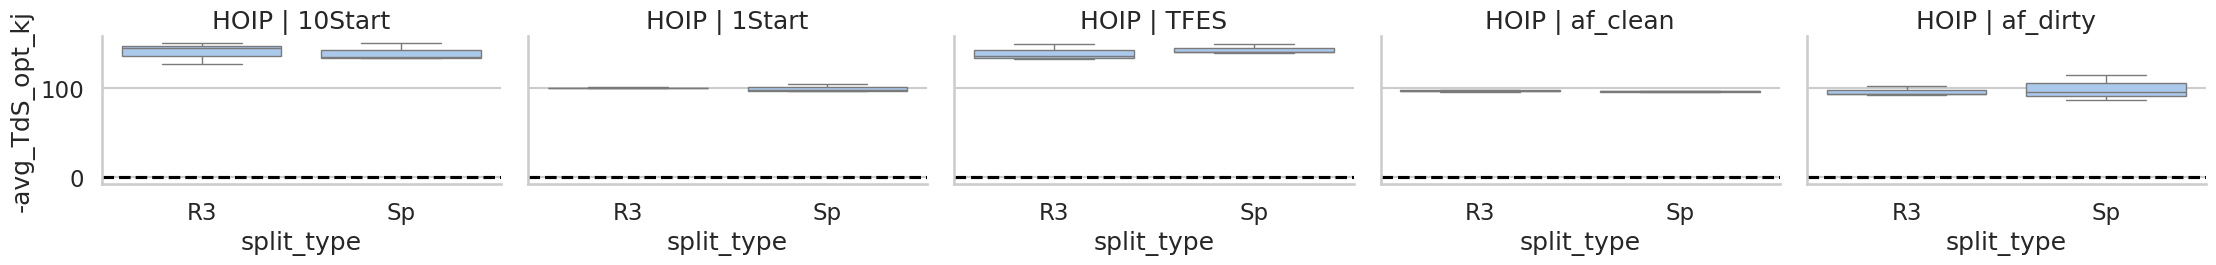

In [241]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]

# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="ensemble", height=3, aspect=1.5, sharey='row', sharex='row', row_order=["HOIP"])#, col_order=split_order, sharex=True)
# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="split_type", y="-avg_TdS_opt_kj", hue="protein", palette="pastel")#, order=_dataset_order)
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("-avg_TdS_opt_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

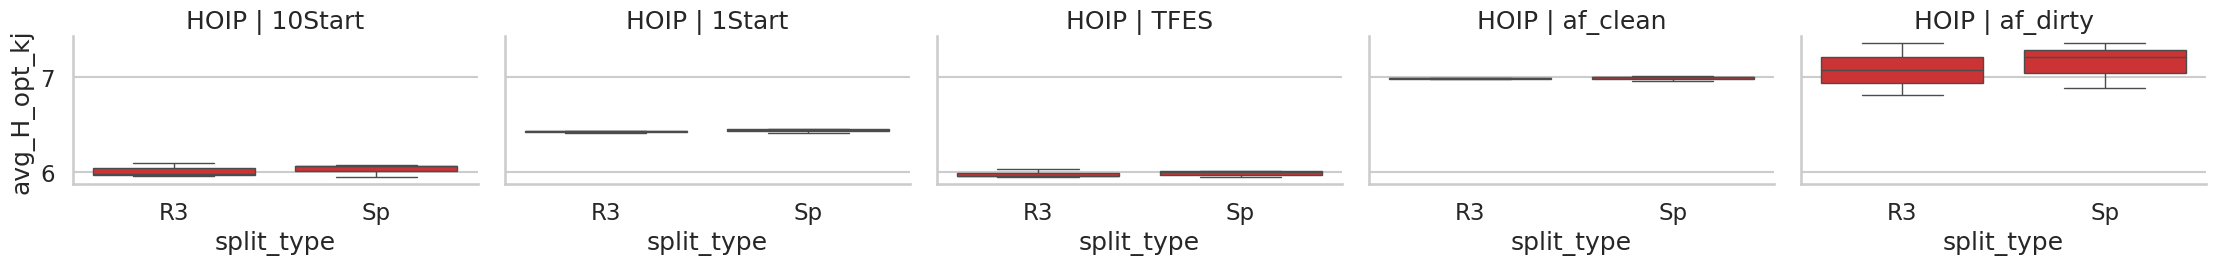

In [242]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]


# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="ensemble", height=3, aspect=1.5, sharey='row', sharex='row', row_order=["HOIP"])#, col_order=split_order, sharex=True)
# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="split_type", y="avg_H_opt_kj", hue="protein", palette="Set1")#, order=_dataset_order)
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("avg_H_opt_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
# for ax in g.axes.flat:
#     ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

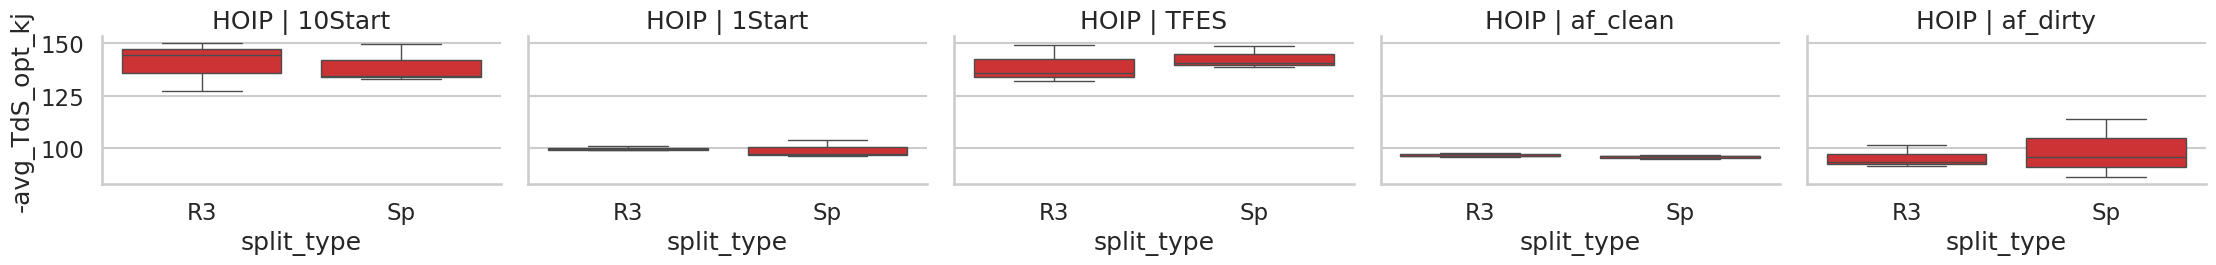

In [243]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]


# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="ensemble", height=3, aspect=1.5, sharey='row', sharex='row', row_order=["HOIP"])#, col_order=split_order, sharex=True)
# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="split_type", y="-avg_TdS_opt_kj", hue="protein", palette="Set1")#, order=_dataset_order)
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("-avg_TdS_opt_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
# for ax in g.axes.flat:
#     ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

In [244]:
ensemble_pmf_df.protein.unique()

array(['HOIP'], dtype=object)

  dataset                                     name  \
0    test      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1    test      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2    test      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3    test  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   
4    test  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   

                                    system  \
0      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   
4  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   

                                 system_name            calc_name  \
0      HOIP_MD_TFES_RW_bench_R3_k_sequence_1  test_HOIP_MD_TFES_1   
1      HOIP_MD_TFES_RW_bench_R3_k_sequence_2  test_HOIP_MD_TFES_2   
2      HOIP_MD_TFES_RW_bench_R3_k_sequence_3  test_HOIP_MD_TFES_3   
3  HOIP_MD_TFES_RW_bench_Sp_res_neighbours_1  test_HOIP_MD_TFES_1   
4  HOIP_MD_TFES_RW_bench_Sp_res_neighbours_2  test_HO

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more

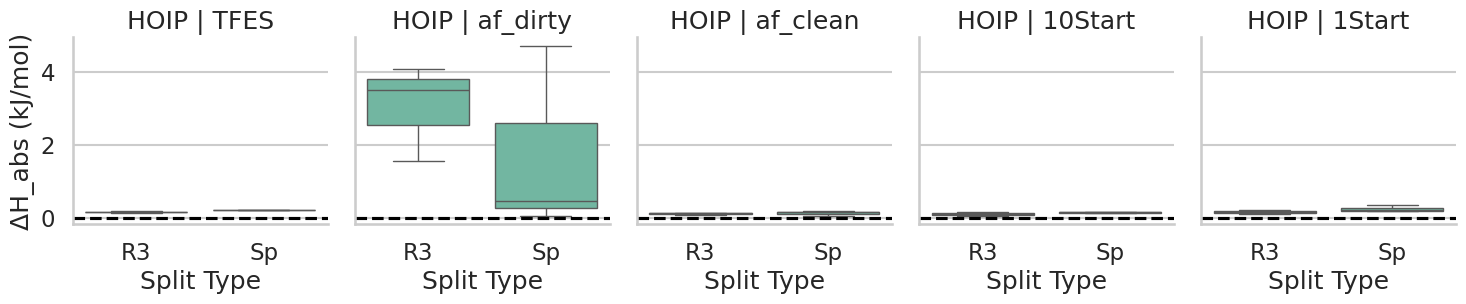

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# Filter data for specific split types
_ensemble_pmf_df = ensemble_pmf_df[ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]

# Filter for dataset order
_ensemble_pmf_df = _ensemble_pmf_df[_ensemble_pmf_df["ensemble"].isin(_dataset_order)]

# Print data for verification
print(ensemble_pmf_df.head())

# Create color palette
palette = sns.color_palette("Set2", n_colors=len(_ensemble_pmf_df["split_type"].unique()))

# Create FacetGrid
g = sns.FacetGrid(
    _ensemble_pmf_df,
    row="protein",
    col="ensemble",
    height=3,
    aspect=1,
    sharey='row',
    sharex='row'
)

# Map boxplot
g.map_dataframe(
    sns.boxplot,
    x="split_type",
    y="delta_H_abs_kj",
    hue="ensemble",
    palette=palette,
    order=['R3', 'Sp']
)

# Customize plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_xlabels("Split Type")
g.set_ylabels("ΔH_abs (kJ/mol)")

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# Adjust layout
plt.subplots_adjust(top=0.95)

# Show plot
plt.show()

  dataset                                     name  \
0    test      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1    test      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2    test      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3    test  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   
4    test  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   

                                    system  \
0      HOIP_MD_TFES_RW_bench_R3_k_sequence   
1      HOIP_MD_TFES_RW_bench_R3_k_sequence   
2      HOIP_MD_TFES_RW_bench_R3_k_sequence   
3  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   
4  HOIP_MD_TFES_RW_bench_Sp_res_neighbours   

                                 system_name            calc_name  \
0      HOIP_MD_TFES_RW_bench_R3_k_sequence_1  test_HOIP_MD_TFES_1   
1      HOIP_MD_TFES_RW_bench_R3_k_sequence_2  test_HOIP_MD_TFES_2   
2      HOIP_MD_TFES_RW_bench_R3_k_sequence_3  test_HOIP_MD_TFES_3   
3  HOIP_MD_TFES_RW_bench_Sp_res_neighbours_1  test_HOIP_MD_TFES_1   
4  HOIP_MD_TFES_RW_bench_Sp_res_neighbours_2  test_HO

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more

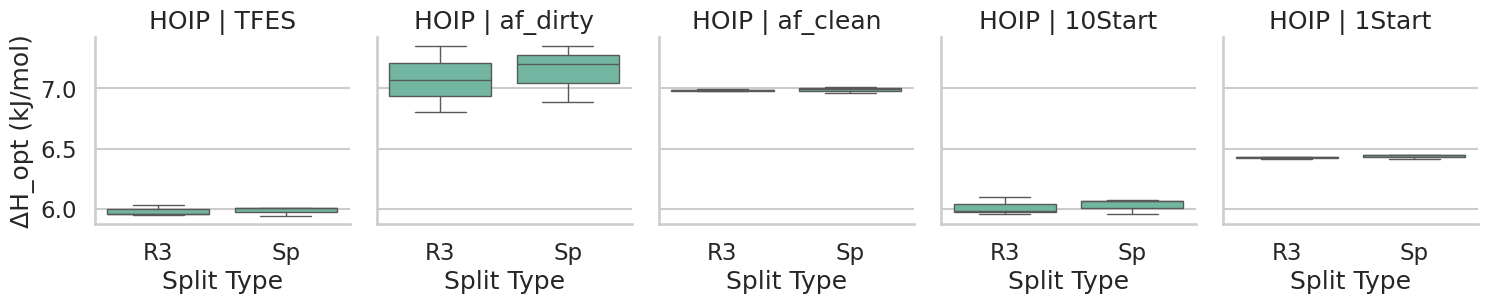

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for specific split types
_ensemble_pmf_df = ensemble_pmf_df[ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]

# Filter for dataset order
_ensemble_pmf_df = _ensemble_pmf_df[_ensemble_pmf_df["ensemble"].isin(_dataset_order)]

# Print data for verification
print(ensemble_pmf_df.head())

# Create color palette
palette = sns.color_palette("Set2", n_colors=len(_ensemble_pmf_df["split_type"].unique()))

# Create FacetGrid
g = sns.FacetGrid(
    _ensemble_pmf_df,
    row="protein",
    col="ensemble",
    height=3,
    aspect=1,
    sharey='row',
    sharex='row'
)

# Map boxplot
g.map_dataframe(
    sns.boxplot,
    x="split_type",
    y="avg_H_opt_kj",
    hue="ensemble",
    palette=palette,
    order=['R3', 'Sp']
)

# Customize plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_xlabels("Split Type")
g.set_ylabels("ΔH_opt (kJ/mol)")

# Add horizontal line at y=0
# for ax in g.axes.flat:
#     ax.axhline(y=0, color='black', linestyle='--')

# Adjust layout
plt.subplots_adjust(top=0.95)

# Show plot
plt.show()

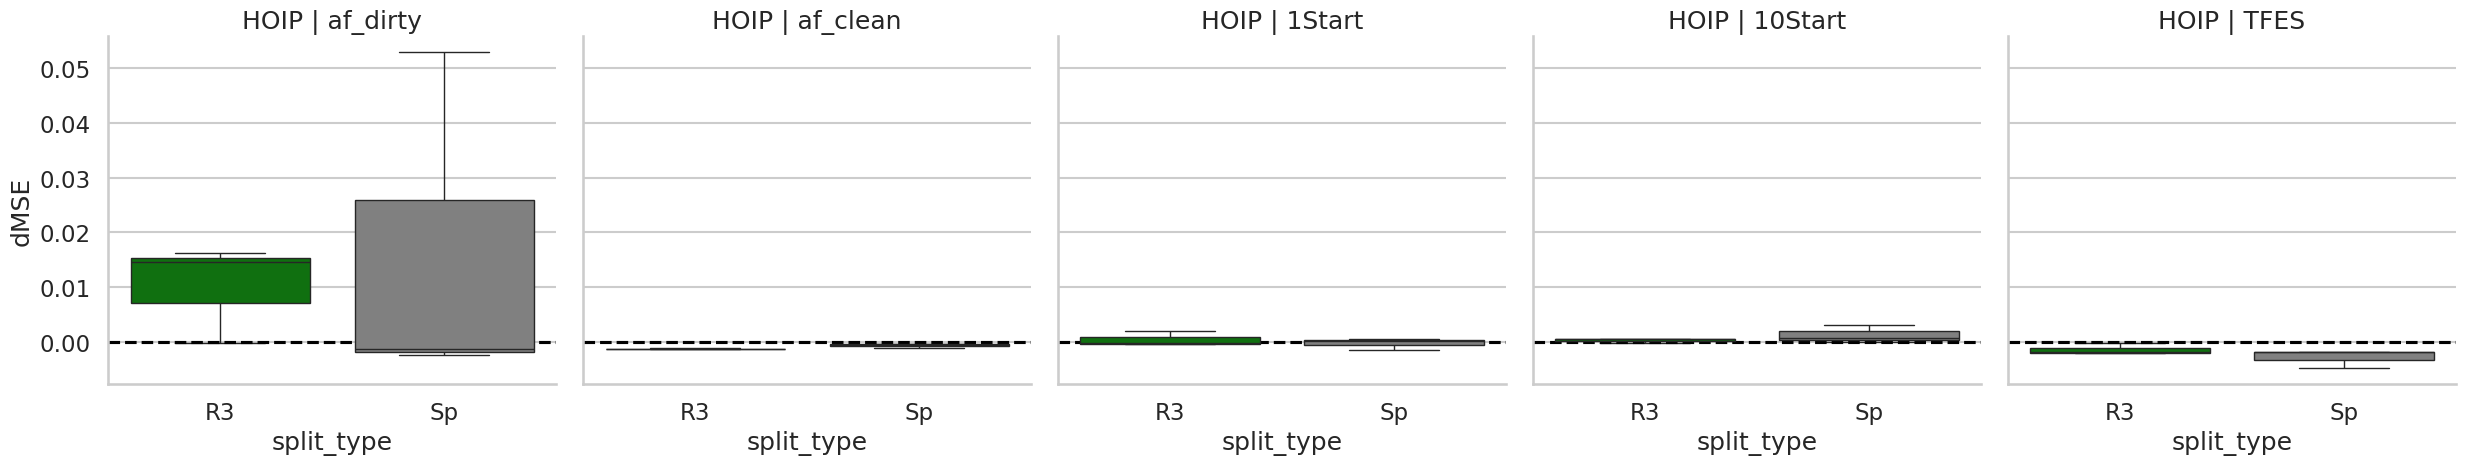

In [288]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]

# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="ensemble", height=5, aspect=1, sharey='row', sharex='row', row_order=["HOIP"], col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="split_type", y="dMSE", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("dMSE")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

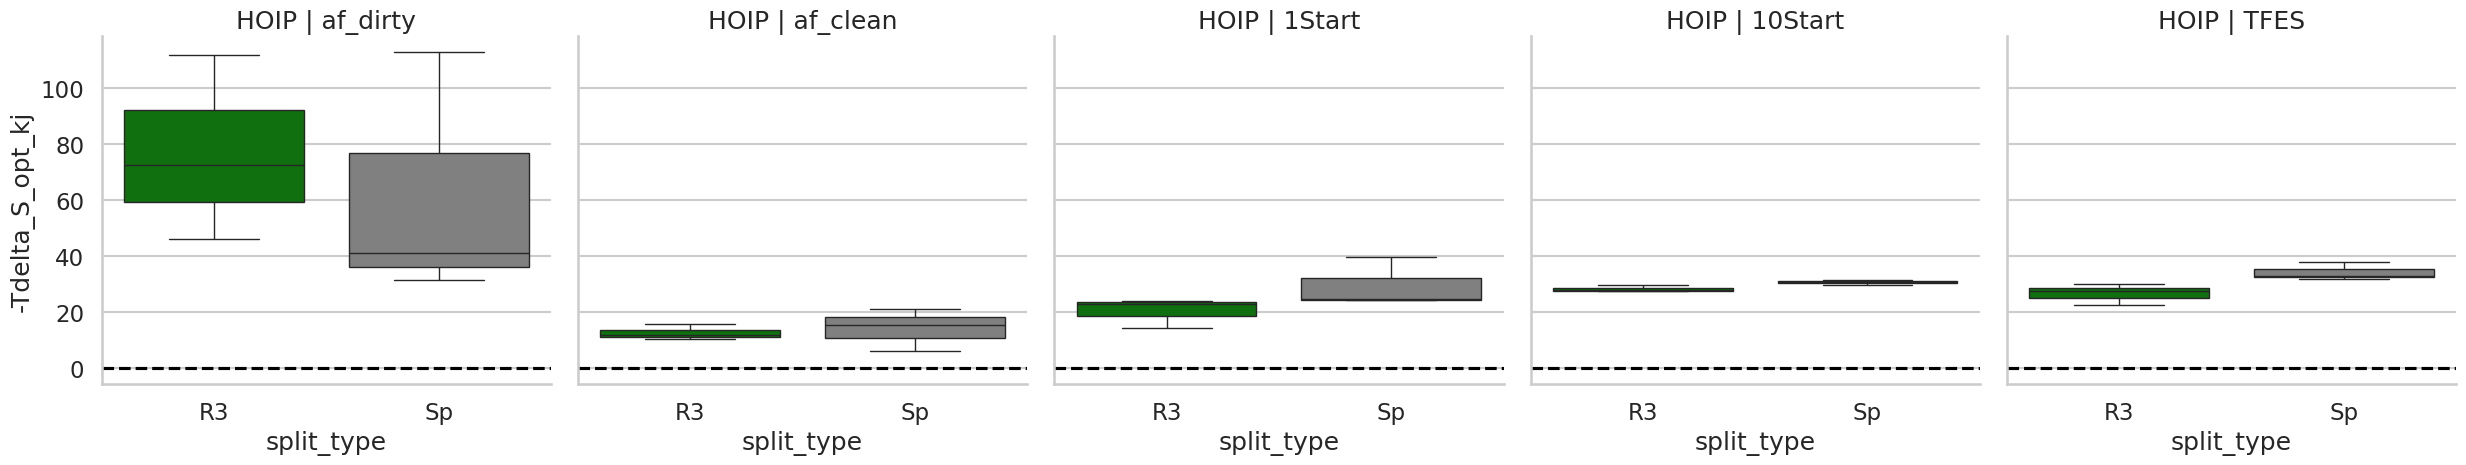

In [287]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]

# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="ensemble", height=5, aspect=1, sharey='row', sharex='row', row_order=["HOIP"], col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="split_type", y="-Tdelta_S_opt_kj", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("-Tdelta_S_opt_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

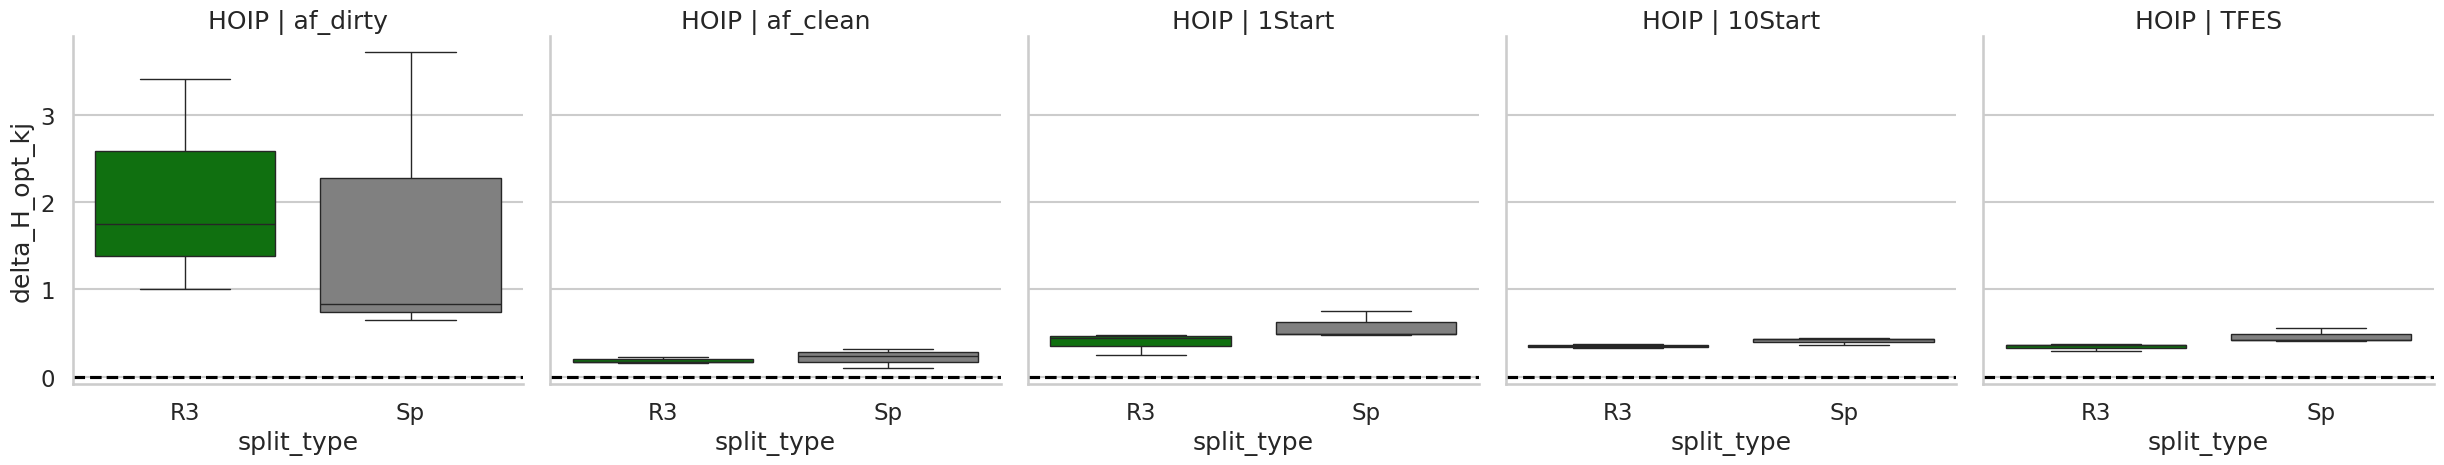

In [286]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
_dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]

# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
# Map the boxplot to the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="ensemble", height=5, aspect=1, sharey='row', sharex='row', row_order=["HOIP"], col_order=_dataset_order)
g.map_dataframe(sns.boxplot, x="split_type", y="delta_H_opt_kj", hue="split_type", palette={"R3": "green", "Sp": "grey"})
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("delta_H_opt_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

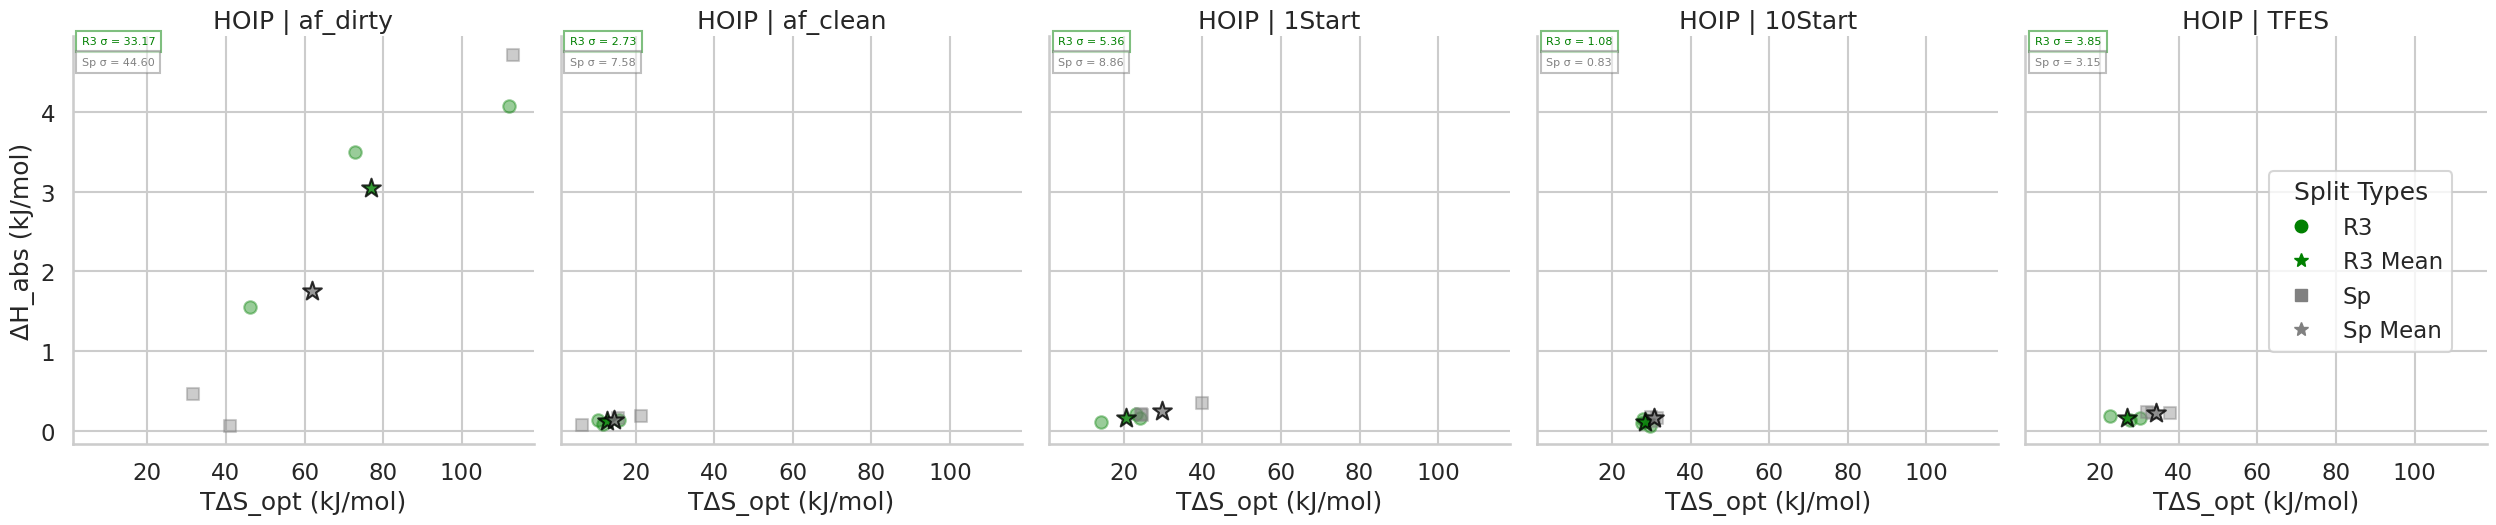

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up the data
# Filter data for specific split types
_ensemble_pmf_df = ensemble_pmf_df[ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# Filter for dataset order
_ensemble_pmf_df = _ensemble_pmf_df[_ensemble_pmf_df["ensemble"].isin(_dataset_order)]

# Force the order of the datasets
_ensemble_pmf_df["ensemble"] = pd.Categorical(_ensemble_pmf_df["ensemble"], categories=_dataset_order, ordered=True)

# Define consistent styles for split types
split_styles = {
    'R3': {'marker': 'o', 'color': 'Green'},  # Orange
    'Sp': {'marker': 's', 'color': 'Grey'}   # Blue
}

# Create the FacetGrid
g = sns.FacetGrid(_ensemble_pmf_df, 
                  row="protein", 
                  col="ensemble", 
                  height=5, 
                  aspect=1, 
                  sharey='row', 
                  sharex='row')

# Custom scatter plot function with consistent styling
def custom_scatter(data, **kwargs):
    ax = plt.gca()
    for split_type, style in split_styles.items():
        subset = data[data["split_type"] == split_type]
        ax.scatter(subset["-Tdelta_S_opt_kj"], 
                  subset["delta_H_abs_kj"],
                  marker=style['marker'],
                  color=style['color'],
                #   s=subset["avg_H_opt_kj"]*10,
                  label=split_type,
                  alpha=0.4)

# Function to calculate and annotate mean, median, and std dev with consistent styling
def annotate_statistics(data, **kwargs):
    ax = plt.gca()
    for split_type, style in split_styles.items():
        subset = data[data["split_type"] == split_type]
        if len(subset) > 0:
            # Calculate statistics
            mean_x = subset["-Tdelta_S_opt_kj"].mean()
            mean_y = subset["delta_H_abs_kj"].mean()
            median_x = subset["-Tdelta_S_opt_kj"].median()
            median_y = subset["delta_H_abs_kj"].median()
            
            # Calculate multivariate standard deviation
            X = np.vstack([subset["-Tdelta_S_opt_kj"], subset["delta_H_abs_kj"]]).T
            cov_matrix = np.cov(X.T)
            mult_std = np.sqrt(np.trace(cov_matrix))
            
            # Plot mean with darker version of split type color
            ax.scatter(mean_x, mean_y, 
                      marker='*', 
                      s=200,
                      color=style['color'], 
                      edgecolor='black',
                      label=f'{split_type} Mean',
                      alpha=0.8,
                      zorder=5)
            
            # # Plot median with lighter version of split type color
            # ax.scatter(median_x, median_y, 
            #           marker='D', 
            #           s=100,
            #           color=style['color'], 
            #           edgecolor='black',
            #           alpha=1,
            #           label=f'{split_type} Median',
            #           zorder=5)
            
            # Add std dev annotation in the corner
            ax.annotate(f'{split_type} σ = {mult_std:.2f}', 
                       xy=(0.02, 0.98 - (0.05 * list(split_styles.keys()).index(split_type))),
                       xycoords='axes fraction',
                       fontsize=8,
                       color=style['color'],
                       bbox=dict(facecolor='white', edgecolor=style['color'], alpha=0.5))

# Apply the plotting functions
g.map_dataframe(custom_scatter)
g.map_dataframe(annotate_statistics)

# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")
# g.set(yscale="log")

# Add axis labels
g.set_axis_labels("TΔS_opt (kJ/mol)", "ΔH_abs (kJ/mol)")

# Adjust layout
plt.subplots_adjust(top=0.95)

# Add a custom legend
handles = []
labels = []
for split_type, style in split_styles.items():
    # Add scatter plot points
    handles.append(plt.Line2D([0], [0], 
                            marker=style['marker'],
                            color=style['color'],
                            linestyle='None',
                            label=split_type))
    # Add mean markers
    handles.append(plt.Line2D([0], [0], 
                            marker='*',
                            color=style['color'],
                            # markeredgecolor='black',
                            linestyle='None',
                            markersize=10,
                            label=f'{split_type} Mean'))
    # # Add median markers
    # handles.append(plt.Line2D([0], [0], 
    #                         marker='D',
    #                         color=style['color'],
    #                         markeredgecolor='black',
    #                         linestyle='None',
    #                         alpha=0.7,
    #                         markersize=8,
    #                         label=f'{split_type} Median'))
    labels.extend([split_type, f'{split_type} Mean'])

g.fig.legend(handles, labels, 
            loc='center right', 
            bbox_to_anchor=(0.98, 0.5),
            title="Split Types")

plt.show()

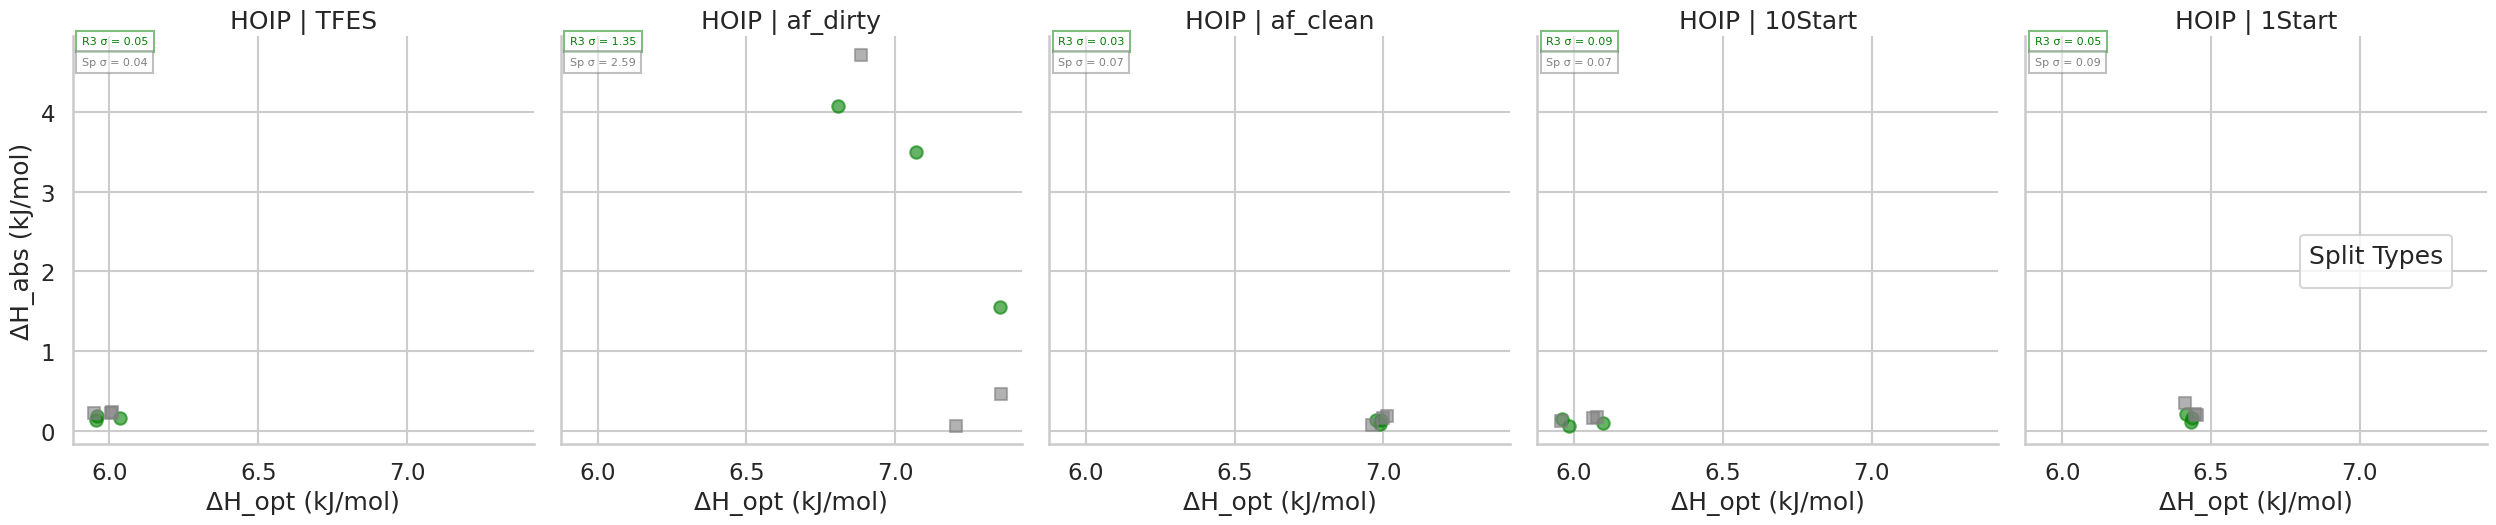

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up the data
# Filter data for specific split types
_ensemble_pmf_df = ensemble_pmf_df[ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

# Filter for dataset order
_ensemble_pmf_df = _ensemble_pmf_df[_ensemble_pmf_df["ensemble"].isin(_dataset_order)]

# Define consistent styles for split types
split_styles = {
    'R3': {'marker': 'o', 'color': 'Green'},  # Orange
    'Sp': {'marker': 's', 'color': 'Grey'}   # Blue
}

# Create the FacetGrid
g = sns.FacetGrid(_ensemble_pmf_df, 
                  row="protein", 
                  col="ensemble", 
                  height=5, 
                  aspect=1, 
                  sharey='row', 
                  sharex='row')

# Custom scatter plot function with consistent styling
def custom_scatter(data, **kwargs):
    ax = plt.gca()
    for split_type, style in split_styles.items():
        subset = data[data["split_type"] == split_type]
        ax.scatter(subset["avg_H_opt_kj"], 
                  subset["delta_H_abs_kj"],
                  marker=style['marker'],
                  color=style['color'],
                #   s=subset["avg_H_opt_kj"]*10,
                  label=split_type,
                  alpha=0.6)

# Function to calculate and annotate mean, median, and std dev with consistent styling
def annotate_statistics(data, **kwargs):
    ax = plt.gca()
    for split_type, style in split_styles.items():
        subset = data[data["split_type"] == split_type]
        if len(subset) > 0:
            # Calculate statistics
            mean_x = subset["avg_H_opt_kj"].mean()
            mean_y = subset["delta_H_abs_kj"].mean()
            median_x = subset["avg_H_opt_kj"].median()
            median_y = subset["delta_H_abs_kj"].median()
            
            # Calculate multivariate standard deviation
            X = np.vstack([subset["avg_H_opt_kj"], subset["delta_H_abs_kj"]]).T
            cov_matrix = np.cov(X.T)
            mult_std = np.sqrt(np.trace(cov_matrix))
            
            # Plot mean with darker version of split type color
            # ax.scatter(mean_x, mean_y, 
            #           marker='*', 
            #           s=200,
            #           color=style['color'], 
            #           edgecolor='black',
            #           label=f'{split_type} Mean',
            #           zorder=5)
            
            # # Plot median with lighter version of split type color
            # ax.scatter(median_x, median_y, 
            #           marker='D', 
            #           s=100,
            #           color=style['color'], 
            #           edgecolor='black',
            #           alpha=1,
            #           label=f'{split_type} Median',
            #           zorder=5)
            
            # Add std dev annotation in the corner
            ax.annotate(f'{split_type} σ = {mult_std:.2f}', 
                       xy=(0.02, 0.98 - (0.05 * list(split_styles.keys()).index(split_type))),
                       xycoords='axes fraction',
                       fontsize=8,
                       color=style['color'],
                       bbox=dict(facecolor='white', edgecolor=style['color'], alpha=0.5))

# Apply the plotting functions
g.map_dataframe(custom_scatter)
g.map_dataframe(annotate_statistics)

# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")
# g.set(yscale="log")

# Add axis labels
g.set_axis_labels("ΔH_opt (kJ/mol)", "ΔH_abs (kJ/mol)")

# Adjust layout
plt.subplots_adjust(top=0.95)

# Add a custom legend
handles = []
labels = []
for split_type, style in split_styles.items():
    # Add scatter plot points
    handles.append(plt.Line2D([0], [0], 
                            marker=style['marker'],
                            color=style['color'],
                            linestyle='None',
                            label=split_type))
    # Add mean markers
    # handles.append(plt.Line2D([0], [0], 
    #                         marker='*',
    #                         color=style['color'],
    #                         markeredgecolor='black',
    #                         linestyle='None',
    #                         markersize=10,
    #                         label=f'{split_type} Mean'))
    # # Add median markers
    # handles.append(plt.Line2D([0], [0], 
    #                         marker='D',
    #                         color=style['color'],
    #                         markeredgecolor='black',
    #                         linestyle='None',
    #                         alpha=0.7,
    #                         markersize=8,
    #                         label=f'{split_type} Median'))
    # labels.extend([split_type, f'{split_type} Mean', f'{split_type} Median'])

g.fig.legend(handles, labels, 
            loc='center right', 
            bbox_to_anchor=(0.98, 0.5),
            title="Split Types")

plt.show()

In [249]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Set up the data
# # Filter data for specific split types
# _ensemble_pmf_df = ensemble_pmf_df[ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# # Filter for dataset order
# _ensemble_pmf_df = _ensemble_pmf_df[_ensemble_pmf_df["ensemble"].isin(_dataset_order)]

# # Define consistent styles for split types
# split_styles = {
#     'R3': {'marker': 'o', 'color': 'Green'},  # Orange
#     'Sp': {'marker': 's', 'color': 'Grey'}   # Blue
# }

# # Create the FacetGrid
# g = sns.FacetGrid(_ensemble_pmf_df, 
#                   row="protein", 
#                   col="ensemble", 
#                   height=5, 
#                   aspect=1, 
#                   sharey='row', 
#                   sharex='row')

# # Custom scatter plot function with consistent styling
# def custom_scatter(data, **kwargs):
#     ax = plt.gca()
#     for split_type, style in split_styles.items():
#         subset = data[data["split_type"] == split_type]
#         ax.scatter(subset["-avg_TdS_opt_kj"], 
#                   subset["avg_H_opt_kj"],
#                   marker=style['marker'],
#                   color=style['color'],
#                   s=subset["delta_H_abs"],
#                   label=split_type,
#                   alpha=0.6)

# # Function to calculate and annotate mean, median, and std dev with consistent styling
# def annotate_statistics(data, **kwargs):
#     ax = plt.gca()
#     for split_type, style in split_styles.items():
#         subset = data[data["split_type"] == split_type]
#         if len(subset) > 0:
#             # Calculate statistics
#             mean_x = subset["-avg_TdS_opt_kj"].mean()
#             mean_y = subset["avg_H_opt_kj"].mean()
#             median_x = subset["-avg_TdS_opt_kj"].median()
#             median_y = subset["avg_H_opt_kj"].median()
            
#             # Calculate multivariate standard deviation
#             X = np.vstack([subset["-avg_TdS_opt_kj"], subset["avg_H_opt_kj"]]).T
#             cov_matrix = np.cov(X.T)
#             mult_std = np.sqrt(np.trace(cov_matrix))
            
#             # Plot mean with darker version of split type color
#             # ax.scatter(mean_x, mean_y, 
#             #           marker='*', 
#             #           s=200,
#             #           color=style['color'], 
#             #           edgecolor='black',
#             #           label=f'{split_type} Mean',
#             #           zorder=5)
            
#             # # Plot median with lighter version of split type color
#             # ax.scatter(median_x, median_y, 
#             #           marker='D', 
#             #           s=100,
#             #           color=style['color'], 
#             #           edgecolor='black',
#             #           alpha=1,
#             #           label=f'{split_type} Median',
#             #           zorder=5)
            
#             # Add std dev annotation in the corner
#             ax.annotate(f'{split_type} σ = {mult_std:.2f}', 
#                        xy=(0.02, 0.98 - (0.05 * list(split_styles.keys()).index(split_type))),
#                        xycoords='axes fraction',
#                        fontsize=8,
#                        color=style['color'],
#                        bbox=dict(facecolor='white', edgecolor=style['color'], alpha=0.5))

# # Apply the plotting functions
# g.map_dataframe(custom_scatter)
# g.map_dataframe(annotate_statistics)

# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}")
# # g.set(yscale="log")

# # Add axis labels
# g.set_axis_labels("TΔS_opt (kJ/mol)", "ΔH_opt (kJ/mol)")

# # Adjust layout
# plt.subplots_adjust(top=0.95)

# # Add a custom legend
# handles = []
# labels = []
# for split_type, style in split_styles.items():
#     # Add scatter plot points
#     handles.append(plt.Line2D([0], [0], 
#                             marker=style['marker'],
#                             color=style['color'],
#                             linestyle='None',
#                             label=split_type))
#     # Add mean markers
#     # handles.append(plt.Line2D([0], [0], 
#     #                         marker='*',
#     #                         color=style['color'],
#     #                         markeredgecolor='black',
#     #                         linestyle='None',
#     #                         markersize=10,
#     #                         label=f'{split_type} Mean'))
#     # # Add median markers
#     # handles.append(plt.Line2D([0], [0], 
#     #                         marker='D',
#     #                         color=style['color'],
#     #                         markeredgecolor='black',
#     #                         linestyle='None',
#     #                         alpha=0.7,
#     #                         markersize=8,
#     #                         label=f'{split_type} Median'))
#     # labels.extend([split_type, f'{split_type} Mean', f'{split_type} Median'])

# g.fig.legend(handles, labels, 
#             loc='center right', 
#             bbox_to_anchor=(0.98, 0.5),
#             title="Split Types")

# plt.show()

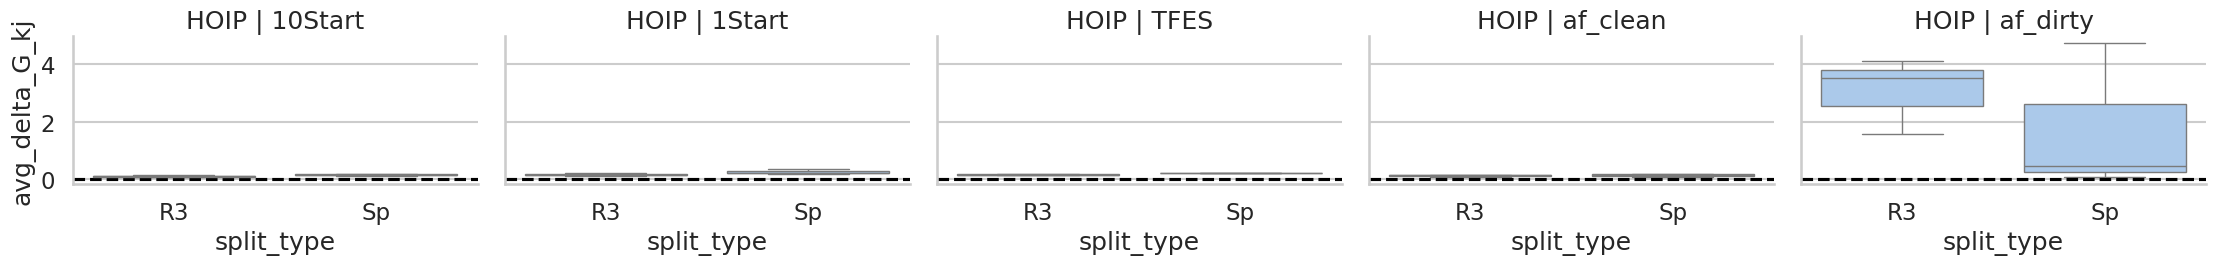

In [250]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
# sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["MD_Bad", "af_clean"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin([ "R3", "Sp"])]


# include only the _dataset_order
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="ensemble", height=3, aspect=1.5, sharey='row', sharex='row', row_order=["HOIP"])#, col_order=split_order, sharex=True)
# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="split_type", y="delta_H_abs_kj", hue="protein", palette="pastel")#, order=_dataset_order)
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
g.set_ylabels("avg_delta_G_kj")#, fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
# g.tight_layout()
# Add legend
# g.set(yscale="log")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# g.add_legend(title="split type")#, fontsize=12)
# Show the plot
# g.set(ylim=(-3, 0))
plt.show()

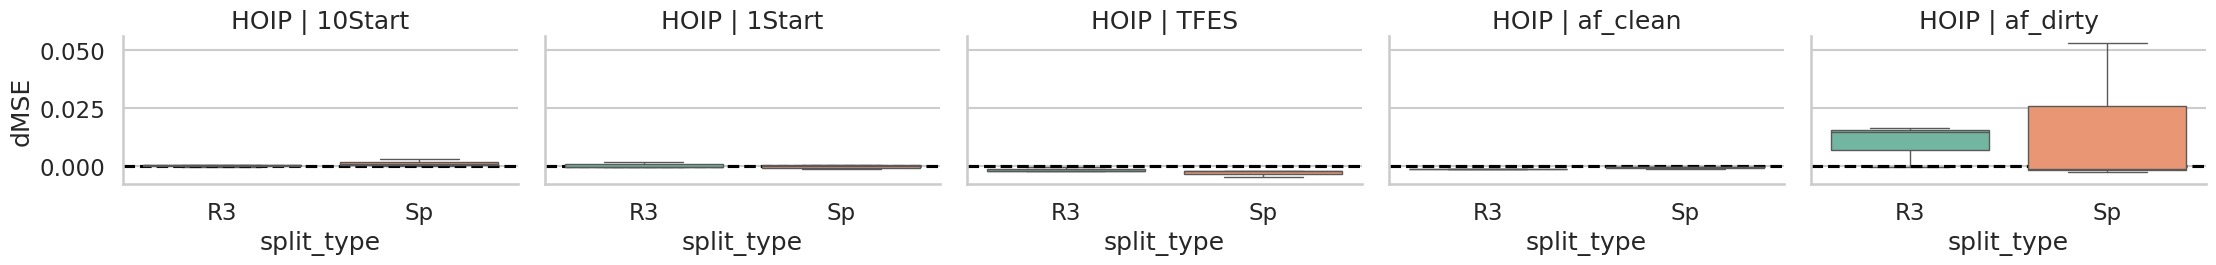

In [251]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set context and style
sns.set_style("whitegrid")

# Create the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="ensemble", height=3, aspect=1.5, sharey='row', sharex='row', row_order=["HOIP"])

# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="split_type", y="dMSE", hue="split_type", palette="Set2")

# Add a line at y = 0
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("dMSE")

# Show the plot
plt.show()


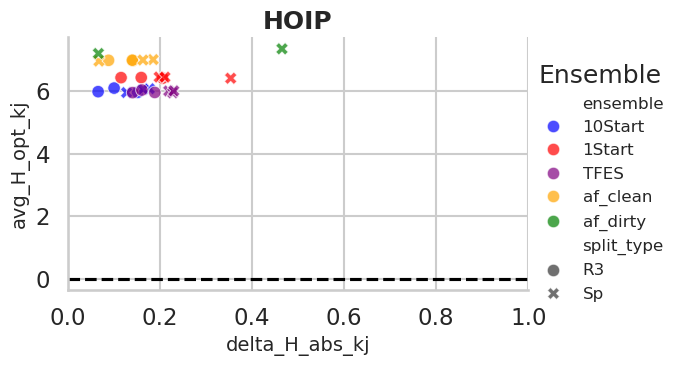

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Define the custom palette and order
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

_dataset_colours = {
    "af_dirty": "green",
    "af_clean": "orange",
    "MD_Good": "red",
    "MD_Bad": "blue",
    "MD_Good+Bad": "purple",
    "1Start": "red",
    "10Start": "blue",
    "TFES": "purple"


}

# Filter the dataframe
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(
    _dMSE_energy_df, 
    row="protein",
    height=4, 
    aspect=1.5, 
    sharey=False, 
    sharex=False, 
    row_order=["HOIP"]
)

# Map the scatterplot to the FacetGrid
g.map_dataframe(
    sns.scatterplot, 
    x="delta_H_abs_kj", 
    y="avg_H_opt_kj", 
    hue="ensemble", 
    palette=_dataset_colours, 
    style="split_type",
    alpha=0.7
)

# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("delta_H_abs_kj", fontsize=14)
g.set_ylabels("avg_H_opt_kj", fontsize=14)

# Adjust subplot spacing
g.tight_layout()
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# Add legend
# g.set(xscale="log")
g.set(xlim=(0,1))
g.add_legend(title="Ensemble", fontsize=12)

# Show the plot
plt.show()


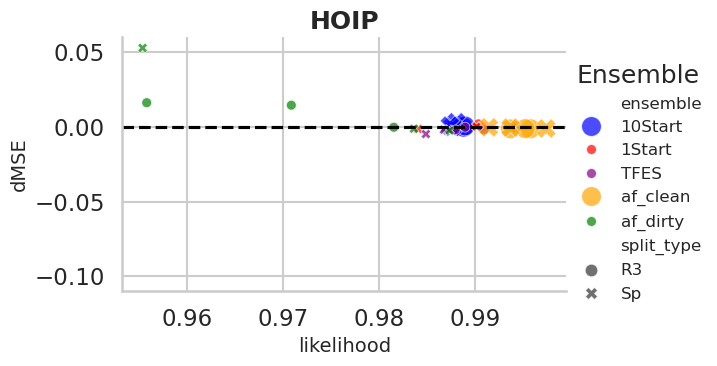

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Define the custom palette and order
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

_dataset_colours = {
    "af_dirty": "green",
    "af_clean": "orange",
    "MD_Good": "red",
    "MD_Bad": "blue",
    "MD_Good+Bad": "purple",
    "1Start": "red",
    "10Start": "blue",
    "TFES": "purple"


}

# Define custom sizes for each dataset
_dataset_sizes = {
    "af_dirty": 50,
    "af_clean": 200,
    "MD_Good": 50,
    "MD_Bad": 200,
    "MD_Good+Bad": 50,
    "1Start": 50,
    "10Start": 200,
    "TFES": 50
}

# Filter the dataframe
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(
    _dMSE_energy_df,
    row="protein",
    height=4,
    aspect=1.5,
    sharey=False,
    sharex=False,
    row_order=["HOIP"]
)

# Map the scatterplot to the FacetGrid
g.map_dataframe(
    sns.scatterplot,
    x="quasi_likelihood",
    y="dMSE",
    hue="ensemble",
    palette=_dataset_colours,
    style="split_type",
    alpha=0.7,
    size="ensemble",  # Use 'ensemble' column for size
    sizes=_dataset_sizes  # Use custom sizes
)

# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("likelihood", fontsize=14)
g.set_ylabels("dMSE", fontsize=14)

# Adjust subplot spacing
g.tight_layout()
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# Add legend
# g.set(xlim=(0.4,1))
g.set(ylim=(-0.11, 0.06))
g.add_legend(title="Ensemble", fontsize=12)

# Show the plot
plt.show()

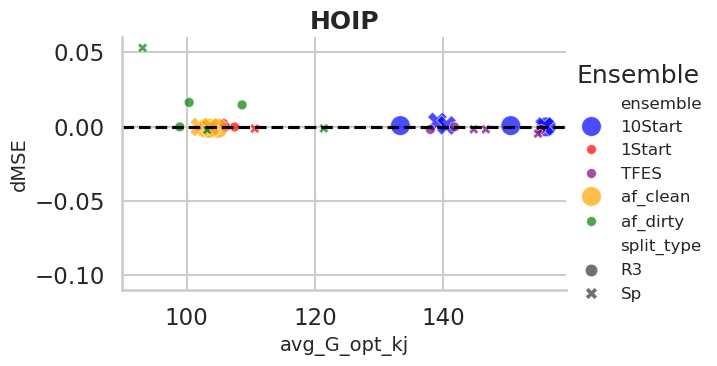

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Define the custom palette and order
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]
_dataset_order = ["af_dirty", "af_clean", "1Start", "10Start", "TFES"]

_dataset_colours = {
    "af_dirty": "green",
    "af_clean": "orange",
    "MD_Good": "red",
    "MD_Bad": "blue",
    "MD_Good+Bad": "purple",
    "1Start": "red",
    "10Start": "blue",
    "TFES": "purple"


}
# Define custom sizes for each dataset
_dataset_sizes = {
    "af_dirty": 50,
    "af_clean": 200,
    "MD_Good": 50,
    "MD_Bad": 200,
    "MD_Good+Bad": 50,
    "1Start": 50,
    "10Start": 200,
    "TFES": 50
}
# Filter the dataframe
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(
    _dMSE_energy_df,
    row="protein",
    height=4,
    aspect=1.5,
    sharey=False,
    sharex=False,
    row_order=["HOIP"]
)

# Map the scatterplot to the FacetGrid
g.map_dataframe(
    sns.scatterplot,
    x="avg_G_opt_kj",
    y="dMSE",
    hue="ensemble",
    palette=_dataset_colours,
    style="split_type",
    alpha=0.7,
    size="ensemble",  # Use 'ensemble' column for size
    sizes=_dataset_sizes  # Use custom sizes
)

# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("avg_G_opt_kj", fontsize=14)
g.set_ylabels("dMSE", fontsize=14)

# Adjust subplot spacing
g.tight_layout()
for ax in g.axes.flat:
    ax.axhline(y=0, color='black', linestyle='--')

# Add legend
# g.set(xlim=(0.9,1))
g.set(ylim=(-0.11, 0.06))
g.add_legend(title="Ensemble", fontsize=12)

# Show the plot
plt.show()

In [255]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Set up the data
# _dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Define consistent styles for split types
# split_styles = {
#     'R3': {'marker': 'o', 'color': 'Green'},
#     'Sp': {'marker': 's', 'color': 'Grey'}
# }

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, 
#                   row="protein", 
#                   col="ensemble", 
#                   height=5, 
#                   aspect=1, 
#                   sharey='row', 
#                   sharex='row')

# # Custom scatter plot function with consistent styling
# def custom_scatter(data, **kwargs):
#     ax = plt.gca()
#     ax.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0
#     for split_type, style in split_styles.items():
#         subset = data[data["split_type"] == split_type]
#         ax.scatter(subset["-avg_TdS_opt_kj"], 
#                   subset["dMSE"],
#                   marker=style['marker'],
#                   color=style['color'],
#                   s=subset["delta_H_abs"],
#                   label=split_type,
#                   alpha=0.6)

# # Function to calculate and annotate mean, median, and std dev with consistent styling
# def annotate_statistics(data, **kwargs):
#     ax = plt.gca()
#     for split_type, style in split_styles.items():
#         subset = data[data["split_type"] == split_type]
#         if len(subset) > 0:
#             # Calculate statistics
#             mean_x = subset["-avg_TdS_opt_kj"].mean()
#             mean_y = subset["dMSE"].mean()
#             median_x = subset["-avg_TdS_opt_kj"].median()
#             median_y = subset["dMSE"].median()
            
#             # Calculate multivariate standard deviation
#             X = np.vstack([subset["-avg_TdS_opt_kj"], subset["dMSE"]]).T
#             cov_matrix = np.cov(X.T)
#             mult_std = np.sqrt(np.trace(cov_matrix))
            
#             # Add std dev annotation in the corner
#             ax.annotate(f'{split_type} σ = {mult_std:.2f}', 
#                        xy=(0.02, 0.98 - (0.05 * list(split_styles.keys()).index(split_type))),
#                        xycoords='axes fraction',
#                        fontsize=8,
#                        color=style['color'],
#                        bbox=dict(facecolor='white', edgecolor=style['color'], alpha=0.5))

# # Apply the plotting functions
# g.map_dataframe(custom_scatter)
# g.map_dataframe(annotate_statistics)

# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}")

# # Add axis labels
# g.set_axis_labels("TΔS_opt (kJ/mol)", "dMSE")

# # Adjust layout
# plt.subplots_adjust(top=0.95)

# # Add a custom legend
# handles = []
# labels = []
# for split_type, style in split_styles.items():
#     # Add scatter plot points
#     handles.append(plt.Line2D([0], [0], 
#                             marker=style['marker'],
#                             color=style['color'],
#                             linestyle='None',
#                             label=split_type))

# g.fig.legend(handles, labels, 
#             loc='center right', 
#             bbox_to_anchor=(0.98, 0.5),
#             title="Split Types")

# plt.show()


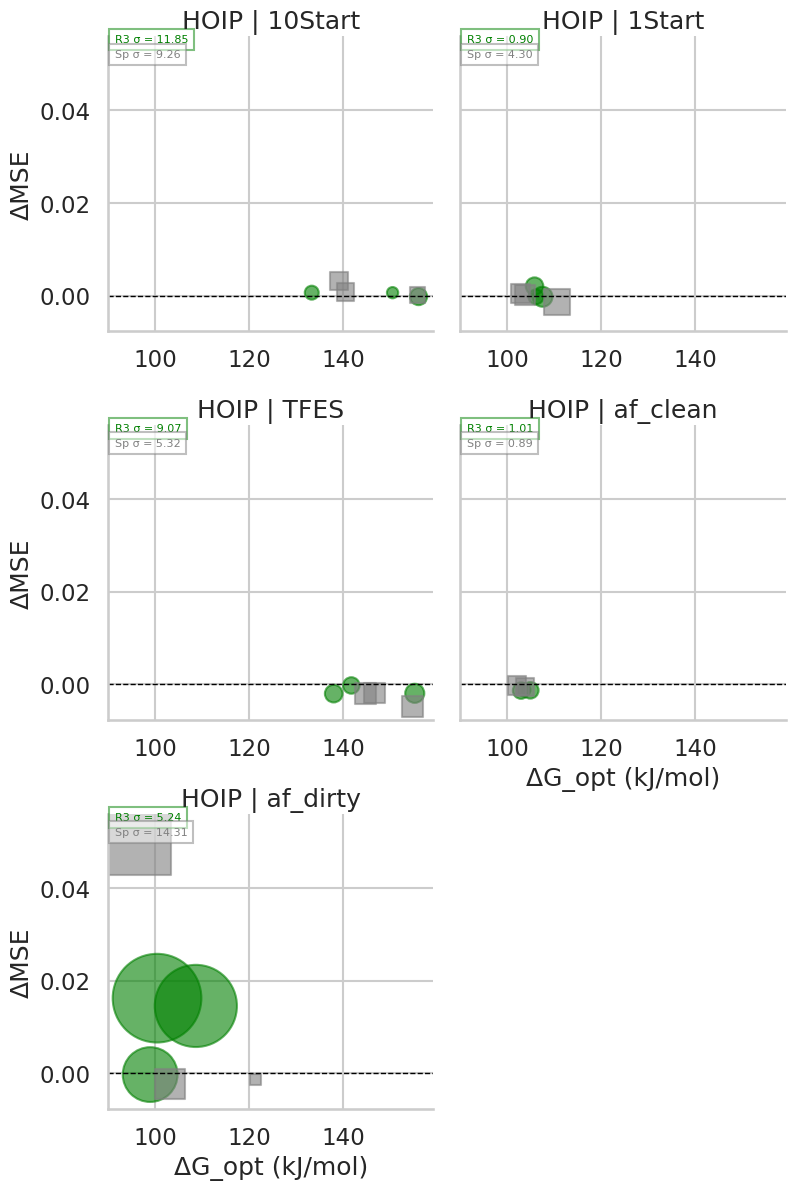

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up the data
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]
# select HOIP
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["protein"].isin(["HOIP"])]
# Define consistent styles for split types
split_styles = {
    'R3': {'marker': 'o', 'color': 'Green'},
    'Sp': {'marker': 's', 'color': 'Grey'}
}

# Create the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, 
                #   row="protein", 
                  col="ensemble", 
                  col_wrap=2,
                  height=4, 
                  aspect=1, 
                  sharey='row', 
                  sharex='row')

# Custom scatter plot function with consistent styling
def custom_scatter(data, **kwargs):
    ax = plt.gca()
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0
    for split_type, style in split_styles.items():
        subset = data[data["split_type"] == split_type]
        ax.scatter(subset["avg_G_opt_kj"], 
                  subset["dMSE"],
                  marker=style['marker'],
                  color=style['color'],
                  s=subset["delta_H_abs"],
                  label=split_type,
                  alpha=0.6)

# Function to calculate and annotate mean, median, and std dev with consistent styling
def annotate_statistics(data, **kwargs):
    ax = plt.gca()
    for split_type, style in split_styles.items():
        subset = data[data["split_type"] == split_type]
        if len(subset) > 0:
            # Calculate statistics
            mean_x = subset["avg_G_opt_kj"].mean()
            mean_y = subset["dMSE"].mean()
            median_x = subset["avg_G_opt_kj"].median()
            median_y = subset["dMSE"].median()
            
            # Calculate multivariate standard deviation
            X = np.vstack([subset["avg_G_opt_kj"], subset["dMSE"]]).T
            cov_matrix = np.cov(X.T)
            mult_std = np.sqrt(np.trace(cov_matrix))
            
            # Add std dev annotation in the corner
            ax.annotate(f'{split_type} σ = {mult_std:.2f}', 
                       xy=(0.02, 0.98 - (0.05 * list(split_styles.keys()).index(split_type))),
                       xycoords='axes fraction',
                       fontsize=8,
                       color=style['color'],
                       bbox=dict(facecolor='white', edgecolor=style['color'], alpha=0.5))

# Apply the plotting functions
g.map_dataframe(custom_scatter)
g.map_dataframe(annotate_statistics)

# Customize the plot
g.set_titles(row_template="{row_name}", col_template="HOIP | {col_name}")

# Add axis labels
g.set_axis_labels("ΔG_opt (kJ/mol)", "ΔMSE")

# Adjust layout
plt.subplots_adjust(top=0.95)

# Add a custom legend
handles = []
labels = []
for split_type, style in split_styles.items():
    # Add scatter plot points
    handles.append(plt.Line2D([0], [0], 
                            marker=style['marker'],
                            color=style['color'],
                            linestyle='None',
                            label=split_type))

# g.fig.legend(handles, labels, 
#             loc='center right', 
#             bbox_to_anchor=(0.98, 0.5),
#             # title="Split Types"
#             )

plt.show()


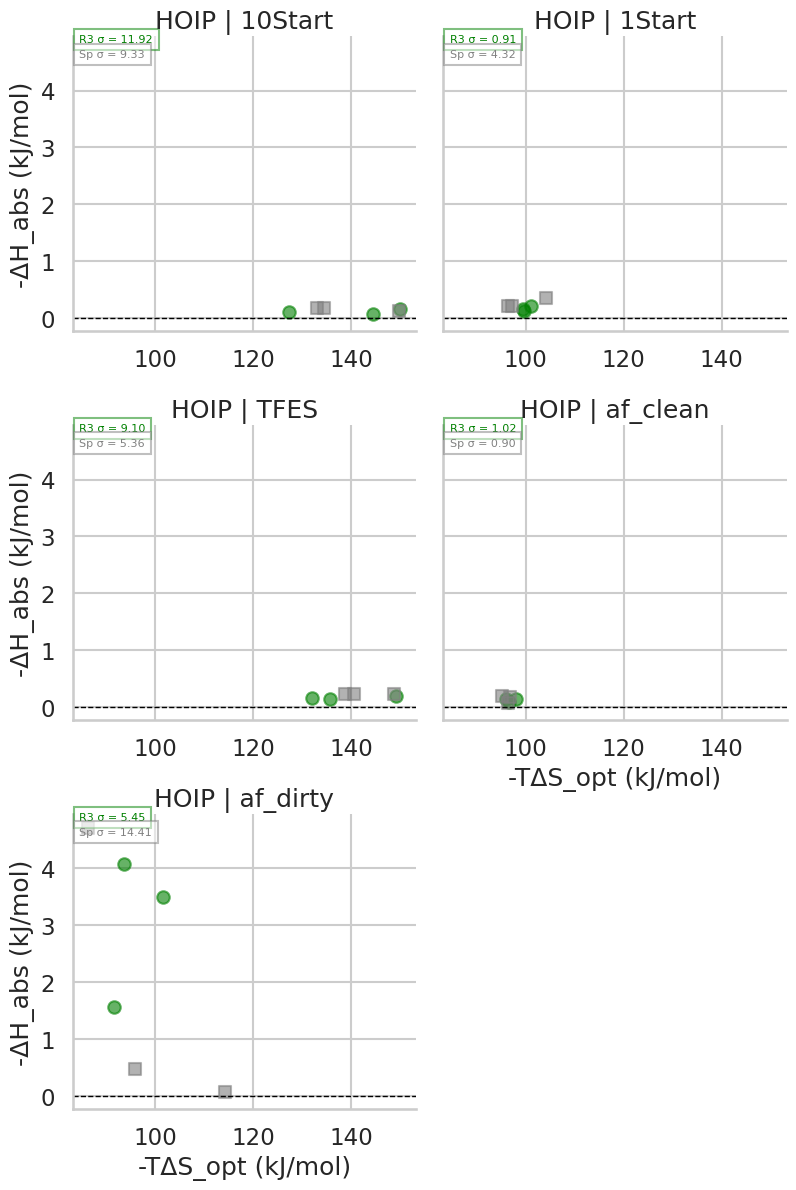

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up the data
_dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]
# select HOIP
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["protein"].isin(["HOIP"])]
# Define consistent styles for split types
split_styles = {
    'R3': {'marker': 'o', 'color': 'Green'},
    'Sp': {'marker': 's', 'color': 'Grey'}
}

# Create the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, 
                #   row="protein", 
                  col="ensemble", 
                  col_wrap=2,
                  height=4, 
                  aspect=1, 
                  sharey='row', 
                  sharex='row')

# Custom scatter plot function with consistent styling
def custom_scatter(data, **kwargs):
    ax = plt.gca()
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0
    for split_type, style in split_styles.items():
        subset = data[data["split_type"] == split_type]
        ax.scatter(subset["-avg_TdS_opt_kj"], 
                  subset["delta_H_abs_kj"],
                  marker=style['marker'],
                  color=style['color'],
                #   s=subset["delta_H_abs"],
                  label=split_type,
                  alpha=0.6)

# Function to calculate and annotate mean, median, and std dev with consistent styling
def annotate_statistics(data, **kwargs):
    ax = plt.gca()
    for split_type, style in split_styles.items():
        subset = data[data["split_type"] == split_type]
        if len(subset) > 0:
            # Calculate statistics
            mean_x = subset["-avg_TdS_opt_kj"].mean()
            mean_y = subset["delta_H_abs_kj"].mean()
            median_x = subset["-avg_TdS_opt_kj"].median()
            median_y = subset["delta_H_abs_kj"].median()
            
            # Calculate multivariate standard deviation
            X = np.vstack([subset["-avg_TdS_opt_kj"], subset["delta_H_abs_kj"]]).T
            cov_matrix = np.cov(X.T)
            mult_std = np.sqrt(np.trace(cov_matrix))
            
            # Add std dev annotation in the corner
            ax.annotate(f'{split_type} σ = {mult_std:.2f}', 
                       xy=(0.02, 0.98 - (0.05 * list(split_styles.keys()).index(split_type))),
                       xycoords='axes fraction',
                       fontsize=8,
                       color=style['color'],
                       bbox=dict(facecolor='white', edgecolor=style['color'], alpha=0.5))

# Apply the plotting functions
g.map_dataframe(custom_scatter)
g.map_dataframe(annotate_statistics)

# Customize the plot
g.set_titles(row_template="{row_name}", col_template="HOIP | {col_name}")

# Add axis labels
g.set_axis_labels("-TΔS_opt (kJ/mol)", "-ΔH_abs (kJ/mol)")

# Adjust layout
plt.subplots_adjust(top=0.95)

# Add a custom legend
handles = []
labels = []
for split_type, style in split_styles.items():
    # Add scatter plot points
    handles.append(plt.Line2D([0], [0], 
                            marker=style['marker'],
                            color=style['color'],
                            linestyle='None',
                            label=split_type))

# g.fig.legend(handles, labels, 
#             loc='center right', 
#             bbox_to_anchor=(0.98, 0.5),
#             # title="Split Types"
#             )

plt.show()


In [258]:
ensemble_pmf_df.quasi_likelihood

0     0.989000
1     0.990967
2     0.987983
3     0.986789
4     0.984908
        ...   
91    0.982051
92    0.987194
93    0.993470
94    0.993011
95    0.991110
Name: quasi_likelihood, Length: 96, dtype: float64

In [259]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")

# # Define the custom palette and order
# _dataset_order = ["af_clean", "MD_Bad"]
# _dataset_colours = {
#     "af_dirty": "green",
#     "af_clean": "orange",
#     "MD_Good": "red",
#     "MD_Bad": "blue",
#     "MD_Good+Bad": "purple"
# }

# _dataset_point_size = {
#     "af_dirty": 2,
#     "af_clean": 10,
#     "MD_Good": 2,
#     "MD_Bad": 10,
#     "MD_Good+Bad": 2
# }

# # Filter the dataframe
# _dMSE_energy_df = dMSE_ensemble_pmf_df[dMSE_ensemble_pmf_df["split_type"].isin(["R3", "Sp"])]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(
#     _dMSE_energy_df, 
#     row="protein",
#     height=4, 
#     aspect=1.5, 
#     sharey=False, 
#     sharex=False, 
#     row_order=["HOIP"]
# )

# # Map the scatterplot to the FacetGrid
# g.map_dataframe(
#     sns.scatterplot, 
#     x="likelihood", 
#     y="dMSE", 
#     hue="ensemble", 
#     palette=_dataset_colours, 
#     style="split_type",
#     alpha=0.7
# )

# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("likelihood", fontsize=14)
# g.set_ylabels("dMSE", fontsize=14)

# # Adjust subplot spacing
# g.tight_layout()
# for ax in g.axes.flat:
#     ax.axhline(y=0, color='black', linestyle='--')

# # Add legend
# # g.set(xscale="log")
# g.set(xlim=(0,1))
# g.add_legend(title="Ensemble", fontsize=12)

# # Show the plot
# plt.show()


In [260]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _dMSE_energy_df = dMSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]


# # include only the _dataset_order
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, row="protein", height=5, aspect=1.5, sharey='row', sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="Gfe**(dMSE)", hue="split_type", palette="Set2")#, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# # g.set_xlabels("energy_difference", fontsize=14)
# g.set_ylabels("Gfe**(dMSE)", fontsize=14)
# # # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(yscale="log")

# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [261]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _dMSE_energy_df = dMSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]


# # include only the _dataset_order
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, row="protein", height=5, aspect=1.5, sharey='row', sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="dMSE/gibbs_free_energy", hue="split_type", palette="Set2")#, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# # g.set_xlabels("energy_difference", fontsize=14)
# g.set_ylabels("dMSE/gibbs_free_energy", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(xscale="log")

# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [262]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean"]

# _dMSE_energy_df = dMSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]


# # include only the _dataset_order
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, row="protein", col="ensemble", height=3, aspect=1.2, sharey=True, sharex=True)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.boxplot, x="ensemble", y="JSD", hue="split_type", palette="Set2")#, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}")#, fontsize=16, fontweight="bold")
# # g.set_xlabels("energy_difference", fontsize=14)
# g.set_ylabels("JSD")#, fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(xscale="log")

# # g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [263]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad"]#, "af_conftop", "af_confbottom", "af_conf0.0", "af_conf0.1", "af_conf0.2", "af_conf0.3", "af_conf0.4", "af_conf0.5", "af_conf0.6", "af_conf0.7", "af_conf0.8", "af_conf0.9"]
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["split_type"].isin([ "R3", "Sp"])]


# # include only the _dataset_order
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, row="protein",col="ensemble", height=5, aspect=1.5, sharey=True, sharex=True)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="energy_difference", y="dMSE", hue="split_type", palette="Set2")#, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
# g.set_ylabels("dMSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")

# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [264]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# _MSE_energy_df=MSE_energy_df
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein", col="ensemble",height=5, aspect=1.5, sharey=True, sharex=True)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="%_energy_difference", y="mse", hue="split_type", palette="Set2", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("%_energy_difference", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

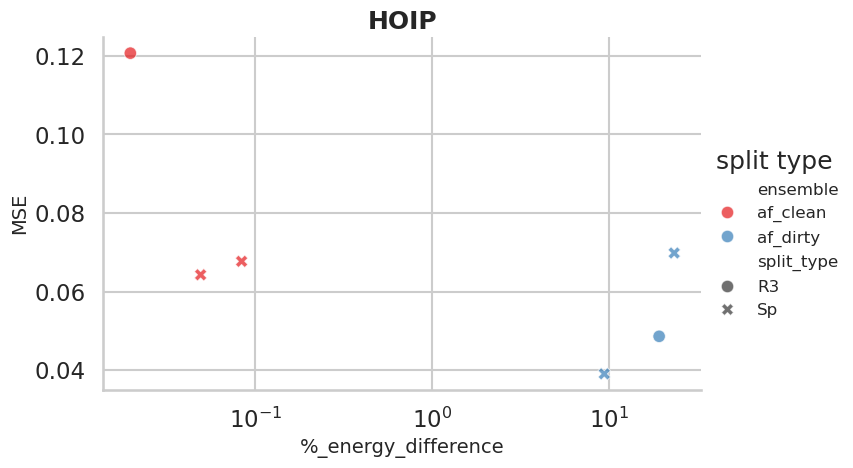

In [265]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

_MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# _MSE_energy_df=MSE_energy_df
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
_MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False, row_order=["HOIP"])#, col_order=split_order, sharex=True)
# Map the boxplot to the FacetGrid
g.map_dataframe(sns.scatterplot, x="%_energy_difference", y="mse", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
#, order=_dataset_order)
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("%_energy_difference", fontsize=14)
g.set_ylabels("MSE", fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
g.tight_layout()
# Add legend
g.set(xscale="log")
# g.set(xlim=(0, 100))
g.add_legend(title="split type", fontsize=12)
# Show the plot
plt.show()

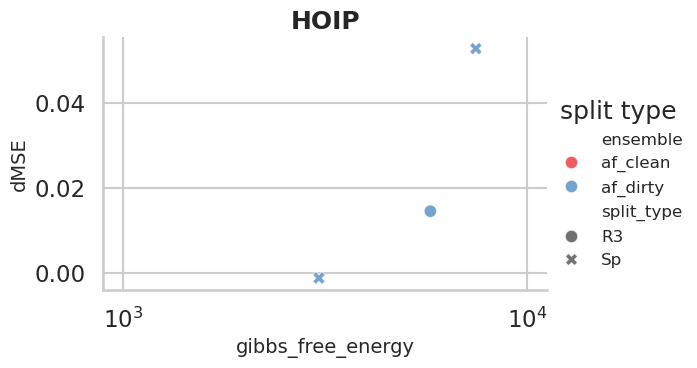

In [266]:



import seaborn as sns
import matplotlib.pyplot as plt
# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")
# # Create a custom palette
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

_dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# _MSE_energy_df=MSE_energy_df
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(_dMSE_energy_df, row="protein",height=4, aspect=1.5, sharey=False, sharex=False, row_order=["HOIP"]) #col_order=split_order, sharex=True)
# Map the boxplot to the FacetGrid
g.map_dataframe(sns.scatterplot, x="gibbs_free_energy", y="dMSE", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
#, order=_dataset_order)
# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("gibbs_free_energy", fontsize=14)
g.set_ylabels("dMSE", fontsize=14)
# # Rotate x-tick labels
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # Adjust subplot spacing
g.tight_layout()
# Add legend
g.set(xscale="log")
# g.set(xlim=(0, 100))
g.add_legend(title="split type", fontsize=12)
# Show the plot
plt.show()

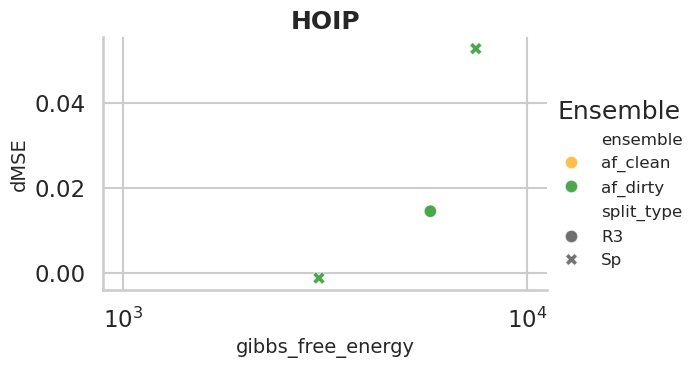

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Define the custom palette and order
_dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]
_dataset_colours = {
    "af_dirty": "green",
    "af_clean": "orange",
    "MD_Good": "red",
    "MD_Bad": "blue",
    "MD_Good+Bad": "purple"
}

# Filter the dataframe
_dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["split_type"].isin(["R3", "Sp"])]
_dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# Create the FacetGrid
g = sns.FacetGrid(
    _dMSE_energy_df, 
    row="protein",
    height=4, 
    aspect=1.5, 
    sharey=False, 
    sharex=False, 
    row_order=["HOIP"]
)

# Map the scatterplot to the FacetGrid
g.map_dataframe(
    sns.scatterplot, 
    x="gibbs_free_energy", 
    y="dMSE", 
    hue="ensemble", 
    palette=_dataset_colours, 
    style="split_type",
    alpha=0.7
)

# Customize the plot
g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("gibbs_free_energy", fontsize=14)
g.set_ylabels("dMSE", fontsize=14)

# Adjust subplot spacing
g.tight_layout()

# Add legend
g.set(xscale="log")
g.add_legend(title="Ensemble", fontsize=12)

# Show the plot
plt.show()


In [268]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False, row_order=["HOIP"]) #col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="energy_difference", y="dMSE", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("delta H", fontsize=14)
# g.set_ylabels("dMSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [269]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="KL_divergence", y="dMSE", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("KL", fontsize=14)
# g.set_ylabels("dMSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [270]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="JS_divergence", y="entropy_difference", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("JSD", fontsize=14)
# g.set_ylabels("delta S", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [271]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="energy_difference", y="dMSE", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("ED", fontsize=14)
# g.set_ylabels("dMSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [272]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _dMSE_energy_df = dMSE_energy_df[dMSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _dMSE_energy_df = _dMSE_energy_df[_dMSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_dMSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="JS_divergence", y="dMSE", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("JSD", fontsize=14)
# g.set_ylabels("dMSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# # g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [273]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="energy_difference", y="mse", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [274]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="KL_divergence", y="mse", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("KL_divergence", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(ylim=(0, 0.6))

# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [275]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="%_KL_divergence", y="mse", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("%_KL_divergence", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(ylim=(0, 0.6))

# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [276]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="enthalpy_difference", y="mse", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("enthalpy_difference", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(ylim=(0, 0.6))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [277]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette
# _dataset_order = ["af_dirty", "af_clean", "MD_Good", "MD_Bad", "MD_Good+Bad"]

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex=False)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="entropy_difference", y="mse", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("Entropy_difference", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(ylim=(0, 0.6))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [278]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey=True, sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="%_energy_difference", y="mse", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("%_energy_difference", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [279]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey=False, sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="%_energy_difference", y="JS_divergence", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("%_energy_difference", fontsize=14)
# g.set_ylabels("JSD", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [280]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey='row', sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="energy_difference", y="KL_divergence", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("energy_difference", fontsize=14)
# g.set_ylabels("KL_divergence", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# g.set(yscale="log")

# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [281]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey='row', sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="%_energy_difference", y="%_KL_divergence", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("%_energy_difference", fontsize=14)
# g.set_ylabels("%_KL_divergence", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# g.set(yscale="log")

# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [282]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey='row', sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="%_energy_difference", y="JS_divergence", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("%_energy_difference", fontsize=14)
# g.set_ylabels("JS_divergence", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(yscale="log")

# # g.set(ylim=(0, 1))
# g.set(xlim=(0))

# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [283]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# # _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey='row', sharex='row')#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="enthalpy", y="KL_divergence", hue="ensemble", palette="Set1", style="split_type",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("enthalpy", fontsize=14)
# g.set_ylabels("KL_divergence", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# g.set(yscale="log")

# g.set(ylim=(0, 1))
# g.set(xlim=(0))

# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()

In [284]:



# import seaborn as sns
# import matplotlib.pyplot as plt
# # Set context and style
# sns.set_context("talk")
# sns.set_style("whitegrid")
# # # Create a custom palette

# _MSE_energy_df = MSE_energy_df[MSE_energy_df["split_type"].isin([ "R3", "Sp"])]
# _MSE_energy_df=MSE_energy_df
# # _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"]!="Shaw_400"]
# _MSE_energy_df = _MSE_energy_df[_MSE_energy_df["ensemble"].isin(_dataset_order)]

# # Create the FacetGrid
# g = sns.FacetGrid(_MSE_energy_df, row="protein",height=5, aspect=1.5, sharey=True, sharex=True)#, row_order=protein_names, col_order=split_order, sharex=True)
# # Map the boxplot to the FacetGrid
# g.map_dataframe(sns.scatterplot, x="%_energy_difference", y="mse", hue="split_type", palette="Set2", style="ensemble",alpha=0.7)#, order=_dataset_order)
# #, order=_dataset_order)
# # Customize the plot
# g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=16, fontweight="bold")
# g.set_xlabels("%_energy_difference", fontsize=14)
# g.set_ylabels("MSE", fontsize=14)
# # # Rotate x-tick labels
# # for ax in g.axes.flat:
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# # # Adjust subplot spacing
# g.tight_layout()
# # Add legend
# g.set(xscale="log")
# # g.set(xlim=(0, 100))
# g.add_legend(title="split type", fontsize=12)
# # Show the plot
# plt.show()